# Ovarian Cancer Modelling - A comparative Analyis of Baseline and Ensemble Methods

## Introduction

This notebook is designed to develop machine-learning models for detecting ovarian cancer. The main aim of this research is to utilize various machine-learning algorithms for detecting **Ovarian Cancer**. The code is organized into several sections.

1. [The Data Description section](#data-description) describes the dataset used in this research.

2. [The Data Wrangling section](#data_wrang) preprocesses the dataset to transform raw data into a clean dataset suitable for training the machine learning model.

3. [The Exploratory Data Analysis section](#data_viz) visualizes key features in the provided dataset to gain an insight into the data graphically.

4. [The Preliminary Data Analysis section](#data_anal) explores the provided dataset and performs basic statistical analysis to understand the data better.

5. [The Feature Engineering section](#feature) extracts relevant features from the data to improve the model's accuracy.

6. [The Model Training section](#training) trains the machine learning model using several ensemble learning algorithms and evaluates their performance based on various metrics.

7. [The Analysis of Ensemble Methods section](#baseline_model_anal) analyzes the factors that contribute to the performance of the selected baseline algorithms.

8. [The Analysis of Ensemble Methods section](#model_anal) analyzes the factors that contribute to the performance of the selected ensemble learning algorithms.

### Data Description <a class="anchor" id="data_description"></a>

This section of the code provides sufficient information about the dataset used for this research.

The Third Affiliated Hospital of Soochow University provided the dataset for the study, which includes 349 individuals. The data were collected between July 2011 and July 2018, and they were divided into two groups: 178 patients with benign ovarian tumors and 171 patients with ovarian cancer ([Kaggle](https://www.kaggle.com/datasets/swabbie8/ovarian-cancer/data?select=ovariantotal.csv), accessed on 15 January 2024). 49 features in all, derived through pathology diagnosis, were included in the dataset. These 49 predictor factors included information on age and menopause, as well as 22 basic chemical tests, 19 normal blood tests, and 6 tumor markers. Prior to surgery, none of the patients had received chemotherapy or radiotherapy, and all underwent postoperative case diagnosis. Using standards from the World Health Organization, the histological diagnosis was categorized.


|Biomarker|Biomarker Name|
|---|---|
|MPV|Mean platelet volume|
|BASO#|Basophil Cell Count|
|PHOS|phosphorus|
|GLU.|glucose|
|CA72-4|Carbohydrate antigen 72-4|
|K|kalium|
|AST|Aspartate aminotransferase|
|BASO%|Basophil Cell ratio|
|Mg|magnesium|
|CL|chlorine|
|CEA|Carcinoembryonic antigen|
|EO#|eosinophil count|
|CA19-9|Carbohydrate antigen 19-9|
|ALB|albumin|
|IBIL|Indirect bilirubin|
|GGT|Gama glutamyltransferasey|
|MCH|Mean corpuscular hemoglubin|
|GLO|globulin||ALT|Alanine aminotransferase|
|DBIL|direct bilirubin|
|RDW|red blood cell distribution width|
|PDW|Platelet distribution width|
|CREA|creatinine|
|AFP|alpha-fetoprotein|
|HGB|hemoglobin|
|Na|Natrium|
|HE4|human epididymis protein 4|
|LYM#|lymphocyte count|
|CA125|Carbohydrate antigen 125|
|BUN|blood urea nitrogen|
|LYM%|lymphocyte ratio|
|Ca|calcium|
|AG|Anion gap|
|MONO#|mononuclear cell count|
|PLT|platelet count|
|NEU|neutrophil ratio|
|EO%|eosinophil ratio|
|TP|Total protein|
|UA|urie acid|
|RBC|Red blood cell count|
|PCT|thrombocytocrit|
|CO2CP|carban dioxide-combining Power|
|TBIL|total bilirubin|
|HCT|hematocrit|
|MONO%|monocyte ratio|
|MCV|mean corpuscular volume|
|ALP|Alkaline phosphatase|

In [1]:
import numpy as np  # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization
import matplotlib. pyplot as plt # data visualization
import shutil

import joblib
import pickle
import os
import time
import warnings
warnings.filterwarnings('ignore')

import mlflow

mlflow.set_tracking_uri(uri="http://127.0.0.1:5000")
mlflow.autolog()

from mlflow.models import infer_signature

import plotly.express as px #data visualization
import plotly.io as pio # plot rendering
pio.renderers.default = 'jupyterlab'
#pio.renderers.default = "plotly_mimetype+notebook"
import plotly.figure_factory as ff # data visualization
import plotly.graph_objects as go # data visualization
from plotly.subplots import make_subplots #  data visualization

from mrmr import mrmr_classif  # Importing mrmr lib for top features selection

from IPython.display import display, Javascript # utilizing JavaScript for rendering charts

2024/04/13 12:32:25 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2024/04/13 12:32:25 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of sklearn. If you encounter errors during autologging, try upgrading / downgrading sklearn to a supported version, or try upgrading MLflow.
2024/04/13 12:32:26 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


In [2]:
# Create a new MLflow Experiment
mlflow.set_experiment("Ovarian Cancer Prediction - (60-20-20)")

2024/04/13 12:32:26 INFO mlflow.tracking.fluent: Experiment with name 'Ovarian Cancer Prediction - (60-20-20)' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/327389029377955240', creation_time=1713007946793, experiment_id='327389029377955240', last_update_time=1713007946793, lifecycle_stage='active', name='Ovarian Cancer Prediction - (60-20-20)', tags={}>

In [3]:
# Pandas display options for easy viewing of data frames
pd.set_option('display.width', 150)

In [4]:
# Reading the dataset
df_cancer = pd.read_csv(
    "https://docs.google.com/spreadsheets/d/e/2PACX-1vRveqCgY-ndsv7PmJwBSb5sN3ZmmbQ6kKFK79q8H7powQoj1h4BzRx5qHzzSdIRDQ/pub?gid=1679652868&single=true&output=csv",
    dtype=str
)
# Remove trailing whitespace from all string columns
df_cancer = df_cancer.apply(lambda x: x.str.rstrip() if x.dtype == "object" else x)

In [5]:
# Printing the first 5 rows of the data
df_cancer.head()

,SUBJECT_ID,AFP,AG,Age,ALB,ALP,ALT,AST,BASO#,BASO%,...,NEU,PCT,PDW,PHOS,PLT,RBC,RDW,TBIL,TP,UA
0,1,3.58,19.36,47,45.4,56,11,24,0.01,0.3,...,76.2,0.09,13.4,1.46,74,2.64,13.7,5.5,73.9,396.4
1,2,34.24,23.98,61,39.9,95,9,13,0.02,0.3,...,76.5,0.3,11.2,1.09,304,4.89,12.7,6.8,72,119.2
2,3,1.50,18.4,39,45.4,77,9,18,0.03,0.6,...,69.7,0.13,15.2,0.97,112,4.62,12,14.8,77.9,209.2
3,4,2.75,16.6,45,39.2,26,16,17,0.05,0.74,...,65.5,0.25,17.4,1.25,339,4.01,14.6,10.9,66.1,215.6
4,5,2.36,19.97,45,35,47,21,27,0.01,0.1,...,59.5,0.28,11.9,0.94,272,4.4,13.4,5.3,66.5,206


In [6]:
# Printing the summary statistics of each feature/column in the data
df_cancer.describe().T

,count,unique,top,freq
SUBJECT_ID,349,349,414,1
AFP,327,237,0.61,5
AG,348,307,18.58,3
Age,349,62,45,11
ALB,339,172,42.6,8
ALP,339,97,71,11
ALT,339,46,16,30
AST,339,42,13,31
BASO#,349,12,0.02,75
BASO%,349,75,0.2,48


In [7]:
# Printing the shape of the data
df_cancer.shape

(349, 51)

In [8]:
# Printing the concise summary of the data
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 51 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SUBJECT_ID  349 non-null    object
 1   AFP         327 non-null    object
 2   AG          348 non-null    object
 3   Age         349 non-null    object
 4   ALB         339 non-null    object
 5   ALP         339 non-null    object
 6   ALT         339 non-null    object
 7   AST         339 non-null    object
 8   BASO#       349 non-null    object
 9   BASO%       349 non-null    object
 10  BUN         349 non-null    object
 11  Ca          349 non-null    object
 12  CA125       332 non-null    object
 13  CA19-9      325 non-null    object
 14  CA72-4      109 non-null    object
 15  CEA         327 non-null    object
 16  CL          349 non-null    object
 17  CO2CP       348 non-null    object
 18  CREA        349 non-null    object
 19  TYPE        349 non-null    object
 20  DBIL      

### Data Wrangling <a class="anchor" id="data_wrang"></a>

This section of the code is responsible for preparing the dataset for analysis by cleaning, transforming, and restructuring the data into a usable format. This section involves handling missing data, dealing with outliers, and transforming variables to ensure they meet the assumptions of the analysis method. The goal is to create a reliable dataset that maximizes accuracy when using machine learning algorithms. Data wrangling is a critical step in the data analysis process, as the accuracy of the results depends heavily on the quality of the dataset used.

In [9]:
# Before converting column types, the column values should be handled for data inconsistency
df_cancer.loc[df_cancer['AFP'] == '>1210.00', 'AFP'] = '1210.00'
df_cancer.loc[df_cancer['AFP'] == '>1210', 'AFP'] = '1210.00'
df_cancer.loc[df_cancer['CA125'] == '>5000.00', 'CA125'] = '5000.00'
df_cancer.loc[df_cancer['CA19-9'] == '>1000.00', 'CA19-9'] = '1000.00'
df_cancer.loc[df_cancer['CA19-9'] == '>1000', 'CA19-9'] = '1000.00'
df_cancer.loc[df_cancer['CA19-9'] == '<0.600', 'CA19-9'] = '0.5'

In [10]:
# Convert object columns to float columns
for col in (
    df_cancer.drop(["TYPE", "SUBJECT_ID",], axis=1)
    .select_dtypes(include=["object"])
    .columns
):
    df_cancer[col] = df_cancer[col].astype('float')

# Convert target column to integer
df_cancer['TYPE'] = df_cancer['TYPE'].astype('int64')

In [11]:
# Computing the ratio of missing data in each column
missing_ratio = df_cancer.isnull().sum()

# Displaying the ratio of missing data in each column
missing_ratio

SUBJECT_ID      0
AFP            22
AG              1
Age             0
ALB            10
ALP            10
ALT            10
AST            10
BASO#           0
BASO%           0
BUN             0
Ca              0
CA125          17
CA19-9         24
CA72-4        240
CEA            22
CL              0
CO2CP           1
CREA            0
TYPE            0
DBIL           10
EO#             0
EO%             0
GGT            10
GLO            10
GLU.            0
HCT             0
HE4            20
HGB             0
IBIL           10
K               0
LYM#            0
LYM%            0
MCH             0
MCV             0
Menopause       0
Mg              0
MONO#           0
MONO%           0
MPV             2
Na              0
NEU            91
PCT             2
PDW             2
PHOS            0
PLT             0
RBC             0
RDW             0
TBIL           10
TP             10
UA              0
dtype: int64

In [12]:
# Computing the ratio of missing data in each column
missing_ratio = df_cancer.isnull().mean()

# Displaying the ratio of missing data in each column
missing_ratio

SUBJECT_ID    0.000000
AFP           0.063037
AG            0.002865
Age           0.000000
ALB           0.028653
ALP           0.028653
ALT           0.028653
AST           0.028653
BASO#         0.000000
BASO%         0.000000
BUN           0.000000
Ca            0.000000
CA125         0.048711
CA19-9        0.068768
CA72-4        0.687679
CEA           0.063037
CL            0.000000
CO2CP         0.002865
CREA          0.000000
TYPE          0.000000
DBIL          0.028653
EO#           0.000000
EO%           0.000000
GGT           0.028653
GLO           0.028653
GLU.          0.000000
HCT           0.000000
HE4           0.057307
HGB           0.000000
IBIL          0.028653
K             0.000000
LYM#          0.000000
LYM%          0.000000
MCH           0.000000
MCV           0.000000
Menopause     0.000000
Mg            0.000000
MONO#         0.000000
MONO%         0.000000
MPV           0.005731
Na            0.000000
NEU           0.260745
PCT           0.005731
PDW        

In [13]:
# Before handling missing data, let's put the missing data in another variable to perform analysis later
df_cancer_missing = df_cancer.copy()

# Dropping columns with a missing data ratio greater than 0.05, and the "SUBJECT_ID" column.
cols_to_drop = ["CA72-4", "CA19-9", "AFP", "CEA", "HE4", "SUBJECT_ID"]
df_cancer = df_cancer.drop(cols_to_drop, axis=1)

# get columns with missing data
cols_with_missing = [col for col in df_cancer.columns if df_cancer[col].isnull().any()]

# impute missing data with the median value
for col in cols_with_missing:
    median_val = df_cancer[col].median()
    df_cancer[col].fillna(median_val, inplace=True)

# Displaying the updated missing data ratio
df_cancer.isnull().mean()

AG           0.0
Age          0.0
ALB          0.0
ALP          0.0
ALT          0.0
AST          0.0
BASO#        0.0
BASO%        0.0
BUN          0.0
Ca           0.0
CA125        0.0
CL           0.0
CO2CP        0.0
CREA         0.0
TYPE         0.0
DBIL         0.0
EO#          0.0
EO%          0.0
GGT          0.0
GLO          0.0
GLU.         0.0
HCT          0.0
HGB          0.0
IBIL         0.0
K            0.0
LYM#         0.0
LYM%         0.0
MCH          0.0
MCV          0.0
Menopause    0.0
Mg           0.0
MONO#        0.0
MONO%        0.0
MPV          0.0
Na           0.0
NEU          0.0
PCT          0.0
PDW          0.0
PHOS         0.0
PLT          0.0
RBC          0.0
RDW          0.0
TBIL         0.0
TP           0.0
UA           0.0
dtype: float64

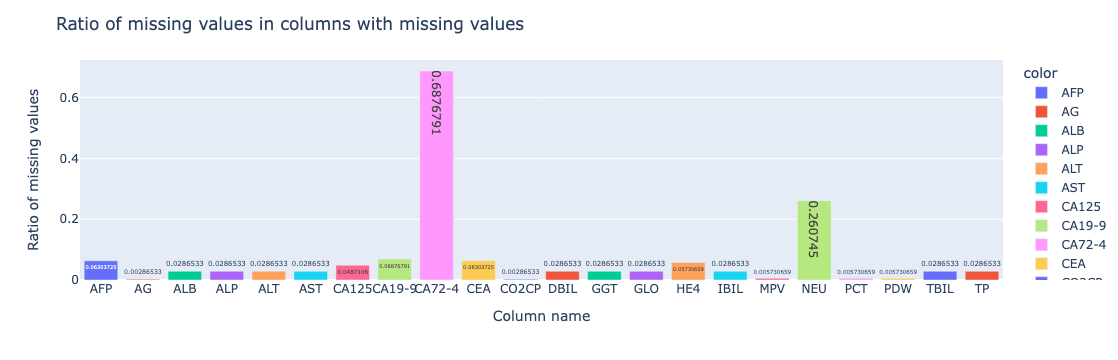

In [14]:
# Calculate the ratio of missing values in each column
missing_ratio = df_cancer_missing.isnull().sum() / len(df_cancer_missing)

# Filter columns with missing values
missing_ratio = missing_ratio[missing_ratio > 0]

# Create the bar chart using Plotly
fig = px.bar(x=missing_ratio.index, y=missing_ratio.values, text_auto=True, color=missing_ratio.index)

# Update the layout of the plot
fig.update_layout(
    title="Ratio of missing values in columns with missing values",
    xaxis_title="Column name",
    yaxis_title="Ratio of missing values",
)

#fig.write_image("/charts/Ratio of missing values in columns with missing values.png", engine="kaleido")

# Show the plot
fig.show()

Of all the feature variables, Carbohydrate antigen 72-4 (CA72-4) had ~69% missing observations, Neutrophil ratio (NEU) had 26%, and Carbohydrate antigen 19-9 (~7%) being the top 3 features with the highest percentage of missing observations.

### Feature Engineering <a class="anchor" id="feature"></a>

This section of the code refers to the process of selecting and transforming the relevant features of the data to create new features that better represent the problem domain.The purpose of feature engineering is to improve the performance of machine learning algorithms by reducing the noise in the data, increasing the accuracy of the predictions, and making the model more interpretable. It requires a deep understanding of the problem domain and the data being used, as well as knowledge of the available feature engineering techniques and their impact on the model's performance.

In [15]:
# Map the 'TYPE' column to "0 - Benign Ovarian Tumors" and '1 - Ovarian Cancer'
df_cancer["Type_Label"] = df_cancer["TYPE"].map(
    {0: "Ovarian Cancer", 1: "Benign Ovarian Tumors"}
)
# Map the 'Menopause' column to "0 - No" and '1 - Yes'
df_cancer['Menopause_Label'] = df_cancer['Menopause'].map({0: 'No', 1: 'Yes'})
df_cancer.head()

,AG,Age,ALB,ALP,ALT,AST,BASO#,BASO%,BUN,Ca,...,PDW,PHOS,PLT,RBC,RDW,TBIL,TP,UA,Type_Label,Menopause_Label
0,19.36,47.0,45.4,56.0,11.0,24.0,0.01,0.30,5.35,2.48,...,13.4,1.46,74.0,2.64,13.7,5.5,73.9,396.4,Ovarian Cancer,No
1,23.98,61.0,39.9,95.0,9.0,13.0,0.02,0.30,3.21,2.62,...,11.2,1.09,304.0,4.89,12.7,6.8,72.0,119.2,Ovarian Cancer,Yes
2,18.40,39.0,45.4,77.0,9.0,18.0,0.03,0.60,3.80,2.57,...,15.2,0.97,112.0,4.62,12.0,14.8,77.9,209.2,Ovarian Cancer,No
3,16.60,45.0,39.2,26.0,16.0,17.0,0.05,0.74,5.27,2.35,...,17.4,1.25,339.0,4.01,14.6,10.9,66.1,215.6,Ovarian Cancer,Yes
4,19.97,45.0,35.0,47.0,21.0,27.0,0.01,0.10,4.89,2.48,...,11.9,0.94,272.0,4.40,13.4,5.3,66.5,206.0,Ovarian Cancer,No


In [16]:
# split data into features (X) and target (y)
X = df_cancer.drop(['TYPE', 'Type_Label', 'Menopause_Label'], axis=1)
y = df_cancer['TYPE']

In [17]:
# select top 20 features using MRMR
top_features = mrmr_classif(X=X, y=y, K=20)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 49.46it/s]


In [18]:
top_features

['Age',
 'IBIL',
 'NEU',
 'Menopause',
 'ALB',
 'CA125',
 'GLO',
 'LYM%',
 'AST',
 'HGB',
 'PLT',
 'ALP',
 'LYM#',
 'PCT',
 'Ca',
 'MONO#',
 'TBIL',
 'GLU.',
 'MCH',
 'Na']

The top 20 features contributing to the target variable (TYPE) are selected using the mRMR algorithm. The selected features are:
1. Age
2. Indirect Bilirubin (IBIL)
3. Neutrophil ratio (NEU)
4. Menopause
5. Albumin (ALB)
6. Carbohydrate antigen 125 (CA125)
7. Globulin (GLO)
8.  Lymphocyte ratio (LYM%)
9.  Aspartate aminotransferase (AST)
10. Hemoglobin (HGB)
11. Platelet count (PLT)
12. Alkaline phosphate (ALP)
13. Lymphocyte count (LYM#)
14. Thrombocytocrit (PCT)
15. Calcium (ca)
16. Mononuclear cell count (MONO#)
17. Total Bilirubin (TBIL)
18. Glucose (GLU)
19. Mean corpuscular hemoglobin (MCH)
20. Natrium (Na)

### Preliminary Data Analysis <a class="anchor" id="data_anal"></a>

This section of the code involves an initial examination of the dataset to understand its structure, contents, and quality. This includes checking for the extent of missing or erroneous data, exploring the distribution of the variables, identifying any outliers, and computing summary statistics. The purpose of this section is to gain insights into the dataset and inform subsequent data processing steps. It also involves visualizing the data using various plotting techniques to reveal patterns or relationships between the variables.

In [19]:
# Visualizing the correlation between the features in the training data
selected_cols = top_features + ["TYPE"]

# Selecting the row or column corresponding to the target column
target_corr = df_cancer[selected_cols].corr()['TYPE']
target_corr = np.sqrt(target_corr ** 2) # find the magnitude of each correlation, at this instance, we are only interested in the magnitude
# of each correlation, and not its direction.

# Displaying the correlation values of each feature with the target column in descending order
print("Correlation of selected features with target column (sorted in descending order)  \n")
target_corr.sort_values(ascending=False)

Correlation of selected features with target column (sorted in descending order)  



TYPE         1.000000
Age          0.514098
Menopause    0.455770
ALB          0.375415
CA125        0.372262
NEU          0.353062
LYM%         0.315035
PLT          0.270182
LYM#         0.256494
PCT          0.243719
AST          0.215888
ALP          0.213249
MONO#        0.200536
IBIL         0.200451
HGB          0.197863
TBIL         0.195921
GLO          0.195630
Ca           0.187119
GLU.         0.179048
MCH          0.166818
Na           0.143849
Name: TYPE, dtype: float64

In [20]:
# Create a correlation matrix
corr_matrix = np.around(np.sqrt(df_cancer[selected_cols].corr()**2), 2) # Use the correlation magnitude instead of the direction

# Create the heatmap using Plotly
fig = ff.create_annotated_heatmap(
    z=corr_matrix.to_numpy(),
    x=corr_matrix.columns.tolist(),
    y=corr_matrix.columns.tolist(),
    annotation_text=corr_matrix.to_numpy().astype(str),
    colorscale="RdBu_r",  # Using a similar colorscale to 'coolwarm'
    showscale=True,
)

# Update the layout of the plot
fig.update_layout(
    title="Correlation Heatmap of Top Features",
    width=1200,
    height=1000,
    xaxis=dict(tickangle=-45),
    yaxis=dict(tickmode="array", tickvals=np.arange(len(selected_cols))),
    margin=dict(l=200, r=200, t=100, b=100),
)

# Show the plot
fig.show()

Based on the available data, and the correlation result above, it is safe to say that women are at a higher risk of developing ovarian cancer as they age. The top three factors are Age (51%), Menopause (46%), and Albumin (38%) respectively, with the least three factors being Calcium (19%), Carcinoembryonic antigen (17%), and Carbohydrate antigen 19-9 (15%).

In [21]:
fig = px.scatter_matrix(
    df_cancer[top_features],
    dimensions=top_features,
    width=1200,
    height=1500
)
fig.update_layout(
    title='Scatter Plot Matrix of Selected Features'
)
fig.show()

In [22]:
# Visualizing the distribution of the target variable in the training data
fig = px.histogram(df_cancer, x='Type_Label', text_auto=True, orientation='v', color='Type_Label')
fig.update_layout(
xaxis_title='Cancer Type',
yaxis_title='Number of Patients',
title='Distribution of Target Variable'
)
fig.show()

From the above, it can be seen that there is a class balance between the number of patients with Ovarian cancer (***0***), and patients with Benign Ovarian Tumors (***1***).

In [23]:
# Plotting the distribution of cancer types by menopause status
fig = px.histogram(df_cancer, x='Menopause_Label', color='Type_Label', barmode='group', text_auto=True)
fig.update_layout(
    title='Distribution of Cancer Types by Menopause Status',
    yaxis_title = "Number of Patients",
    xaxis_title = "Menopause"
)
fig.show()

Women at the menopause stage have higher records of Ovarian Cancer than women not at this stage. From the above chart, out of 171 patients with Ovarian cancer, **56.14% (96 patients)** have Ovarian cancer and are at the menopause stage. In contrast, out of the 178 patients with Benign Ovarian Tumors, only **12.92% (23 patients)** are at the menopause stage.

In [24]:
# Plotting the distribution of cancer types by menopause status
fig = px.histogram(df_cancer, x='Age', color='Type_Label', barmode='group', text_auto=True)
fig.update_layout(
    title="Distribution of Patients' Age by Cancer Type",
    yaxis_title = "Number of Patients",
    xaxis_title = "Cancer Type"
)
fig.show()

In [25]:
# Filter the data to only include positive values of the "TYPE" target column
positive_data = df_cancer[df_cancer['Type_Label'] == "Ovarian Cancer"]

fig = px.histogram(positive_data, x="Age", text_auto=True)
fig.update_layout(
xaxis_title="Age",
yaxis_title="Number of Patients",
title="Distribution of Positive Patients' Age")

fig.show()

Women are at more risk of ovarian cancer as they age. From the above chart, women between the age-range of 45 - 64 have more tendencies of developing ovarian cancer with 50 - 54 being the most prevalent age-range, followed by the 60 - 64 age-range.

### Model Training <a class="anchor" id="training"></a>

This section of the code involves using machine learning algorithms to build predictive models for detecting ovarian cancer. This section includes selecting appropriate algorithms and splitting the data into training and testing sets, training the models on the training data, and evaluating their performance on the testing data.

The goal of this section is to identify the most accurate and effective ensemble learning method(s) for detecting ovarian cancer. Ensemble learning is a machine learning technique that involves combining multiple models (called baseline models) to improve the overall performance and accuracy of predictions.

**Base Models Checked:**
1. Logistic Regression

2. SVM

3. KNN

4. Decision Trees

**Ensemble Learning Techniques Checked:**
1. Voting

2. Stacking

3. Bagging

4. Boosting (XGBoost and GBM)

5. Stacking of Various Ensemble Learning Techniques

In [26]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    GradientBoostingClassifier,
    VotingClassifier,
    BaggingClassifier,
    StackingClassifier
)

from sklearn.svm import SVC
from xgboost import XGBClassifier

2024/04/13 12:32:34 INFO mlflow.tracking.fluent: Autologging successfully enabled for xgboost.


In [27]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    roc_auc_score,
    roc_curve,
    precision_score,
    auc,
    precision_recall_curve,
    f1_score,
    average_precision_score,
)

In [28]:
# Split into training (60%), testing (30%), and cross-validation (10%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42
)
X_cv, X_test, y_cv, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

# Select top features after splitting
X_train = X_train[top_features]
X_test = X_test[top_features]
X_cv = X_cv[top_features]

### Analysis of Baseline Algorithms <a class="anchor" id="baseline_model_anal"></a>

This section of the code involves evaluating the performance of the baseline methods used in the model training section, by using appropriate evaluation metrics and comparing the results. The purpose is to determine the most effective and efficient method for detecting ovarian cancer tumors and to identify the factors that contribute to the superior performance of a particular baseline algorithm over others.

In [29]:
#  Create a dataframe to store the accuracy of baseline models for further analysis
basemodel_df = pd.DataFrame(
    columns=[
        "Baseline Model",
        "Accuracy",
        "Sensitivity",
        "Specificity",
        "False Positive Rate",
        "Precision",
        "F1-Score",
        "AUC Score"
]
)

#### Logistic regression

##### Cross-Validation Set

In [30]:
with mlflow.start_run() as run:

    # Create a logistic regression classifier
    lr_clf_cv = LogisticRegression(random_state=42)

    # Fit the model to the training data
    lr_clf_cv.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred_lr_cv = lr_clf_cv.predict(X_cv)
    # Get probabilities for the positive class
    y_scores_lr_cv = lr_clf_cv.predict_proba(X_cv)[:, 1]

    # Accuracy
    accuracy = lr_clf_cv.score(X_cv, y_cv)

    # Confusion Matrix
    cm = confusion_matrix(y_cv, y_pred_lr_cv)
    # Sensitivity (Recall) and Specificity calculations
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    # False Positive Rate (FPR)
    FPR = FP / (FP + TN)

    # ROC AUC Score and curve
    roc_auc = roc_auc_score(y_cv, y_scores_lr_cv)  # Use scores, not predictions, for AUC
    fpr, tpr, thresholds = roc_curve(y_cv, y_scores_lr_cv)

    # Precision
    precision = precision_score(y_cv, y_pred_lr_cv)

    # F1-Score
    f1 = f1_score(y_cv, y_pred_lr_cv)

    # Append the new results to your DataFrame or storage structure
    basemodel_df = basemodel_df._append(
        {
            "Baseline Model": "Logistic Regression CV",
            "Accuracy": accuracy,
            "Sensitivity": sensitivity,
            "Specificity": specificity,
            "False Positive Rate": FPR,
            "AUC Score": roc_auc,
            "F1-Score": f1,
            "Precision": precision,
        },
        ignore_index=True,
    )

    # Evaluate the model on the test set
    print("Logistic Regression CV")
    print(classification_report(y_cv, y_pred_lr_cv))
    print("")
    print("Confusion Matrix: ")
    print(cm)

    # Log the model parameters and metrics to MLflow
    mlflow.sklearn.log_model(lr_clf_cv, "Logistic Regression CV")
    print("Run ID: {}".format(run.info.run_id))

    mlflow.log_params(lr_clf_cv.get_params())
    mlflow.log_metrics(
        {
            "Accuracy": accuracy,
            "Sensitivity": sensitivity,
            "Specificity": specificity,
            "False Positive Rate": FPR,
            "AUC Score": roc_auc,
            "F1-Score": f1,
            "Precision": precision
        }
    )

    # Save the model to MLflow
    #shutil.rmtree("Logistic Regression CV", ignore_errors=True)
    #mlflow.sklearn.save_model(lr_clf_cv, "Logistic Regression CV")

    signature = infer_signature(X_cv, y_pred_lr_cv)

    # Log the sklearn model and register as version 1
    mlflow.sklearn.log_model(
        sk_model=lr_clf_cv,
        artifact_path="sklearn-model",
        signature=signature,
        registered_model_name="sk-learn-logistic-reg-cv-model",
    )

Logistic Regression CV
              precision    recall  f1-score   support

           0       0.90      0.79      0.84        33
           1       0.83      0.92      0.87        37

    accuracy                           0.86        70
   macro avg       0.86      0.85      0.86        70
weighted avg       0.86      0.86      0.86        70


Confusion Matrix: 
[[26  7]
 [ 3 34]]
Run ID: 7a3c13a20d8b4afabeaf8bea3beb44e9


Registered model 'sk-learn-logistic-reg-cv-model' already exists. Creating a new version of this model...
2024/04/13 12:32:45 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-logistic-reg-cv-model, version 3
Created version '3' of model 'sk-learn-logistic-reg-cv-model'.


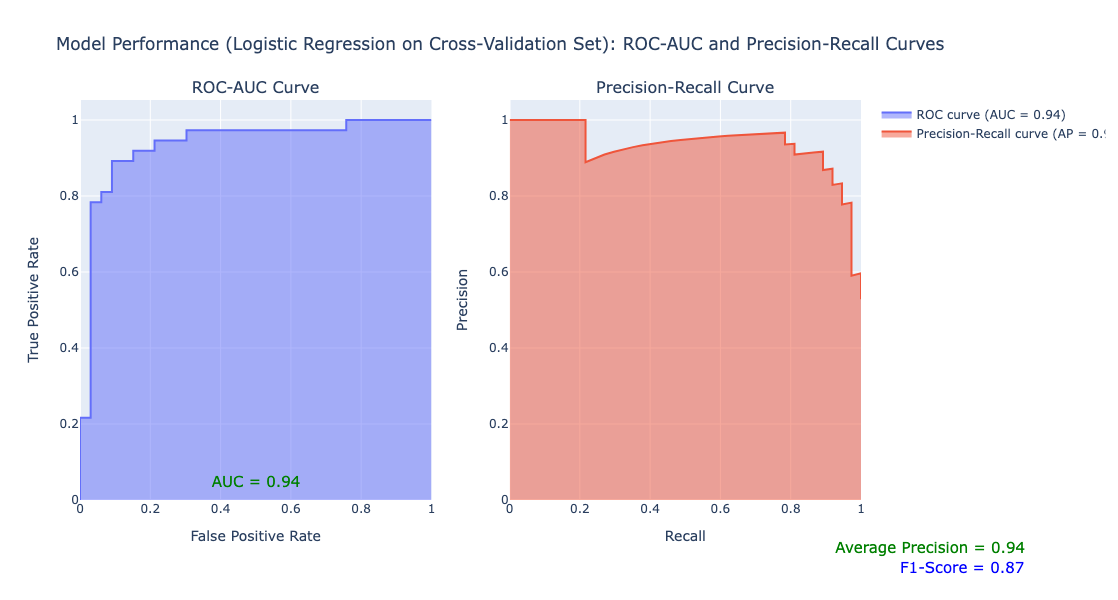

In [31]:
# Calculate metrics for ROC-AUC Curve
fpr, tpr, _ = roc_curve(y_cv, y_scores_lr_cv)
roc_auc_val = auc(fpr, tpr)

# Calculate metrics for Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_cv, y_scores_lr_cv)
pr_auc = average_precision_score(y_cv, y_scores_lr_cv)
f1 = f1_score(y_cv, y_pred_lr_cv)

# Create subplots
fig = make_subplots(
    rows=1, cols=2, subplot_titles=("ROC-AUC Curve", "Precision-Recall Curve")
)

# Add ROC-AUC Curve to the subplot
fig.add_trace(
    go.Scatter(
        x=fpr,
        y=tpr,
        mode="lines",
        name=f"ROC curve (AUC = {roc_auc_val:.2f})",
        fill="tozeroy",
    ),
    row=1,
    col=1,
)
fig.add_annotation(
    x=0.5,
    y=0.05,
    xref="paper",
    yref="paper",
    text=f"AUC = {roc_auc_val:.2f}",
    showarrow=False,
    font=dict(size=15, color="green"),
    row=1,
    col=1,
)

# Add Precision-Recall Curve to the subplot
fig.add_trace(
    go.Scatter(
        x=recall,
        y=precision,
        mode="lines",
        name=f"Precision-Recall curve (AP = {pr_auc:.2f})",
        fill="tozeroy",
    ),
    row=1,
    col=2,
)
fig.add_annotation(
    x=1.2,
    y=-0.15,
    xref="paper",
    yref="paper",
    text=f"Average Precision = {pr_auc:.2f}",
    showarrow=False,
    font=dict(size=15, color="green"),
)
fig.add_annotation(
    x=1.2,
    y=-0.20,
    xref="paper",
    yref="paper",
    text=f"F1-Score = {f1:.2f}",
    showarrow=False,
    font=dict(size=15, color="blue"),
)

# Update layout
fig.update_layout(
    title_text="Model Performance (Logistic Regression on Cross-Validation Set): ROC-AUC and Precision-Recall Curves",
    width=1200,
    height=600,
)
fig.update_xaxes(title_text="False Positive Rate", row=1, col=1)
fig.update_yaxes(title_text="True Positive Rate", row=1, col=1)
fig.update_xaxes(title_text="Recall", row=1, col=2)
fig.update_yaxes(title_text="Precision", row=1, col=2)
fig.update_layout(
    margin=dict(b=100)
)  # Adjust bottom margin to avoid cutting off annotations

# Save plot
#fig.write_image("./charts/Baseline_Models/Model Performance (Logistic Regression on Cross-Validation Set): ROC-AUC and Precision-Recall Curves.png") #png format
#fig.write_image("./charts/Baseline_Models/Model Performance (Logistic Regression on Cross-Validation Set): ROC-AUC and Precision-Recall Curves.svg") #svg format

# Display the plots side-by-side
fig.show()

##### Testing Set

In [32]:
with mlflow.start_run() as run:

    # Create a logistic regression classifier
    lr_clf = LogisticRegression(random_state=42)

    # Fit the model to the training data
    lr_clf.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred_lr = lr_clf.predict(X_test)
    # Get probabilities for the positive class
    y_scores_lr = lr_clf.predict_proba(X_test)[:, 1]

    # Accuracy
    accuracy = lr_clf.score(X_test, y_test)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred_lr)
    # Sensitivity (Recall) and Specificity calculations
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    # False Positive Rate (FPR)
    FPR = FP / (FP + TN)

    # ROC AUC Score and curve
    roc_auc = roc_auc_score(y_test, y_scores_lr)  # Use scores, not predictions, for AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_scores_lr)

    # Precision
    precision = precision_score(y_test, y_pred_lr)

    # F1-Score
    f1 = f1_score(y_test, y_pred_lr)

    # Append the new results to your DataFrame or storage structure
    basemodel_df = basemodel_df._append(
        {
            "Baseline Model": "Logistic Regression",
            "Accuracy": accuracy,
            "Sensitivity": sensitivity,
            "Specificity": specificity,
            "False Positive Rate": FPR,
            "AUC Score": roc_auc,
            "F1-Score": f1,
            "Precision": precision,
        },
        ignore_index=True,
    )

    # Evaluate the model on the test set
    print("Logistic Regression")
    print(classification_report(y_test, y_pred_lr))
    print("")
    print("Confusion Matrix: ")
    print(cm)

    # Log the model parameters and metrics to MLflow
    mlflow.sklearn.log_model(lr_clf, "Logistic Regression")
    print("Run ID: {}".format(run.info.run_id))

    mlflow.log_params(lr_clf.get_params())
    mlflow.log_metrics(
        {
            "Accuracy": accuracy,
            "Sensitivity": sensitivity,
            "Specificity": specificity,
            "False Positive Rate": FPR,
            "AUC Score": roc_auc,
            "F1-Score": f1,
            "Precision": precision
        }
    )

    # Save the model to MLflow
    #shutil.rmtree("Logistic Regression", ignore_errors=True)
    #mlflow.sklearn.save_model(lr_clf, "Logistic Regression")

    signature = infer_signature(X_test, y_pred_lr)

    # Log the sklearn model and register as version 1
    mlflow.sklearn.log_model(
        sk_model=lr_clf,
        artifact_path="sklearn-model",
        signature=signature,
        registered_model_name="sk-learn-logistic-reg-model",
    )

Logistic Regression
              precision    recall  f1-score   support

           0       0.79      0.66      0.72        35
           1       0.71      0.83      0.76        35

    accuracy                           0.74        70
   macro avg       0.75      0.74      0.74        70
weighted avg       0.75      0.74      0.74        70


Confusion Matrix: 
[[23 12]
 [ 6 29]]
Run ID: f3c8bb008c37489db46ec702940fba66


Registered model 'sk-learn-logistic-reg-model' already exists. Creating a new version of this model...
2024/04/13 12:32:56 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-logistic-reg-model, version 3
Created version '3' of model 'sk-learn-logistic-reg-model'.


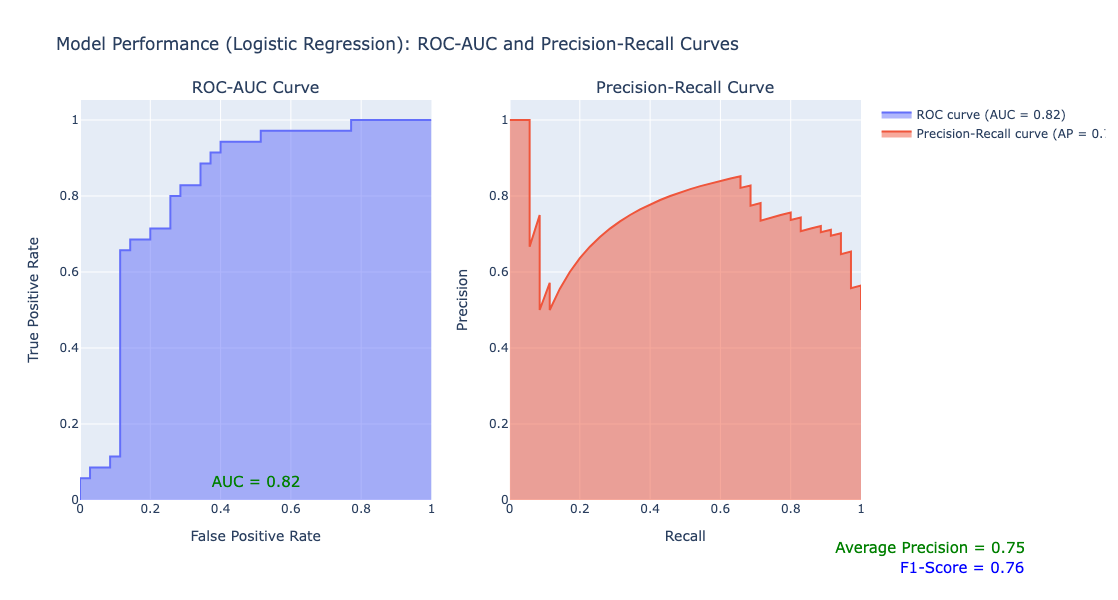

In [33]:
# Calculate metrics for ROC-AUC Curve
fpr, tpr, _ = roc_curve(y_test, y_scores_lr)
roc_auc_val = auc(fpr, tpr)

# Calculate metrics for Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_scores_lr)
pr_auc = average_precision_score(y_test, y_scores_lr)
f1 = f1_score(y_test, y_pred_lr)

# Create subplots
fig = make_subplots(
    rows=1, cols=2, subplot_titles=("ROC-AUC Curve", "Precision-Recall Curve")
)

# Add ROC-AUC Curve to the subplot
fig.add_trace(
    go.Scatter(
        x=fpr,
        y=tpr,
        mode="lines",
        name=f"ROC curve (AUC = {roc_auc_val:.2f})",
        fill="tozeroy",
    ),
    row=1,
    col=1,
)
fig.add_annotation(
    x=0.5,
    y=0.05,
    xref="paper",
    yref="paper",
    text=f"AUC = {roc_auc_val:.2f}",
    showarrow=False,
    font=dict(size=15, color="green"),
    row=1,
    col=1,
)

# Add Precision-Recall Curve to the subplot
fig.add_trace(
    go.Scatter(
        x=recall,
        y=precision,
        mode="lines",
        name=f"Precision-Recall curve (AP = {pr_auc:.2f})",
        fill="tozeroy",
    ),
    row=1,
    col=2,
)
fig.add_annotation(
    x=1.2,
    y=-0.15,
    xref="paper",
    yref="paper",
    text=f"Average Precision = {pr_auc:.2f}",
    showarrow=False,
    font=dict(size=15, color="green"),
)
fig.add_annotation(
    x=1.2,
    y=-0.20,
    xref="paper",
    yref="paper",
    text=f"F1-Score = {f1:.2f}",
    showarrow=False,
    font=dict(size=15, color="blue"),
)

# Update layout
fig.update_layout(
    title_text="Model Performance (Logistic Regression): ROC-AUC and Precision-Recall Curves",
    width=1200,
    height=600,
)
fig.update_xaxes(title_text="False Positive Rate", row=1, col=1)
fig.update_yaxes(title_text="True Positive Rate", row=1, col=1)
fig.update_xaxes(title_text="Recall", row=1, col=2)
fig.update_yaxes(title_text="Precision", row=1, col=2)
fig.update_layout(
    margin=dict(b=100)
)  # Adjust bottom margin to avoid cutting off annotations

# Save plot
#fig.write_image("./charts/Baseline_Models/Model Performance (Logistic Regression Set): ROC-AUC and Precision-Recall Curves.png") #png format
#fig.write_image("./charts/Baseline_Models/Model Performance (Logistic Regression Set): ROC-AUC and Precision-Recall Curves.svg") #svg format

# Display the plots side-by-side
fig.show()

#### SVM Classifier

##### Cross-Validation Set

In [34]:
with mlflow.start_run() as run:

    # Training the SVM model
    svm_model_cv = SVC(kernel="linear", probability=True)

    # Fit the model to the training data
    svm_model_cv.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred_svm_cv = svm_model_cv.predict(X_cv)
    # Get probabilities for the positive class
    y_scores_svm_cv = svm_model_cv.predict_proba(X_cv)[:, 1]

    # Accuracy
    accuracy = svm_model_cv.score(X_cv, y_cv)

    # Confusion Matrix
    cm = confusion_matrix(y_cv, y_pred_svm_cv)
    # Sensitivity (Recall) and Specificity calculations
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    # False Positive Rate (FPR)
    FPR = FP / (FP + TN)

    # ROC AUC Score and curve
    roc_auc = roc_auc_score(y_cv, y_scores_svm_cv)  # Use scores, not predictions, for AUC
    fpr, tpr, thresholds = roc_curve(y_cv, y_scores_svm_cv)

    precision = precision_score(y_cv, y_pred_svm_cv)

    # F1-Score
    f1 = f1_score(y_cv, y_pred_svm_cv)

    # Append the new results to your DataFrame or storage structure
    basemodel_df = basemodel_df._append(
        {
            "Baseline Model": "SVM Classifier CV",
            "Accuracy": accuracy,
            "Sensitivity": sensitivity,
            "Specificity": specificity,
            "False Positive Rate": FPR,
            "AUC Score": roc_auc,
            "F1-Score": f1,
            "Precision": precision,
        },
        ignore_index=True,
    )

    # Evaluate the model on the test set
    print("SVM Classifier CV")
    print(classification_report(y_cv, y_pred_svm_cv))
    print("")
    print("Confusion Matrix: ")
    print(cm)

    # Log the model parameters and metrics to MLflow
    mlflow.sklearn.log_model(svm_model_cv, "SVM Classifier CV")
    print("Run ID: {}".format(run.info.run_id))

    mlflow.log_params(svm_model_cv.get_params())
    mlflow.log_metrics(
        {
            "Accuracy": accuracy,
            "Sensitivity": sensitivity,
            "Specificity": specificity,
            "False Positive Rate": FPR,
            "AUC Score": roc_auc,
            "F1-Score": f1,
            "Precision": precision
        }
    )

    # Save the model to MLflow
    #shutil.rmtree("SVM Classifier CV", ignore_errors=True)
    #mlflow.sklearn.save_model(svm_model_cv, "SVM Classifier CV")

    signature = infer_signature(X_cv, y_pred_svm_cv)

    # Log the sklearn model and register as version 1
    mlflow.sklearn.log_model(
        sk_model=svm_model_cv,
        artifact_path="sklearn-model",
        signature=signature,
        registered_model_name="sk-learn-svm-clf-cv-model",
    )

SVM Classifier CV
              precision    recall  f1-score   support

           0       0.92      0.73      0.81        33
           1       0.80      0.95      0.86        37

    accuracy                           0.84        70
   macro avg       0.86      0.84      0.84        70
weighted avg       0.86      0.84      0.84        70


Confusion Matrix: 
[[24  9]
 [ 2 35]]
Run ID: 408e3790eba94a509fc26b5daf310646


Registered model 'sk-learn-svm-clf-cv-model' already exists. Creating a new version of this model...
2024/04/13 12:33:14 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-svm-clf-cv-model, version 3
Created version '3' of model 'sk-learn-svm-clf-cv-model'.


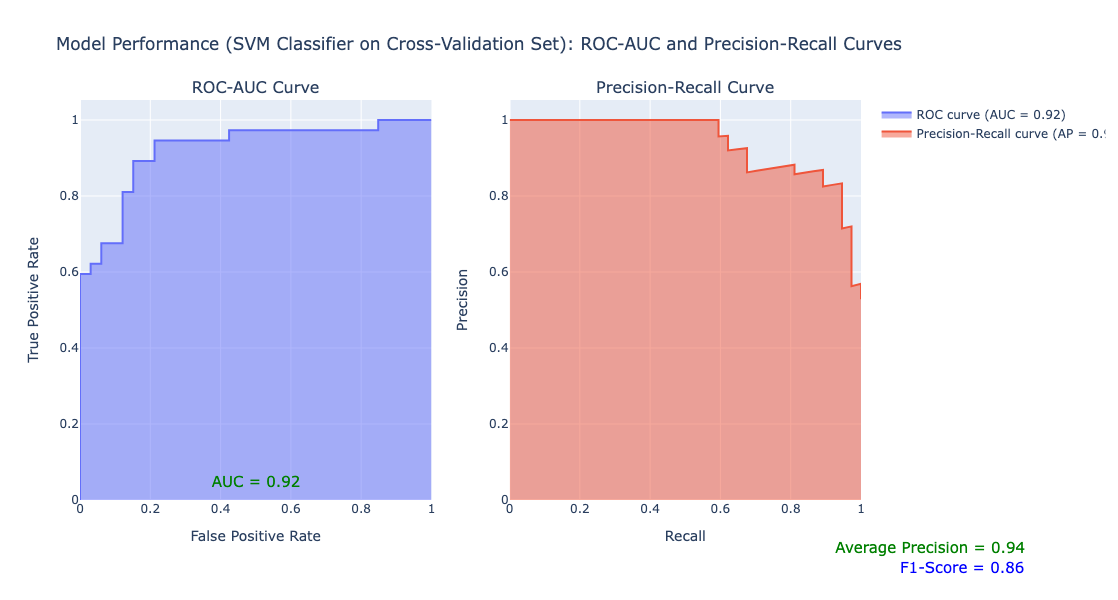

In [35]:
# Calculate metrics for ROC-AUC Curve
fpr, tpr, _ = roc_curve(y_cv, y_scores_svm_cv)
roc_auc_val = auc(fpr, tpr)

# Calculate metrics for Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_cv, y_scores_svm_cv)
pr_auc = average_precision_score(y_cv, y_scores_svm_cv)
f1 = f1_score(y_cv, y_pred_svm_cv)

# Create subplots
fig = make_subplots(
    rows=1, cols=2, subplot_titles=("ROC-AUC Curve", "Precision-Recall Curve")
)

# Add ROC-AUC Curve to the subplot
fig.add_trace(
    go.Scatter(
        x=fpr,
        y=tpr,
        mode="lines",
        name=f"ROC curve (AUC = {roc_auc_val:.2f})",
        fill="tozeroy",
    ),
    row=1,
    col=1,
)
fig.add_annotation(
    x=0.5,
    y=0.05,
    xref="paper",
    yref="paper",
    text=f"AUC = {roc_auc_val:.2f}",
    showarrow=False,
    font=dict(size=15, color="green"),
    row=1,
    col=1,
)

# Add Precision-Recall Curve to the subplot
fig.add_trace(
    go.Scatter(
        x=recall,
        y=precision,
        mode="lines",
        name=f"Precision-Recall curve (AP = {pr_auc:.2f})",
        fill="tozeroy",
    ),
    row=1,
    col=2,
)
fig.add_annotation(
    x=1.2,
    y=-0.15,
    xref="paper",
    yref="paper",
    text=f"Average Precision = {pr_auc:.2f}",
    showarrow=False,
    font=dict(size=15, color="green"),
)
fig.add_annotation(
    x=1.2,
    y=-0.20,
    xref="paper",
    yref="paper",
    text=f"F1-Score = {f1:.2f}",
    showarrow=False,
    font=dict(size=15, color="blue"),
)

# Update layout
fig.update_layout(
    title_text="Model Performance (SVM Classifier on Cross-Validation Set): ROC-AUC and Precision-Recall Curves",
    width=1200,
    height=600,
)
fig.update_xaxes(title_text="False Positive Rate", row=1, col=1)
fig.update_yaxes(title_text="True Positive Rate", row=1, col=1)
fig.update_xaxes(title_text="Recall", row=1, col=2)
fig.update_yaxes(title_text="Precision", row=1, col=2)
fig.update_layout(
    margin=dict(b=100)
)  # Adjust the bottom margin to avoid cutting off annotations

# Save plot
#fig.write_image("./charts/Baseline_Models/Model Performance (SVM Classifier on Cross-Validation Set): ROC-AUC and Precision-Recall Curves.png") #png format
#fig.write_image("./charts/Baseline_Models/Model Performance (SVM Classifier on Cross-Validation Set): ROC-AUC and Precision-Recall Curves.svg") #svg format

# Display the plots side-by-side
fig.show()

##### Testing Set

In [36]:
with mlflow.start_run() as run:

    # Training the SVM model
    svm_model = SVC(kernel="linear", probability=True)

    # Fit the model to the training data
    svm_model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred_svm = svm_model.predict(X_test)
    # Get probabilities for the positive class
    y_scores_svm = svm_model.predict_proba(X_test)[:, 1]

    # Accuracy
    accuracy = svm_model.score(X_test, y_test)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred_svm)
    # Sensitivity (Recall) and Specificity calculations
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    # False Positive Rate (FPR)
    FPR = FP / (FP + TN)

    # ROC AUC Score and curve
    roc_auc = roc_auc_score(y_test, y_scores_svm)  # Use scores, not predictions, for AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_scores_svm)

    precision = precision_score(y_test, y_pred_svm)

    # F1-Score
    f1 = f1_score(y_test, y_pred_svm)

    # Append the new results to your DataFrame or storage structure
    basemodel_df = basemodel_df._append(
        {
            "Baseline Model": "SVM Classifier",
            "Accuracy": accuracy,
            "Sensitivity": sensitivity,
            "Specificity": specificity,
            "False Positive Rate": FPR,
            "AUC Score": roc_auc,
            "F1-Score": f1,
            "Precision": precision,
        },
        ignore_index=True,
    )

    # Evaluate the model on the test set
    print("SVM Classifier")
    print(classification_report(y_test, y_pred_svm))
    print("")
    print("Confusion Matrix: ")
    print(cm)

    # Log the model parameters and metrics to MLflow
    mlflow.sklearn.log_model(svm_model, "SVM Classifier")
    print("Run ID: {}".format(run.info.run_id))

    mlflow.log_params(svm_model.get_params())
    mlflow.log_metrics(
        {
            "Accuracy": accuracy,
            "Sensitivity": sensitivity,
            "Specificity": specificity,
            "False Positive Rate": FPR,
            "AUC Score": roc_auc,
            "F1-Score": f1,
            "Precision": precision
        }
    )

    # Save the model to MLflow
    #shutil.rmtree("SVM Classifier", ignore_errors=True)
    #mlflow.sklearn.save_model(svm_model, "SVM Classifier")

    signature = infer_signature(X_test, y_pred_svm)

    # Log the sklearn model and register as version 1
    mlflow.sklearn.log_model(
        sk_model=svm_model,
        artifact_path="sklearn-model",
        signature=signature,
        registered_model_name="sk-learn-svm-clf-model",
    )

SVM Classifier
              precision    recall  f1-score   support

           0       0.89      0.69      0.77        35
           1       0.74      0.91      0.82        35

    accuracy                           0.80        70
   macro avg       0.82      0.80      0.80        70
weighted avg       0.82      0.80      0.80        70


Confusion Matrix: 
[[24 11]
 [ 3 32]]
Run ID: e104deeeab7848209bfb346b9e19314b


Registered model 'sk-learn-svm-clf-model' already exists. Creating a new version of this model...
2024/04/13 12:33:29 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-svm-clf-model, version 3
Created version '3' of model 'sk-learn-svm-clf-model'.


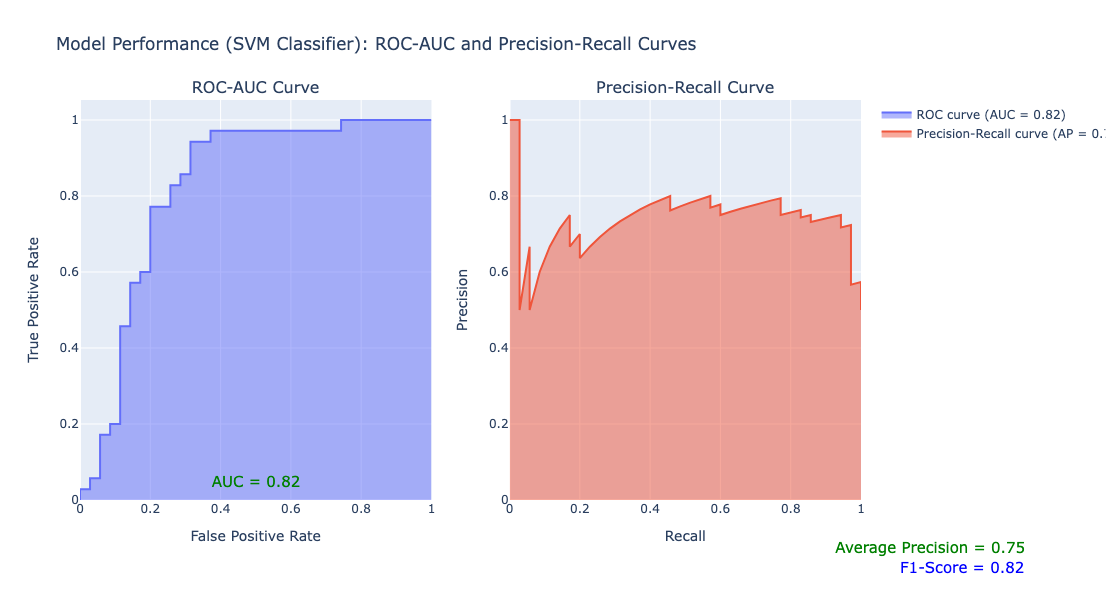

In [37]:
# Calculate metrics for ROC-AUC Curve
fpr, tpr, _ = roc_curve(y_test, y_scores_svm)
roc_auc_val = auc(fpr, tpr)

# Calculate metrics for Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_scores_svm)
pr_auc = average_precision_score(y_test, y_scores_svm)
f1 = f1_score(y_test, y_pred_svm)

# Create subplots
fig = make_subplots(
    rows=1, cols=2, subplot_titles=("ROC-AUC Curve", "Precision-Recall Curve")
)

# Add ROC-AUC Curve to the subplot
fig.add_trace(
    go.Scatter(
        x=fpr,
        y=tpr,
        mode="lines",
        name=f"ROC curve (AUC = {roc_auc_val:.2f})",
        fill="tozeroy",
    ),
    row=1,
    col=1,
)
fig.add_annotation(
    x=0.5,
    y=0.05,
    xref="paper",
    yref="paper",
    text=f"AUC = {roc_auc_val:.2f}",
    showarrow=False,
    font=dict(size=15, color="green"),
    row=1,
    col=1,
)

# Add Precision-Recall Curve to the subplot
fig.add_trace(
    go.Scatter(
        x=recall,
        y=precision,
        mode="lines",
        name=f"Precision-Recall curve (AP = {pr_auc:.2f})",
        fill="tozeroy",
    ),
    row=1,
    col=2,
)
fig.add_annotation(
    x=1.2,
    y=-0.15,
    xref="paper",
    yref="paper",
    text=f"Average Precision = {pr_auc:.2f}",
    showarrow=False,
    font=dict(size=15, color="green"),
)
fig.add_annotation(
    x=1.2,
    y=-0.20,
    xref="paper",
    yref="paper",
    text=f"F1-Score = {f1:.2f}",
    showarrow=False,
    font=dict(size=15, color="blue"),
)

# Update layout
fig.update_layout(
    title_text="Model Performance (SVM Classifier): ROC-AUC and Precision-Recall Curves",
    width=1200,
    height=600,
)
fig.update_xaxes(title_text="False Positive Rate", row=1, col=1)
fig.update_yaxes(title_text="True Positive Rate", row=1, col=1)
fig.update_xaxes(title_text="Recall", row=1, col=2)
fig.update_yaxes(title_text="Precision", row=1, col=2)
fig.update_layout(
    margin=dict(b=100)
)  # Adjust the bottom margin to avoid cutting off annotations

# Save plot
#fig.write_image("./charts/Baseline_Models/Model Performance (SVM Classifier): ROC-AUC and Precision-Recall Curves.png") #png format
#fig.write_image("./charts/Baseline_Models/Model Performance (SVM Classifier): ROC-AUC and Precision-Recall Curves.svg") #svg format

# Display the plots side-by-side
fig.show()

#### KNN Classifier

##### Cross-Validation Set

In [38]:
with mlflow.start_run() as run:

    # Training the KNN model
    knn_model_cv = KNeighborsClassifier(n_neighbors=5)

    # Fit the model to the training data
    knn_model_cv.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred_knn_cv = knn_model_cv.predict(X_cv)
    # Get probabilities for the positive class
    y_scores_knn_cv = knn_model_cv.predict_proba(X_cv)[:, 1]

    # Metrics calculation
    accuracy = knn_model_cv.score(X_cv, y_cv)
    cm = confusion_matrix(y_cv, y_pred_knn_cv)
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    sensitivity = TP / (TP + FN)  # Recall
    specificity = TN / (TN + FP)
    # False Positive Rate (FPR)
    FPR = FP / (FP + TN)

    roc_auc = roc_auc_score(y_cv, y_scores_knn_cv)
    fpr, tpr, _ = roc_curve(y_cv, y_scores_knn_cv)
    precision = precision_score(y_cv, y_pred_knn_cv)
    f1 = f1_score(y_cv, y_pred_knn_cv)
    pr_auc = average_precision_score(y_cv, y_scores_knn_cv)

    # Append the new results to your DataFrame
    basemodel_df = basemodel_df._append(
        {
            "Baseline Model": "KNN Classifier CV",
            "Accuracy": accuracy,
            "Sensitivity": sensitivity,
            "Specificity": specificity,
            "False Positive Rate": FPR,
            "AUC Score": roc_auc,
            "F1-Score": f1,
            "Precision": precision,
        },
        ignore_index=True,
    )

    # Evaluate the model on the test set
    print("KNN Classifier CV")
    print(classification_report(y_cv, y_pred_knn_cv))
    print("")
    print("Confusion Matrix: ")
    print(cm)

    # Log the model parameters and metrics to MLflow
    mlflow.sklearn.log_model(knn_model_cv, "KNN Classifier CV")
    print("Run ID: {}".format(run.info.run_id))

    mlflow.log_params(knn_model_cv.get_params())
    mlflow.log_metrics(
        {
            "Accuracy": accuracy,
            "Sensitivity": sensitivity,
            "Specificity": specificity,
            "False Positive Rate": FPR,
            "AUC Score": roc_auc,
            "F1-Score": f1,
            "Precision": precision
        }
    )

    # Save the model to MLflow
    #shutil.rmtree("KNN Classifier CV",  ignore_errors=True)
    #mlflow.sklearn.save_model(knn_model_cv, "KNN Classifier CV")

    signature = infer_signature(X_cv, y_pred_knn_cv)

    # Log the sklearn model and register as version 1
    mlflow.sklearn.log_model(
        sk_model=knn_model_cv,
        artifact_path="sklearn-model",
        signature=signature,
        registered_model_name="sk-learn-knn-clf-cv-model",
    )

KNN Classifier CV
              precision    recall  f1-score   support

           0       0.85      0.70      0.77        33
           1       0.77      0.89      0.82        37

    accuracy                           0.80        70
   macro avg       0.81      0.79      0.80        70
weighted avg       0.81      0.80      0.80        70


Confusion Matrix: 
[[23 10]
 [ 4 33]]
Run ID: 64f41e3abd3c4be4abe0b0e4e5243860


Registered model 'sk-learn-knn-clf-cv-model' already exists. Creating a new version of this model...
2024/04/13 12:33:39 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-knn-clf-cv-model, version 5
Created version '5' of model 'sk-learn-knn-clf-cv-model'.


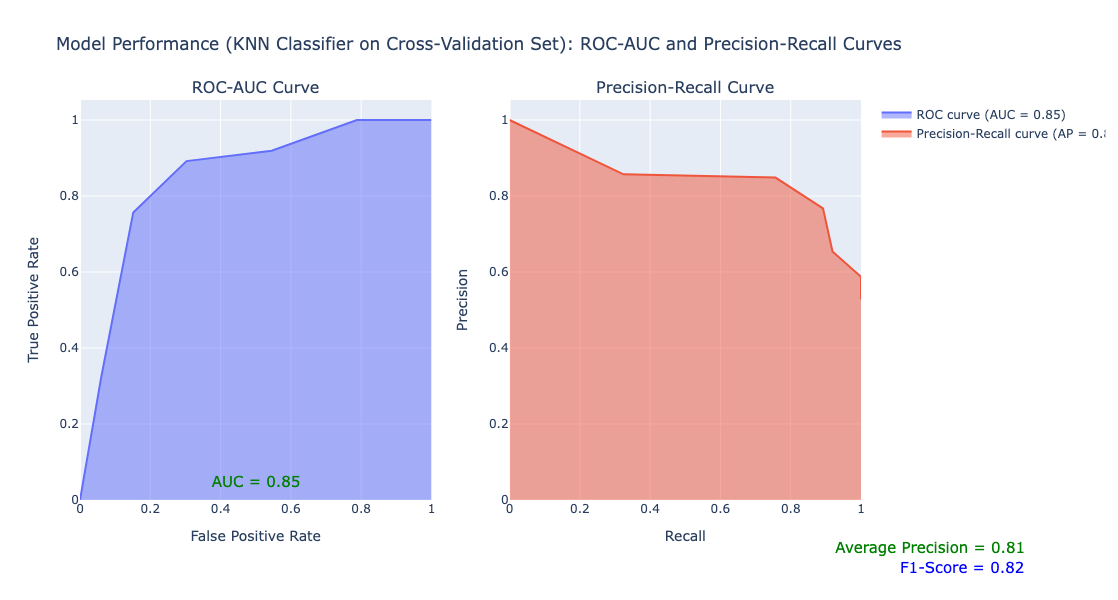

In [39]:
# Calculate metrics for ROC-AUC Curve
fpr, tpr, _ = roc_curve(y_cv, y_scores_knn_cv)
roc_auc_val = auc(fpr, tpr)

# Calculate metrics for Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_cv, y_scores_knn_cv)
pr_auc = average_precision_score(y_cv, y_scores_knn_cv)
f1 = f1_score(y_cv, y_pred_knn_cv)

# Create subplots
fig = make_subplots(
    rows=1, cols=2, subplot_titles=("ROC-AUC Curve", "Precision-Recall Curve")
)

# Add ROC-AUC Curve to the subplot
fig.add_trace(
    go.Scatter(
        x=fpr,
        y=tpr,
        mode="lines",
        name=f"ROC curve (AUC = {roc_auc_val:.2f})",
        fill="tozeroy",
    ),
    row=1,
    col=1,
)
fig.add_annotation(
    x=0.5,
    y=0.05,
    xref="paper",
    yref="paper",
    text=f"AUC = {roc_auc_val:.2f}",
    showarrow=False,
    font=dict(size=15, color="green"),
    row=1,
    col=1,
)

# Add Precision-Recall Curve to the subplot
fig.add_trace(
    go.Scatter(
        x=recall,
        y=precision,
        mode="lines",
        name=f"Precision-Recall curve (AP = {pr_auc:.2f})",
        fill="tozeroy",
    ),
    row=1,
    col=2,
)
fig.add_annotation(
    x=1.2,
    y=-0.15,
    xref="paper",
    yref="paper",
    text=f"Average Precision = {pr_auc:.2f}",
    showarrow=False,
    font=dict(size=15, color="green"),
)
fig.add_annotation(
    x=1.2,
    y=-0.20,
    xref="paper",
    yref="paper",
    text=f"F1-Score = {f1:.2f}",
    showarrow=False,
    font=dict(size=15, color="blue"),
)

# Update layout
fig.update_layout(
    title_text="Model Performance (KNN Classifier on Cross-Validation Set): ROC-AUC and Precision-Recall Curves",
    width=1200,
    height=600,
)
fig.update_xaxes(title_text="False Positive Rate", row=1, col=1)
fig.update_yaxes(title_text="True Positive Rate", row=1, col=1)
fig.update_xaxes(title_text="Recall", row=1, col=2)
fig.update_yaxes(title_text="Precision", row=1, col=2)
fig.update_layout(
    margin=dict(b=100)
)  # Adjust bottom margin to avoid cutting off annotations

# Save plot
#fig.write_image("./charts/Baseline_Models/Model Performance (KNN Classifier on Cross-Validation Set): ROC-AUC and Precision-Recall Curves.png") #png format
#fig.write_image("./charts/Baseline_Models/Model Performance (KNN Classifier on Cross-Validation Set): ROC-AUC and Precision-Recall Curves.svg") #svg format

# Display the plots side-by-side
fig.show()

##### Testing Set

In [40]:
with mlflow.start_run() as run:

    # Training the KNN model
    knn_model = KNeighborsClassifier(n_neighbors=5)

    # Fit the model to the training data
    knn_model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred_knn = knn_model.predict(X_test)
    # Get probabilities for the positive class
    y_scores_knn = knn_model.predict_proba(X_test)[:, 1]

    # Metrics calculation
    accuracy = knn_model.score(X_test, y_test)
    cm = confusion_matrix(y_test, y_pred_knn)
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    sensitivity = TP / (TP + FN)  # Recall
    specificity = TN / (TN + FP)
    # False Positive Rate (FPR)
    FPR = FP / (FP + TN)
    roc_auc = roc_auc_score(y_test, y_scores_knn)
    fpr, tpr, _ = roc_curve(y_test, y_scores_knn)
    precision = precision_score(y_test, y_pred_knn)
    f1 = f1_score(y_test, y_pred_knn)
    pr_auc = average_precision_score(y_test, y_scores_knn)

    # Append the new results to your DataFrame
    basemodel_df = basemodel_df._append(
        {
            "Baseline Model": "KNN Classifier",
            "Accuracy": accuracy,
            "Sensitivity": sensitivity,
            "Specificity": specificity,
            "False Positive Rate": FPR,
            "AUC Score": roc_auc,
            "F1-Score": f1,
            "Precision": precision,
        },
        ignore_index=True,
    )

    # Evaluate the model on the test set
    print("KNN Classifier")
    print(classification_report(y_test, y_pred_knn))
    print("")
    print("Confusion Matrix: ")
    print(cm)

    # Log the model parameters and metrics to MLflow
    mlflow.sklearn.log_model(knn_model, "KNN Classifier")
    print("Run ID: {}".format(run.info.run_id))

    mlflow.log_params(knn_model.get_params())
    mlflow.log_metrics(
        {
            "Accuracy": accuracy,
            "Sensitivity": sensitivity,
            "Specificity": specificity,
            "False Positive Rate": FPR,
            "AUC Score": roc_auc,
            "F1-Score": f1,
            "Precision": precision
        }
    )

    # Save the model to MLflow
    #shutil.rmtree("KNN Classifier",  ignore_errors=True)
    #mlflow.sklearn.save_model(knn_model, "KNN Classifier")

    signature = infer_signature(X_cv, y_pred_knn)

    # Log the sklearn model and register as version 1
    mlflow.sklearn.log_model(
        sk_model=knn_model,
        artifact_path="sklearn-model",
        signature=signature,
        registered_model_name="sk-learn-knn-clf-cv-model",
    )

KNN Classifier
              precision    recall  f1-score   support

           0       0.74      0.57      0.65        35
           1       0.65      0.80      0.72        35

    accuracy                           0.69        70
   macro avg       0.70      0.69      0.68        70
weighted avg       0.70      0.69      0.68        70


Confusion Matrix: 
[[20 15]
 [ 7 28]]
Run ID: 1597375a6a82471db9459b8eb0b6ad8f


Registered model 'sk-learn-knn-clf-cv-model' already exists. Creating a new version of this model...
2024/04/13 12:33:48 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-knn-clf-cv-model, version 6
Created version '6' of model 'sk-learn-knn-clf-cv-model'.


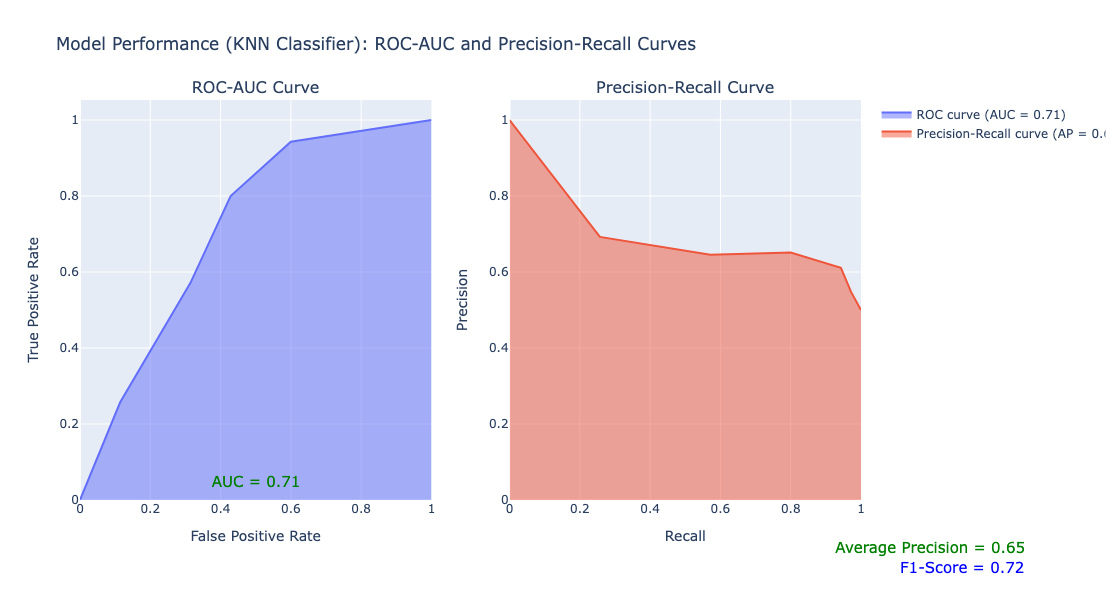

In [41]:
# Calculate metrics for ROC-AUC Curve
fpr, tpr, _ = roc_curve(y_test, y_scores_knn)
roc_auc_val = auc(fpr, tpr)

# Calculate metrics for Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_scores_knn)
pr_auc = average_precision_score(y_test, y_scores_knn)
f1 = f1_score(y_test, y_pred_knn)

# Create subplots
fig = make_subplots(
    rows=1, cols=2, subplot_titles=("ROC-AUC Curve", "Precision-Recall Curve")
)

# Add ROC-AUC Curve to the subplot
fig.add_trace(
    go.Scatter(
        x=fpr,
        y=tpr,
        mode="lines",
        name=f"ROC curve (AUC = {roc_auc_val:.2f})",
        fill="tozeroy",
    ),
    row=1,
    col=1,
)
fig.add_annotation(
    x=0.5,
    y=0.05,
    xref="paper",
    yref="paper",
    text=f"AUC = {roc_auc_val:.2f}",
    showarrow=False,
    font=dict(size=15, color="green"),
    row=1,
    col=1,
)

# Add Precision-Recall Curve to the subplot
fig.add_trace(
    go.Scatter(
        x=recall,
        y=precision,
        mode="lines",
        name=f"Precision-Recall curve (AP = {pr_auc:.2f})",
        fill="tozeroy",
    ),
    row=1,
    col=2,
)
fig.add_annotation(
    x=1.2,
    y=-0.15,
    xref="paper",
    yref="paper",
    text=f"Average Precision = {pr_auc:.2f}",
    showarrow=False,
    font=dict(size=15, color="green"),
)
fig.add_annotation(
    x=1.2,
    y=-0.20,
    xref="paper",
    yref="paper",
    text=f"F1-Score = {f1:.2f}",
    showarrow=False,
    font=dict(size=15, color="blue"),
)

# Update layout
fig.update_layout(
    title_text="Model Performance (KNN Classifier): ROC-AUC and Precision-Recall Curves",
    width=1200,
    height=600,
)
fig.update_xaxes(title_text="False Positive Rate", row=1, col=1)
fig.update_yaxes(title_text="True Positive Rate", row=1, col=1)
fig.update_xaxes(title_text="Recall", row=1, col=2)
fig.update_yaxes(title_text="Precision", row=1, col=2)
fig.update_layout(
    margin=dict(b=100)
)  # Adjust bottom margin to avoid cutting off annotations

# Save plot
#fig.write_image("./charts/Baseline_Models/Model Performance (KNN Classifier): ROC-AUC and Precision-Recall Curves.png") #png format
#fig.write_image("./charts/Baseline_Models/Model Performance (KNN Classifier): ROC-AUC and Precision-Recall Curves.svg") #svg format

# Display the plots side-by-side
fig.show()

#### Decision Tree Classifier

##### Cross-Validation Set

In [42]:
with mlflow.start_run() as run:

    # Create a random decision tree classifier
    dt_clf_cv = DecisionTreeClassifier(random_state=42)

    # Fit the model to the training data
    dt_clf_cv.fit(X_train, y_train)

    # Predict the test data
    y_pred_dt_cv = dt_clf_cv.predict(X_cv)
    # Get probabilities for the positive class
    y_scores_dt_cv = dt_clf_cv.predict_proba(X_cv)[:, 1]

    # Metrics calculation
    accuracy = accuracy_score(y_cv, y_pred_dt_cv)
    cm = confusion_matrix(y_cv, y_pred_dt_cv)
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    # False Positive Rate (FPR)
    FPR = FP / (FP + TN)

    roc_auc = roc_auc_score(y_cv, y_scores_dt_cv)
    fpr, tpr, _ = roc_curve(y_cv, y_scores_dt_cv)
    precision = precision_score(y_cv, y_pred_dt_cv)
    f1 = f1_score(y_cv, y_pred_dt_cv)
    pr_auc = average_precision_score(y_cv, y_scores_dt_cv)

    # Append the new results to your DataFrame
    basemodel_df = basemodel_df._append(
        {
            "Baseline Model": "Decision Tree Classifier CV",
            "Accuracy": accuracy,
            "Sensitivity": sensitivity,
            "Specificity": specificity,
            "False Positive Rate": FPR,
            "AUC Score": roc_auc,
            "F1-Score": f1,
            "Precision": precision,
        },
        ignore_index=True,
    )

    # Evaluate the model on the test set
    print("Decision Tree Classifier CV")
    print(classification_report(y_cv, y_pred_dt_cv))
    print("")
    print("Confusion Matrix: ")
    print(cm)

    # Log the model parameters and metrics to MLflow
    mlflow.sklearn.log_model(dt_clf_cv, "Decision Tree Classifier CV")
    print("Run ID: {}".format(run.info.run_id))

    mlflow.log_params(dt_clf_cv.get_params())
    mlflow.log_metrics(
        {
            "Accuracy": accuracy,
            "Sensitivity": sensitivity,
            "Specificity": specificity,
            "False Positive Rate": FPR,
            "AUC Score": roc_auc,
            "F1-Score": f1,
            "Precision": precision
        }
    )

    # Save the model to MLflow
    #shutil.rmtree("Decision Tree Classifier CV", ignore_errors=True)
    #mlflow.sklearn.save_model(dt_clf_cv, "Decision Tree Classifier CV")

    signature = infer_signature(X_cv, y_pred_dt_cv)

    # Log the sklearn model and register as version 1
    mlflow.sklearn.log_model(
        sk_model=dt_clf_cv,
        artifact_path="sklearn-model",
        signature=signature,
        registered_model_name="sk-learn-decision-tree-clf-cv-model",
    )

Decision Tree Classifier CV
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        33
           1       0.82      0.84      0.83        37

    accuracy                           0.81        70
   macro avg       0.81      0.81      0.81        70
weighted avg       0.81      0.81      0.81        70


Confusion Matrix: 
[[26  7]
 [ 6 31]]
Run ID: 807e8c73863c4084bc15b2c637e55284


Registered model 'sk-learn-decision-tree-clf-cv-model' already exists. Creating a new version of this model...
2024/04/13 12:33:56 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-decision-tree-clf-cv-model, version 5
Created version '5' of model 'sk-learn-decision-tree-clf-cv-model'.


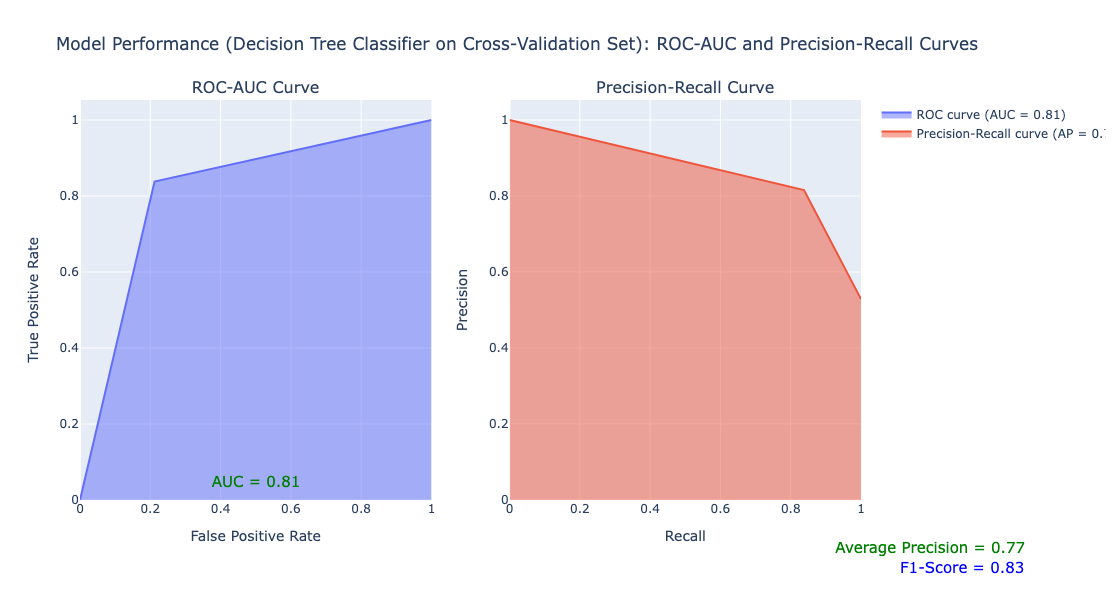

In [43]:
# Calculate metrics for ROC-AUC Curve
fpr, tpr, _ = roc_curve(y_cv, y_scores_dt_cv)
roc_auc_val = auc(fpr, tpr)

# Calculate metrics for Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_cv, y_scores_dt_cv)
pr_auc = average_precision_score(y_cv, y_scores_dt_cv)
f1 = f1_score(y_cv, y_pred_dt_cv)

# Create subplots
fig = make_subplots(
    rows=1, cols=2, subplot_titles=("ROC-AUC Curve", "Precision-Recall Curve")
)

# Add ROC-AUC Curve to the subplot
fig.add_trace(
    go.Scatter(
        x=fpr,
        y=tpr,
        mode="lines",
        name=f"ROC curve (AUC = {roc_auc_val:.2f})",
        fill="tozeroy",
    ),
    row=1,
    col=1,
)
fig.add_annotation(
    x=0.5,
    y=0.05,
    xref="paper",
    yref="paper",
    text=f"AUC = {roc_auc_val:.2f}",
    showarrow=False,
    font=dict(size=15, color="green"),
    row=1,
    col=1,
)

# Add Precision-Recall Curve to the subplot
fig.add_trace(
    go.Scatter(
        x=recall,
        y=precision,
        mode="lines",
        name=f"Precision-Recall curve (AP = {pr_auc:.2f})",
        fill="tozeroy",
    ),
    row=1,
    col=2,
)
fig.add_annotation(
    x=1.2,
    y=-0.15,
    xref="paper",
    yref="paper",
    text=f"Average Precision = {pr_auc:.2f}",
    showarrow=False,
    font=dict(size=15, color="green"),
)
fig.add_annotation(
    x=1.2,
    y=-0.20,
    xref="paper",
    yref="paper",
    text=f"F1-Score = {f1:.2f}",
    showarrow=False,
    font=dict(size=15, color="blue"),
)

# Update layout
fig.update_layout(
    title_text="Model Performance (Decision Tree Classifier on Cross-Validation Set): ROC-AUC and Precision-Recall Curves",
    width=1200,
    height=600,
)
fig.update_xaxes(title_text="False Positive Rate", row=1, col=1)
fig.update_yaxes(title_text="True Positive Rate", row=1, col=1)
fig.update_xaxes(title_text="Recall", row=1, col=2)
fig.update_yaxes(title_text="Precision", row=1, col=2)
fig.update_layout(
    margin=dict(b=100)
)  # Adjust bottom margin to avoid cutting off annotations

# Save plot
#fig.write_image("./charts/Baseline_Models/Model Performance (Decision Tree Classifier on Cross-Validation Set): ROC-AUC and Precision-Recall Curves.png") #png format
#fig.write_image("./charts/Baseline_Models/Model Performance (Decision Tree Classifier on Cross-Validation Set): ROC-AUC and Precision-Recall Curves.svg") #svg format

# Display the plots side-by-side
fig.show()

##### Testing Set

In [44]:
with mlflow.start_run() as run:

    # Create a random decision tree classifier
    dt_clf = DecisionTreeClassifier(random_state=42)

    # Fit the model to the training data
    dt_clf.fit(X_train, y_train)

    # Predict on the test data
    y_pred_dt = dt_clf.predict(X_test)
    # Get probabilities for the positive class
    y_scores_dt = dt_clf.predict_proba(X_test)[:, 1]

    # Metrics calculation
    accuracy = accuracy_score(y_test, y_pred_dt)
    cm = confusion_matrix(y_test, y_pred_dt)
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    # False Positive Rate (FPR)
    FPR = FP / (FP + TN)

    roc_auc = roc_auc_score(y_test, y_scores_dt)
    fpr, tpr, _ = roc_curve(y_test, y_scores_dt)
    precision = precision_score(y_test, y_pred_dt)
    f1 = f1_score(y_test, y_pred_dt)
    pr_auc = average_precision_score(y_test, y_scores_dt)

    # Append the new results to your DataFrame
    basemodel_df = basemodel_df._append(
        {
            "Baseline Model": "Decision Tree Classifier",
            "Accuracy": accuracy,
            "Sensitivity": sensitivity,
            "Specificity": specificity,
            "False Positive Rate": FPR,
            "AUC Score": roc_auc,
            "F1-Score": f1,
            "Precision": precision,
        },
        ignore_index=True,
    )

    # Evaluate the model on the test set
    print("Decision Tree Classifier")
    print(classification_report(y_test, y_pred_dt))
    print("")
    print("Confusion Matrix: ")
    print(cm)

    # Log the model parameters and metrics to MLflow
    mlflow.sklearn.log_model(dt_clf, "Decision Tree Classifier")
    print("Run ID: {}".format(run.info.run_id))

    mlflow.log_params(dt_clf.get_params())
    mlflow.log_metrics(
        {
            "Accuracy": accuracy,
            "Sensitivity": sensitivity,
            "Specificity": specificity,
            "False Positive Rate": FPR,
            "AUC Score": roc_auc,
            "F1-Score": f1,
            "Precision": precision
        }
    )

    # Save the model to MLflow
    #shutil.rmtree("Decision Tree Classifier", ignore_errors=True)
    #mlflow.sklearn.save_model(dt_clf, "Decision Tree Classifier")

    signature = infer_signature(X_test, y_pred_dt_cv)

    # Log the sklearn model and register as version 1
    mlflow.sklearn.log_model(
        sk_model=dt_clf,
        artifact_path="sklearn-model",
        signature=signature,
        registered_model_name="sk-learn-decision-tree-clf-cv-model",
    )

Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.92      0.69      0.79        35
           1       0.75      0.94      0.84        35

    accuracy                           0.81        70
   macro avg       0.84      0.81      0.81        70
weighted avg       0.84      0.81      0.81        70


Confusion Matrix: 
[[24 11]
 [ 2 33]]
Run ID: 3e744232af3b44b7a9c5e7c7115e60b1


Registered model 'sk-learn-decision-tree-clf-cv-model' already exists. Creating a new version of this model...
2024/04/13 12:34:05 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-decision-tree-clf-cv-model, version 6
Created version '6' of model 'sk-learn-decision-tree-clf-cv-model'.


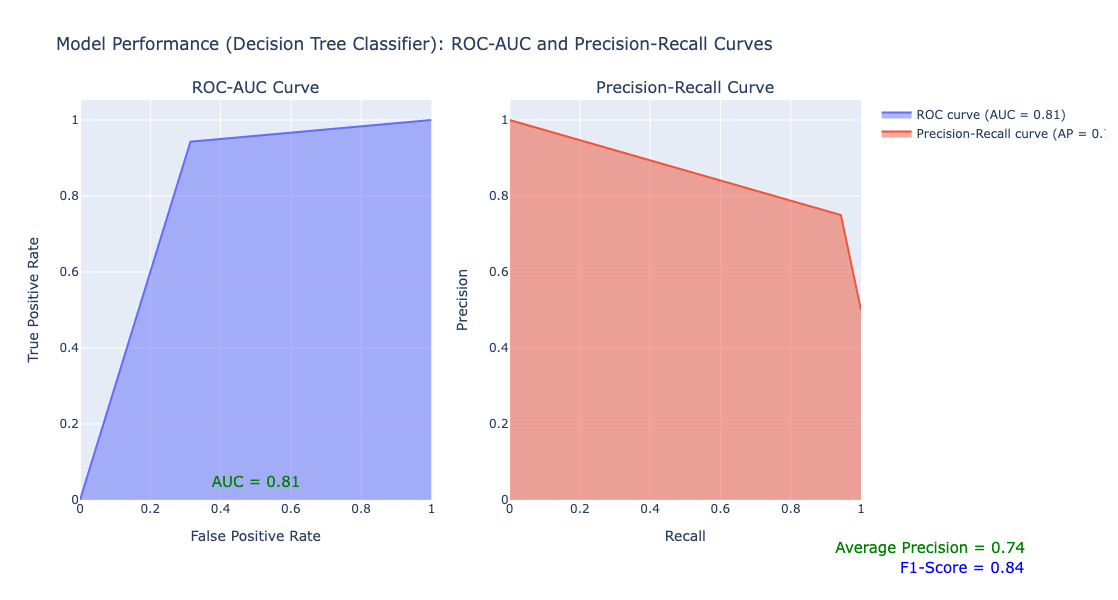

In [45]:
# Calculate metrics for ROC-AUC Curve
fpr, tpr, _ = roc_curve(y_test, y_scores_dt)
roc_auc_val = auc(fpr, tpr)

# Calculate metrics for Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_scores_dt)
pr_auc = average_precision_score(y_test, y_scores_dt)
f1 = f1_score(y_test, y_pred_dt)

# Create subplots
fig = make_subplots(
    rows=1, cols=2, subplot_titles=("ROC-AUC Curve", "Precision-Recall Curve")
)

# Add ROC-AUC Curve to the subplot
fig.add_trace(
    go.Scatter(
        x=fpr,
        y=tpr,
        mode="lines",
        name=f"ROC curve (AUC = {roc_auc_val:.2f})",
        fill="tozeroy",
    ),
    row=1,
    col=1,
)
fig.add_annotation(
    x=0.5,
    y=0.05,
    xref="paper",
    yref="paper",
    text=f"AUC = {roc_auc_val:.2f}",
    showarrow=False,
    font=dict(size=15, color="green"),
    row=1,
    col=1,
)

# Add Precision-Recall Curve to the subplot
fig.add_trace(
    go.Scatter(
        x=recall,
        y=precision,
        mode="lines",
        name=f"Precision-Recall curve (AP = {pr_auc:.2f})",
        fill="tozeroy",
    ),
    row=1,
    col=2,
)
fig.add_annotation(
    x=1.2,
    y=-0.15,
    xref="paper",
    yref="paper",
    text=f"Average Precision = {pr_auc:.2f}",
    showarrow=False,
    font=dict(size=15, color="green"),
)
fig.add_annotation(
    x=1.2,
    y=-0.20,
    xref="paper",
    yref="paper",
    text=f"F1-Score = {f1:.2f}",
    showarrow=False,
    font=dict(size=15, color="blue"),
)

# Update layout
fig.update_layout(
    title_text="Model Performance (Decision Tree Classifier): ROC-AUC and Precision-Recall Curves",
    width=1200,
    height=600,
)
fig.update_xaxes(title_text="False Positive Rate", row=1, col=1)
fig.update_yaxes(title_text="True Positive Rate", row=1, col=1)
fig.update_xaxes(title_text="Recall", row=1, col=2)
fig.update_yaxes(title_text="Precision", row=1, col=2)
fig.update_layout(
    margin=dict(b=100)
)  # Adjust bottom margin to avoid cutting off annotations

# Save plot
#fig.write_image("./charts/Baseline_Models/Model Performance (Decision Tree Classifier): ROC-AUC and Precision-Recall Curves.png") #png format
#fig.write_image("./charts/Baseline_Models/Model Performance (Decision Tree Classifier): ROC-AUC and Precision-Recall Curves.svg") #svg format

# Display the plots side-by-side
fig.show()

##### Evaluation Metrics Comparison

In [46]:
basemodel_df.sort_values("Specificity", ascending=False)

,Baseline Model,Accuracy,Sensitivity,Specificity,False Positive Rate,Precision,F1-Score,AUC Score
0,Logistic Regression CV,0.857143,0.918919,0.787879,0.212121,0.829268,0.871795,0.935299
6,Decision Tree Classifier CV,0.814286,0.837838,0.787879,0.212121,0.815789,0.826667,0.812858
2,SVM Classifier CV,0.842857,0.945946,0.727273,0.272727,0.795455,0.864198,0.921376
4,KNN Classifier CV,0.800000,0.891892,0.696970,0.303030,0.767442,0.825000,0.848075
7,Decision Tree Classifier,0.814286,0.942857,0.685714,0.314286,0.750000,0.835443,0.814286
3,SVM Classifier,0.800000,0.914286,0.685714,0.314286,0.744186,0.820513,0.823673
1,Logistic Regression,0.742857,0.828571,0.657143,0.342857,0.707317,0.763158,0.816327
5,KNN Classifier,0.685714,0.800000,0.571429,0.428571,0.651163,0.717949,0.713878


The ***Logistic Regression algorithm*** provided the best performance among the four (4) baseline models in terms of all evaluation metrics used.

#### Performance Metrics of Baseline Models

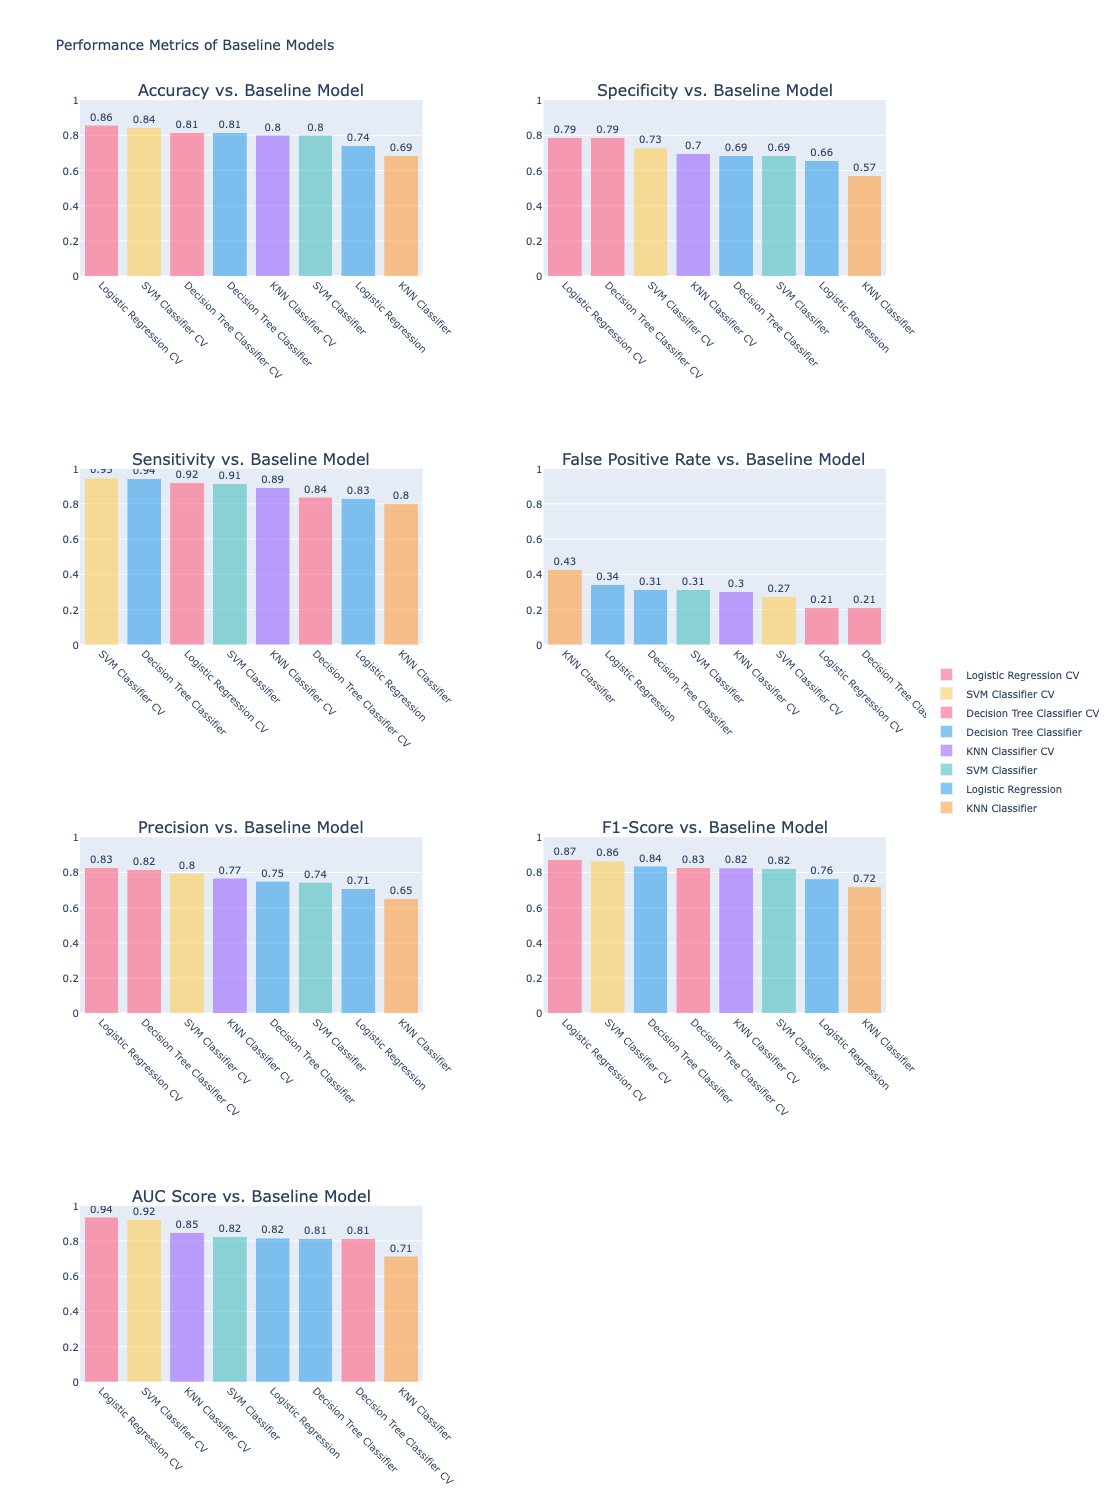

In [47]:
# Define a list of colors for the baseline models
colors = [
    "rgba(255, 99, 132, 0.6)",
    "rgba(54, 162, 235, 0.6)",
    "rgba(255, 206, 86, 0.6)",
    "rgba(75, 192, 192, 0.6)",
    "rgba(153, 102, 255, 0.6)",
    "rgba(255, 159, 64, 0.6)",
]

# Map each ensemble model to a specific color
unique_models = basemodel_df["Baseline Model"].unique()
color_map = {model: colors[i % len(colors)] for i, model in enumerate(unique_models)}

# Create Subplots for the model performance using the 6 evaluation metrics
fig = make_subplots(
    rows=4,
    cols=2,
    subplot_titles=(
        "Accuracy vs. Baseline Model",
        "Specificity vs. Baseline Model",
        "Sensitivity vs. Baseline Model",
        "False Positive Rate vs. Baseline Model",
        "Precision vs. Baseline Model",
        "F1-Score vs. Baseline Model",
        "AUC Score vs. Baseline Model",
    ),
    horizontal_spacing=0.15,
    vertical_spacing=0.15,
)

metrics = [
    "Accuracy",
    "Specificity",
    "Sensitivity",
    "False Positive Rate",
    "Precision",
    "F1-Score",
    "AUC Score",
]
plot_positions = [(1, 1), (1, 2), (2, 1), (2, 2), (3, 1), (3, 2), (4, 1)]

for metric, pos in zip(metrics, plot_positions):
    # Sort the DataFrame based on the current metric in descending order
    df_sorted = basemodel_df.sort_values(by=metric, ascending=False)

    # Extracting the sorted model names for consistent color mapping
    sorted_models = df_sorted["Baseline Model"].unique()

    # Generate one bar for each model, now in sorted order
    for model in sorted_models:
        df_filtered = df_sorted[df_sorted["Baseline Model"] == model]
        show_legend = (
            metric == "Accuracy"
        )  # Show legend only in the first subplot for clarity
        fig.add_trace(
            go.Bar(
                x=[model],
                y=df_filtered[metric],
                name=model,
                marker_color=color_map[model],
                text=df_filtered[metric].round(2),
                textposition="outside",
                showlegend=show_legend,
            ),
            row=pos[0],
            col=pos[1],
        )

# Update layout
fig.update_layout(
    height=1500,
    width=1100,
    title_text="Performance Metrics of Baseline Models",
    showlegend=True,
    legend=dict(orientation="v", x=1.05, y=0.5),
    font=dict(size=10),
)
fig.update_xaxes(tickangle=45)
fig.update_yaxes(range=[0, 1])

# Save plot
#fig.write_image("./charts/Baseline_Models/Performance Metrics of Baseline Models.png") #png format
#fig.write_image("./charts/Baseline_Models/Performance Metrics of Baseline Models.svg") #svg format

# Display plot
fig.show()

The ***Logistic Regression algorithm*** provided the best performance among the four baseline models in terms of all evaluation metrics used. The evaluation metrics used for comparison were ***Accuracy, Sensitivity, Specificity, Precision, F1-Score***, and ***AUC Score*** respectively.

### Analysis of Ensemble Methods <a class="anchor" id="model_anal"></a>

This section of the code involves evaluating the performance of the ensemble learning methods used in the model training section, by using appropriate evaluation metrics and comparing the results. The purpose is to determine the most effective and efficient method for detecting ovarian cancer tumors and to identify the factors that contribute to the superior performance of a particular ensemble learning technique over others.

In [48]:
#  Create a dataframe to store the accuracy of ensemble models for further analysis
ensemble_df = pd.DataFrame(
    columns=[
        "Ensemble Model",
        "Accuracy",
        "Sensitivity",
        "Specificity",
        "False Positive Rate",
        "Precision",
        "AUC Score",
        "F1-Score",
    ]
)

#### Voting Classifier

##### Cross-Validation Set

In [49]:
with mlflow.start_run() as run:

    # Making the final model using a voting classifier with soft voting
    vote_model_soft_cv = VotingClassifier(
        estimators=[
            ("logistic regression CV", lr_clf_cv),
            ("svc CV", svm_model_cv),  # Make sure svm_model is trained with probabilities
            ("knn CV", knn_model_cv),
            ("decision tree CV", dt_clf_cv),
        ],
        voting="soft",
    )

    # Training the model on the training dataset
    vote_model_soft_cv.fit(X_train, y_train)

    # Predicting the output on the test dataset
    y_pred_final_vm_soft_cv = vote_model_soft_cv.predict(X_cv)
    # Get probabilities for the positive class for AUC calculation
    y_scores_vm_soft_cv = vote_model_soft_cv.predict_proba(X_cv)[:, 1]

    # Metrics calculation
    accuracy = accuracy_score(y_cv, y_pred_final_vm_soft_cv)
    cm = confusion_matrix(y_cv, y_pred_final_vm_soft_cv)
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    # False Positive Rate (FPR)
    FPR = FP / (FP + TN)
    precision = precision_score(y_cv, y_pred_final_vm_soft_cv)
    f1 = f1_score(y_cv, y_pred_final_vm_soft_cv)
    roc_auc = roc_auc_score(y_cv, y_scores_vm_soft_cv)
    fpr, tpr, _ = roc_curve(y_cv, y_scores_vm_soft_cv)

    ensemble_df = ensemble_df._append(
        {
            "Ensemble Model": "Voting Classifier (Soft) CV",
            "Accuracy": accuracy,
            "Sensitivity": sensitivity,
            "Specificity": specificity,
            "False Positive Rate": FPR,
            "AUC Score": roc_auc,
            "F1-Score": f1,
            "Precision": precision,
        },
        ignore_index=True,
    )

    # Evaluate the model on the test set
    print("Voting Classifier Model (Soft Voting) CV")
    print(classification_report(y_cv, y_pred_final_vm_soft_cv))
    print("")
    print("Confusion Matrix: ")
    print(cm)

    # Log the model parameters and metrics to MLflow
    mlflow.sklearn.log_model(vote_model_soft_cv, "Voting Classifier Model (Soft Voting) Regression CV")
    print("Run ID: {}".format(run.info.run_id))

    mlflow.log_params(vote_model_soft_cv.get_params())
    mlflow.log_metrics(
        {
            "Accuracy": accuracy,
            "Sensitivity": sensitivity,
            "Specificity": specificity,
            "False Positive Rate": FPR,
            "AUC Score": roc_auc,
            "F1-Score": f1,
            "Precision": precision
        }
    )

    # Save the model to MLflow
    #shutil.rmtree("Voting Classifier Model (Soft Voting) CV", ignore_errors=True)
    #mlflow.sklearn.save_model(vote_model_soft_cv, "Voting Classifier Model (Soft Voting) CV")

    signature = infer_signature(X_cv, y_pred_final_vm_soft_cv)

    # Log the sklearn model and register as version 1
    mlflow.sklearn.log_model(
        sk_model=vote_model_soft_cv,
        artifact_path="sklearn-model",
        signature=signature,
        registered_model_name="sk-learn-svm-clf-cv-model",
    )

Voting Classifier Model (Soft Voting) CV
              precision    recall  f1-score   support

           0       0.93      0.82      0.87        33
           1       0.85      0.95      0.90        37

    accuracy                           0.89        70
   macro avg       0.89      0.88      0.88        70
weighted avg       0.89      0.89      0.88        70


Confusion Matrix: 
[[27  6]
 [ 2 35]]
Run ID: 6e92e3eb827246c0a5d9b591a207f5fd


Registered model 'sk-learn-svm-clf-cv-model' already exists. Creating a new version of this model...
2024/04/13 12:34:18 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-svm-clf-cv-model, version 6
Created version '6' of model 'sk-learn-svm-clf-cv-model'.


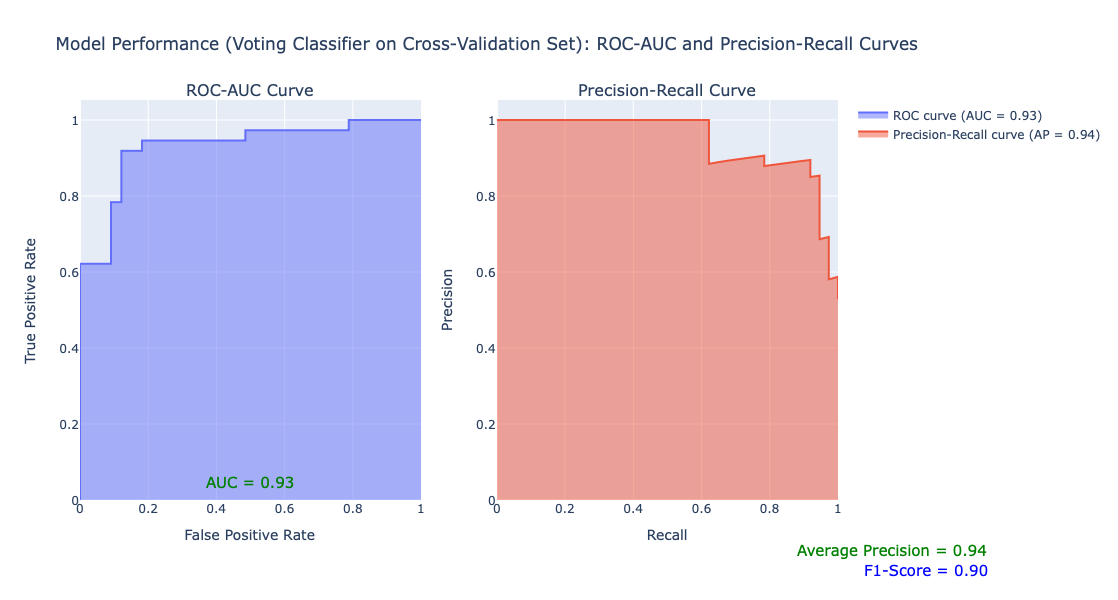

In [50]:
# Calculate metrics for ROC-AUC Curve
fpr, tpr, _ = roc_curve(y_cv, y_scores_vm_soft_cv)
roc_auc_val = auc(fpr, tpr)

# Calculate metrics for Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_cv, y_scores_vm_soft_cv)
pr_auc = average_precision_score(y_cv, y_scores_vm_soft_cv)
f1 = f1_score(y_cv, y_pred_final_vm_soft_cv)

# Create subplots
fig = make_subplots(
    rows=1, cols=2, subplot_titles=("ROC-AUC Curve", "Precision-Recall Curve")
)

# Add ROC-AUC Curve to the subplot
fig.add_trace(
    go.Scatter(
        x=fpr,
        y=tpr,
        mode="lines",
        name=f"ROC curve (AUC = {roc_auc_val:.2f})",
        fill="tozeroy",
    ),
    row=1,
    col=1,
)
fig.add_annotation(
    x=0.5,
    y=0.05,
    xref="paper",
    yref="paper",
    text=f"AUC = {roc_auc_val:.2f}",
    showarrow=False,
    font=dict(size=15, color="green"),
    row=1,
    col=1,
)

# Add Precision-Recall Curve to the subplot
fig.add_trace(
    go.Scatter(
        x=recall,
        y=precision,
        mode="lines",
        name=f"Precision-Recall curve (AP = {pr_auc:.2f})",
        fill="tozeroy",
    ),
    row=1,
    col=2,
)
fig.add_annotation(
    x=1.2,
    y=-0.15,
    xref="paper",
    yref="paper",
    text=f"Average Precision = {pr_auc:.2f}",
    showarrow=False,
    font=dict(size=15, color="green"),
)
fig.add_annotation(
    x=1.2,
    y=-0.20,
    xref="paper",
    yref="paper",
    text=f"F1-Score = {f1:.2f}",
    showarrow=False,
    font=dict(size=15, color="blue"),
)

# Update layout
fig.update_layout(
    title_text="Model Performance (Voting Classifier on Cross-Validation Set): ROC-AUC and Precision-Recall Curves",
    width=1200,
    height=600,
)
fig.update_xaxes(title_text="False Positive Rate", row=1, col=1)
fig.update_yaxes(title_text="True Positive Rate", row=1, col=1)
fig.update_xaxes(title_text="Recall", row=1, col=2)
fig.update_yaxes(title_text="Precision", row=1, col=2)
fig.update_layout(
    margin=dict(b=100)
)  # Adjust bottom margin to avoid cutting off annotations

# Save plot
#fig.write_image("./charts/Ensemble_Models/Model Performance (Voting Classifier on Cross-Validation Set): ROC-AUC and Precision-Recall Curves.png") #png format
#fig.write_image("./charts/Ensemble_Models/Model Performance (Voting Classifier on Cross-Validation Set): ROC-AUC and Precision-Recall Curves.svg") #svg format

# Display the plots side-by-side
fig.show()

##### Testing Set

In [51]:
with mlflow.start_run() as run:

    # Making the final model using a voting classifier with soft voting
    vote_model_soft = VotingClassifier(
        estimators=[
            ("logistic regression", lr_clf),
            ("svc", svm_model),  # Make sure svm_model is trained with probabilities
            ("knn", knn_model),
            ("decision tree", dt_clf),
        ],
        voting="soft",
    )

    # Training the model on the training dataset
    vote_model_soft.fit(X_train, y_train)

    # Predicting the output on the test dataset
    y_pred_final_vm_soft = vote_model_soft.predict(X_test)
    # Get probabilities for the positive class for AUC calculation
    y_scores_vm_soft = vote_model_soft.predict_proba(X_test)[:, 1]

    # Metrics calculation
    accuracy = accuracy_score(y_test, y_pred_final_vm_soft)
    cm = confusion_matrix(y_test, y_pred_final_vm_soft)
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    # False Positive Rate (FPR)
    FPR = FP / (FP + TN)

    precision = precision_score(y_test, y_pred_final_vm_soft)
    f1 = f1_score(y_test, y_pred_final_vm_soft)
    roc_auc = roc_auc_score(y_test, y_scores_vm_soft)
    fpr, tpr, _ = roc_curve(y_test, y_scores_vm_soft)

    ensemble_df = ensemble_df._append(
        {
            "Ensemble Model": "Voting Classifier (Soft)",
            "Accuracy": accuracy,
            "Sensitivity": sensitivity,
            "Specificity": specificity,
            "False Positive Rate": FPR,
            "AUC Score": roc_auc,
            "F1-Score": f1,
            "Precision": precision,
        },
        ignore_index=True,
    )

    # Evaluate the model on the test set
    print("Voting Classifier Model (Soft Voting)")
    print(classification_report(y_test, y_pred_final_vm_soft))
    print("")
    print("Confusion Matrix: ")
    print(cm)

    # Log the model parameters and metrics to MLflow
    mlflow.sklearn.log_model(vote_model_soft, "Voting Classifier Model (Soft Voting) CV")
    print("Run ID: {}".format(run.info.run_id))

    mlflow.log_params(vote_model_soft.get_params())
    mlflow.log_metrics(
        {
            "Accuracy": accuracy,
            "Sensitivity": sensitivity,
            "Specificity": specificity,
            "False Positive Rate": FPR,
            "AUC Score": roc_auc,
            "F1-Score": f1,
            "Precision": precision
        }
    )

    # Save the model to MLflow
    #shutil.rmtree("Voting Classifier Model (Soft Voting) CV",  ignore_errors=True)
    #mlflow.sklearn.save_model(vote_model_soft, "Voting Classifier Model (Soft Voting) CV")

    signature = infer_signature(X_test, y_pred_final_vm_soft)

    # Log the sklearn model and register as version 1
    mlflow.sklearn.log_model(
        sk_model=vote_model_soft,
        artifact_path="sklearn-model",
        signature=signature,
        registered_model_name="sk-learn-voting-clf-cv-model",
    )

Voting Classifier Model (Soft Voting)
              precision    recall  f1-score   support

           0       0.91      0.60      0.72        35
           1       0.70      0.94      0.80        35

    accuracy                           0.77        70
   macro avg       0.81      0.77      0.76        70
weighted avg       0.81      0.77      0.76        70


Confusion Matrix: 
[[21 14]
 [ 2 33]]
Run ID: b0532fa8bcb848a6b0dd75f58a5e5e5f


Registered model 'sk-learn-voting-clf-cv-model' already exists. Creating a new version of this model...
2024/04/13 12:34:32 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-voting-clf-cv-model, version 3
Created version '3' of model 'sk-learn-voting-clf-cv-model'.


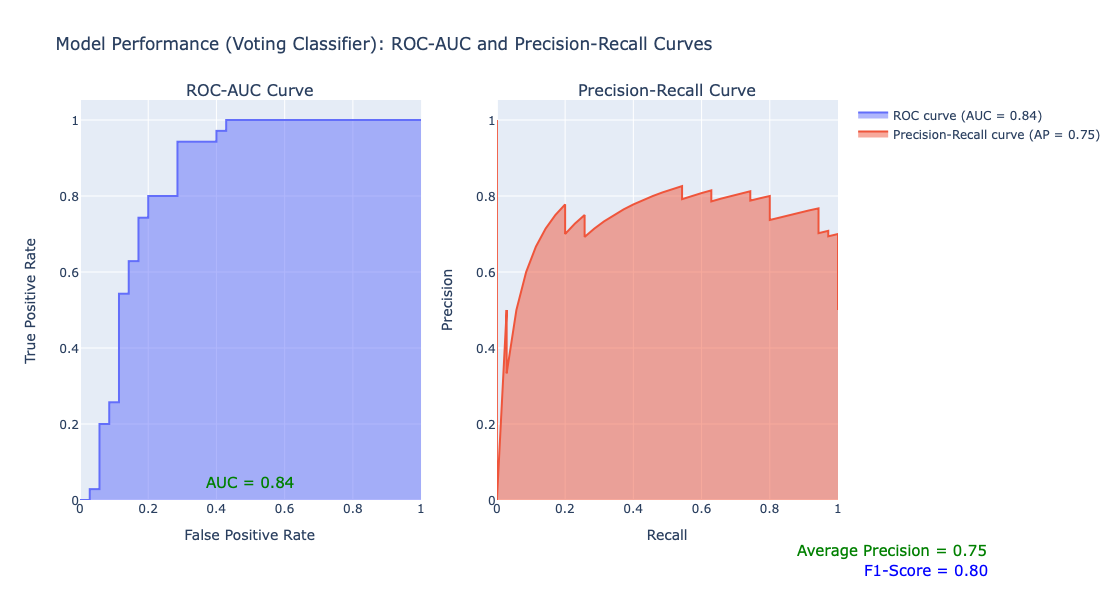

In [52]:
# Calculate metrics for ROC-AUC Curve
fpr, tpr, _ = roc_curve(y_test, y_scores_vm_soft)
roc_auc_val = auc(fpr, tpr)

# Calculate metrics for Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_scores_vm_soft)
pr_auc = average_precision_score(y_test, y_scores_vm_soft)
f1 = f1_score(y_test, y_pred_final_vm_soft)

# Create subplots
fig = make_subplots(
    rows=1, cols=2, subplot_titles=("ROC-AUC Curve", "Precision-Recall Curve")
)

# Add ROC-AUC Curve to the subplot
fig.add_trace(
    go.Scatter(
        x=fpr,
        y=tpr,
        mode="lines",
        name=f"ROC curve (AUC = {roc_auc_val:.2f})",
        fill="tozeroy",
    ),
    row=1,
    col=1,
)
fig.add_annotation(
    x=0.5,
    y=0.05,
    xref="paper",
    yref="paper",
    text=f"AUC = {roc_auc_val:.2f}",
    showarrow=False,
    font=dict(size=15, color="green"),
    row=1,
    col=1,
)

# Add Precision-Recall Curve to the subplot
fig.add_trace(
    go.Scatter(
        x=recall,
        y=precision,
        mode="lines",
        name=f"Precision-Recall curve (AP = {pr_auc:.2f})",
        fill="tozeroy",
    ),
    row=1,
    col=2,
)
fig.add_annotation(
    x=1.2,
    y=-0.15,
    xref="paper",
    yref="paper",
    text=f"Average Precision = {pr_auc:.2f}",
    showarrow=False,
    font=dict(size=15, color="green"),
)
fig.add_annotation(
    x=1.2,
    y=-0.20,
    xref="paper",
    yref="paper",
    text=f"F1-Score = {f1:.2f}",
    showarrow=False,
    font=dict(size=15, color="blue"),
)

# Update layout
fig.update_layout(
    title_text="Model Performance (Voting Classifier): ROC-AUC and Precision-Recall Curves",
    width=1200,
    height=600,
)
fig.update_xaxes(title_text="False Positive Rate", row=1, col=1)
fig.update_yaxes(title_text="True Positive Rate", row=1, col=1)
fig.update_xaxes(title_text="Recall", row=1, col=2)
fig.update_yaxes(title_text="Precision", row=1, col=2)
fig.update_layout(
    margin=dict(b=100)
)  # Adjust bottom margin to avoid cutting off annotations

# Save plot
#fig.write_image("./charts/Ensemble_Models/Model Performance (Voting Classifier): ROC-AUC and Precision-Recall Curves.png") #png format
#fig.write_image("./charts/Ensemble_Models/Model Performance (Voting Classifier): ROC-AUC and Precision-Recall Curves.svg") #svg format

# Display the plots side-by-side
fig.show()

#### Bagging Classifier

##### Cross-Validation Set

In [53]:
with mlflow.start_run() as run:

    # Initializing the bagging model using SVM as the base model with default parameters
    bag_model_cv = BaggingClassifier(
        svm_model, random_state=42, n_estimators=10
    )

    # Training the model
    bag_model_cv.fit(X_train, y_train)

    # Predicting the output on the test dataset
    y_pred_bm_cv = bag_model_cv.predict(X_cv)

    # Calculate metrics
    accuracy = accuracy_score(y_cv, y_pred_bm_cv)
    cm = confusion_matrix(y_cv, y_pred_bm_cv)
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    sensitivity = TP / (TP + FN)  # Recall
    specificity = TN / (TN + FP)
    # False Positive Rate (FPR)
    FPR = FP / (FP + TN)

    precision = precision_score(y_cv, y_pred_bm_cv)
    f1 = f1_score(y_cv, y_pred_bm_cv)

    # Attempt to calculate the ROC AUC Score if probabilities can be estimated
    try:
        y_scores_bm_cv = bag_model_cv.predict_proba(X_cv)[:, 1]
        roc_auc = roc_auc_score(y_cv, y_scores_bm_cv)
    except AttributeError as e:
        roc_auc = 0.00
        print(
            "ROC AUC Score is not applicable for this configuration without predict_proba:",
            e,
        )

    # Update ensemble_df DataFrame
    ensemble_df = ensemble_df._append(
        {
            "Ensemble Model": "Bagging Classifier with SVM CV",
            "Accuracy": accuracy,
            "Sensitivity": sensitivity,
            "Specificity": specificity,
            "False Positive Rate": FPR,
            "AUC Score": roc_auc,
            "F1-Score": f1,
            "Precision": precision,
        },
        ignore_index=True,
    )

    # Evaluate the model on the validation set
    print("Bagging Classifier with SVM CV: ")
    print(classification_report(y_cv, y_pred_bm_cv))
    print("Confusion Matrix: ")
    print(cm)

    # Log the model parameters and metrics to MLflow
    mlflow.sklearn.log_model(bag_model_cv, "Bagging Classifier with SVM CV")
    print("Run ID: {}".format(run.info.run_id))

    mlflow.log_params(bag_model_cv.get_params())
    mlflow.log_metrics(
        {
            "Accuracy": accuracy,
            "Sensitivity": sensitivity,
            "Specificity": specificity,
            "False Positive Rate": FPR,
            "AUC Score": roc_auc,
            "F1-Score": f1,
            "Precision": precision
        }
    )

    # Save the model to MLflow
    #shutil.rmtree("Bagging Classifier with SVM CV", ignore_errors=True)
    #mlflow.sklearn.save_model(bag_model_cv, "Bagging Classifier with SVM CV")

    signature = infer_signature(X_cv, y_pred_bm_cv)

    # Log the sklearn model and register as version 1
    mlflow.sklearn.log_model(
        sk_model=bag_model_cv,
        artifact_path="sklearn-model",
        signature=signature,
        registered_model_name="sk-learn-bagging-clf-cv-model",
    )

Bagging Classifier with SVM CV: 
              precision    recall  f1-score   support

           0       0.92      0.70      0.79        33
           1       0.78      0.95      0.85        37

    accuracy                           0.83        70
   macro avg       0.85      0.82      0.82        70
weighted avg       0.84      0.83      0.83        70

Confusion Matrix: 
[[23 10]
 [ 2 35]]
Run ID: 18344636d4484cbbb0820847971ad8d6


Registered model 'sk-learn-bagging-clf-cv-model' already exists. Creating a new version of this model...
2024/04/13 12:35:16 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-bagging-clf-cv-model, version 2
Created version '2' of model 'sk-learn-bagging-clf-cv-model'.


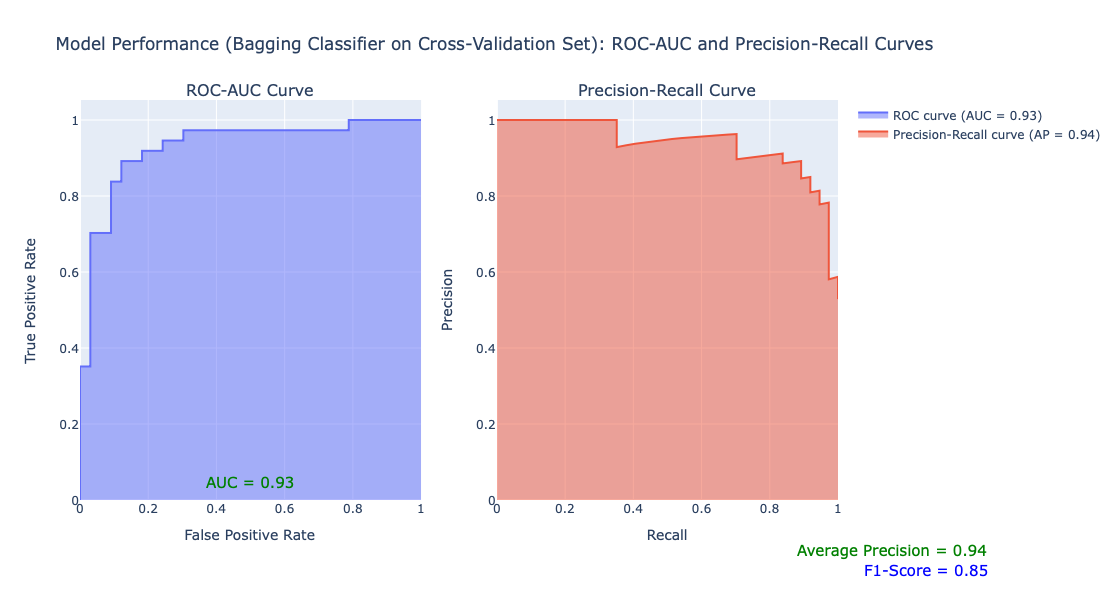

In [54]:
# Calculate metrics for ROC-AUC Curve
fpr, tpr, _ = roc_curve(y_cv, y_scores_bm_cv)
roc_auc_val = auc(fpr, tpr)

# Calculate metrics for Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_cv, y_scores_bm_cv)
pr_auc = average_precision_score(y_cv, y_scores_bm_cv)
f1 = f1_score(y_cv, y_pred_bm_cv)

# Create subplots
fig = make_subplots(
    rows=1, cols=2, subplot_titles=("ROC-AUC Curve", "Precision-Recall Curve")
)

# Add ROC-AUC Curve to the subplot
fig.add_trace(
    go.Scatter(
        x=fpr,
        y=tpr,
        mode="lines",
        name=f"ROC curve (AUC = {roc_auc_val:.2f})",
        fill="tozeroy",
    ),
    row=1,
    col=1,
)
fig.add_annotation(
    x=0.5,
    y=0.05,
    xref="paper",
    yref="paper",
    text=f"AUC = {roc_auc_val:.2f}",
    showarrow=False,
    font=dict(size=15, color="green"),
    row=1,
    col=1,
)

# Add Precision-Recall Curve to the subplot
fig.add_trace(
    go.Scatter(
        x=recall,
        y=precision,
        mode="lines",
        name=f"Precision-Recall curve (AP = {pr_auc:.2f})",
        fill="tozeroy",
    ),
    row=1,
    col=2,
)
fig.add_annotation(
    x=1.2,
    y=-0.15,
    xref="paper",
    yref="paper",
    text=f"Average Precision = {pr_auc:.2f}",
    showarrow=False,
    font=dict(size=15, color="green"),
)
fig.add_annotation(
    x=1.2,
    y=-0.20,
    xref="paper",
    yref="paper",
    text=f"F1-Score = {f1:.2f}",
    showarrow=False,
    font=dict(size=15, color="blue"),
)

# Update layout
fig.update_layout(
    title_text="Model Performance (Bagging Classifier on Cross-Validation Set): ROC-AUC and Precision-Recall Curves",
    width=1200,
    height=600,
)
fig.update_xaxes(title_text="False Positive Rate", row=1, col=1)
fig.update_yaxes(title_text="True Positive Rate", row=1, col=1)
fig.update_xaxes(title_text="Recall", row=1, col=2)
fig.update_yaxes(title_text="Precision", row=1, col=2)
fig.update_layout(
    margin=dict(b=100)
)  # Adjust the bottom margin to avoid cutting off annotations

# Save plot
#fig.write_image("./charts/Ensemble_Models/Model Performance (Bagging Classifier on Cross-Validation Set): ROC-AUC and Precision-Recall Curves.png") #png format
#fig.write_image("./charts/Ensemble_Models/Model Performance (Bagging Classifier on Cross-Validation Set): ROC-AUC and Precision-Recall Curves.svg") #svg format

# Display the plots side-by-side
fig.show()

##### Testing Set

In [55]:
with mlflow.start_run() as run:

    # Initializing the bagging model using SVM as the base model with default parameters
    bag_model = BaggingClassifier(
        svm_model, random_state=42, n_estimators=10
    )

    # Training the model
    bag_model.fit(X_train, y_train)

    # Predicting the output on the test dataset
    y_pred_bm = bag_model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred_bm)
    cm = confusion_matrix(y_test, y_pred_bm)
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    sensitivity = TP / (TP + FN)  # Recall
    specificity = TN / (TN + FP)
    # False Positive Rate (FPR)
    FPR = FP / (FP + TN)

    precision = precision_score(y_test, y_pred_bm)
    f1 = f1_score(y_test, y_pred_bm)

    # Attempt to calculate the ROC AUC Score if probabilities can be estimated
    try:
        y_scores_bm = bag_model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_scores_bm)
    except AttributeError as e:
        roc_auc = 0.00
        print("ROC AUC Score is not applicable for this configuration without predict_proba:", e)

    # Update ensemble_df DataFrame
    ensemble_df = ensemble_df._append(
        {
            "Ensemble Model": "Bagging Classifier with SVM",
            "Accuracy": accuracy,
            "Sensitivity": sensitivity,
            "Specificity": specificity,
            "False Positive Rate": FPR,
            "AUC Score": roc_auc,
            "F1-Score": f1,
            "Precision": precision,
        },
        ignore_index=True,
    )

    # Evaluate the model on the test set
    print("Bagging Classifier with SVM: ")
    print(classification_report(y_test, y_pred_bm))
    print("Confusion Matrix: ")
    print(cm)

    # Log the model parameters and metrics to MLflow
    mlflow.sklearn.log_model(bag_model, "Bagging Classifier with SVM")
    print("Run ID: {}".format(run.info.run_id))

    mlflow.log_params(bag_model.get_params())
    mlflow.log_metrics(
        {
            "Accuracy": accuracy,
            "Sensitivity": sensitivity,
            "Specificity": specificity,
            "False Positive Rate": FPR,
            "AUC Score": roc_auc,
            "F1-Score": f1,
            "Precision": precision
        }
    )

    # Save the model to MLflow
    #shutil.rmtree("Bagging Classifier with SVM", ignore_errors=True)
    #mlflow.sklearn.save_model(bag_model, "Bagging Classifier with SVM")

    signature = infer_signature(X_cv, y_pred_bm)

    # Log the sklearn model and register as version 1
    mlflow.sklearn.log_model(
        sk_model=bag_model,
        artifact_path="sklearn-model",
        signature=signature,
        registered_model_name="sk-learn-logistic-reg-cv-model",
    )

Bagging Classifier with SVM: 
              precision    recall  f1-score   support

           0       0.91      0.57      0.70        35
           1       0.69      0.94      0.80        35

    accuracy                           0.76        70
   macro avg       0.80      0.76      0.75        70
weighted avg       0.80      0.76      0.75        70

Confusion Matrix: 
[[20 15]
 [ 2 33]]
Run ID: 9339b538e3ad4fcc9862a2e44f4c8753


Registered model 'sk-learn-logistic-reg-cv-model' already exists. Creating a new version of this model...
2024/04/13 12:36:01 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-logistic-reg-cv-model, version 5
Created version '5' of model 'sk-learn-logistic-reg-cv-model'.


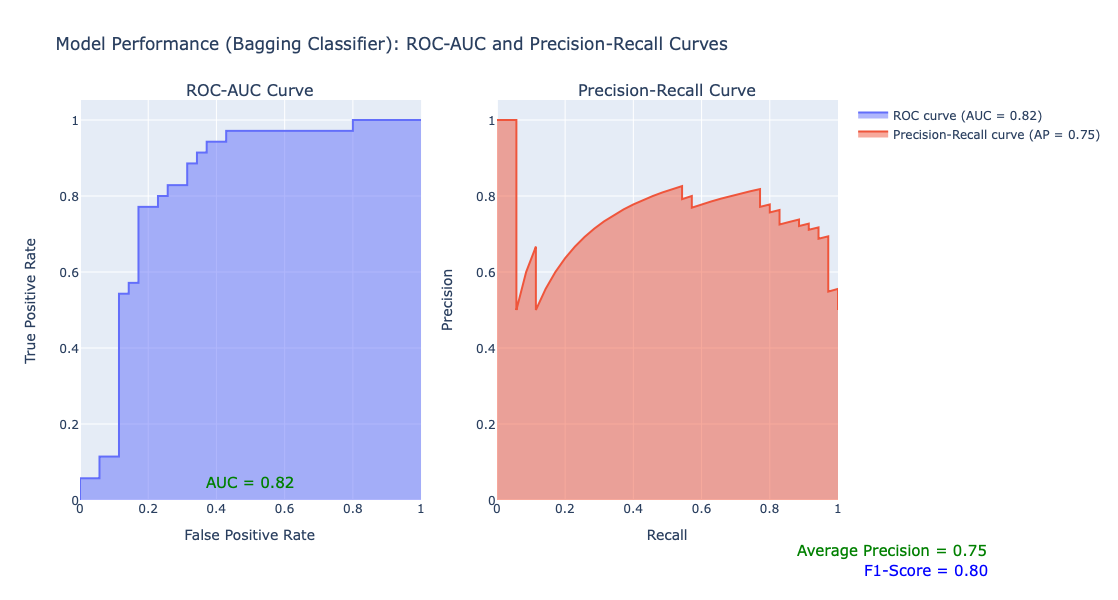

In [56]:
# Calculate metrics for ROC-AUC Curve
fpr, tpr, _ = roc_curve(y_test, y_scores_bm)
roc_auc_val = auc(fpr, tpr)

# Calculate metrics for Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_scores_bm)
pr_auc = average_precision_score(y_test, y_scores_bm)
f1 = f1_score(y_test, y_pred_bm)

# Create subplots
fig = make_subplots(
    rows=1, cols=2, subplot_titles=("ROC-AUC Curve", "Precision-Recall Curve")
)

# Add ROC-AUC Curve to the subplot
fig.add_trace(
    go.Scatter(
        x=fpr,
        y=tpr,
        mode="lines",
        name=f"ROC curve (AUC = {roc_auc_val:.2f})",
        fill="tozeroy",
    ),
    row=1,
    col=1,
)
fig.add_annotation(
    x=0.5,
    y=0.05,
    xref="paper",
    yref="paper",
    text=f"AUC = {roc_auc_val:.2f}",
    showarrow=False,
    font=dict(size=15, color="green"),
    row=1,
    col=1,
)

# Add Precision-Recall Curve to the subplot
fig.add_trace(
    go.Scatter(
        x=recall,
        y=precision,
        mode="lines",
        name=f"Precision-Recall curve (AP = {pr_auc:.2f})",
        fill="tozeroy",
    ),
    row=1,
    col=2,
)
fig.add_annotation(
    x=1.2,
    y=-0.15,
    xref="paper",
    yref="paper",
    text=f"Average Precision = {pr_auc:.2f}",
    showarrow=False,
    font=dict(size=15, color="green"),
)
fig.add_annotation(
    x=1.2,
    y=-0.20,
    xref="paper",
    yref="paper",
    text=f"F1-Score = {f1:.2f}",
    showarrow=False,
    font=dict(size=15, color="blue"),
)

# Update layout
fig.update_layout(
    title_text="Model Performance (Bagging Classifier): ROC-AUC and Precision-Recall Curves",
    width=1200,
    height=600,
)
fig.update_xaxes(title_text="False Positive Rate", row=1, col=1)
fig.update_yaxes(title_text="True Positive Rate", row=1, col=1)
fig.update_xaxes(title_text="Recall", row=1, col=2)
fig.update_yaxes(title_text="Precision", row=1, col=2)
fig.update_layout(
    margin=dict(b=100)
)  # Adjust the bottom margin to avoid cutting off annotations

# Save plot
#fig.write_image("./charts/Ensemble_Models/Model Performance (Bagging Classifier): ROC-AUC and Precision-Recall Curves.png") #png format
#fig.write_image("./charts/Ensemble_Models/Model Performance (Bagging Classifier): ROC-AUC and Precision-Recall Curves.svg") #svg format

# Display the plots side-by-side
fig.show()

#### GBM Classifier

##### Cross-Validation Set

In [57]:
with mlflow.start_run() as run:

    # Initializing the Gradient Boosting classifier with default parameters
    gb_model_cv = GradientBoostingClassifier()

    # Training the model on the training dataset
    gb_model_cv.fit(X_train, y_train)

    # Predicting the output on the test dataset
    y_pred_final_gb_cv = gb_model_cv.predict(X_cv)
    # Get probability scores for AUC calculation
    y_scores_gb_cv = gb_model_cv.predict_proba(X_cv)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_cv, y_pred_final_gb_cv)
    cm = confusion_matrix(y_cv, y_pred_final_gb_cv)
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    sensitivity = TP / (TP + FN)  # Recall
    specificity = TN / (TN + FP)
    # False Positive Rate (FPR)
    FPR = FP / (FP + TN)

    precision = precision_score(y_cv, y_pred_final_gb_cv)
    f1 = f1_score(y_cv, y_pred_final_gb_cv)
    roc_auc = roc_auc_score(y_cv, y_scores_gb_cv)  # Use probability scores for AUC

    # Update ensemble_df DataFrame with new metrics
    ensemble_df = ensemble_df._append(
        {
            "Ensemble Model": "Gradient Boosting Classifier CV",
            "Accuracy": accuracy,
            "Sensitivity": sensitivity,
            "Specificity": specificity,
            "False Positive Rate": FPR,
            "AUC Score": roc_auc,
            "F1-Score": f1,
            "Precision": precision,
        },
        ignore_index=True,
    )

    # Evaluate the model on the validation set
    print("Gradient Boosting Classifier CV: ")
    print(classification_report(y_cv, y_pred_final_gb_cv))
    print("Confusion Matrix: ")
    print(cm)

    # Log the model parameters and metrics to MLflow
    mlflow.sklearn.log_model(gb_model_cv, "Gradient Boosting Classifier CV")
    print("Run ID: {}".format(run.info.run_id))

    mlflow.log_params(gb_model_cv.get_params())
    mlflow.log_metrics(
        {
            "Accuracy": accuracy,
            "Sensitivity": sensitivity,
            "Specificity": specificity,
            "False Positive Rate": FPR,
            "AUC Score": roc_auc,
            "F1-Score": f1,
            "Precision": precision
        }
    )

    # Save the model to MLflow
    #shutil.rmtree("Stacking Ensemble Models CV", ignore_errors=True)
    #mlflow.sklearn.save_model(gb_model_cv, "Stacking Ensemble Models CV")

    signature = infer_signature(X_cv, y_pred_final_gb_cv)

    # Log the sklearn model and register as version 1
    mlflow.sklearn.log_model(
        sk_model=gb_model_cv,
        artifact_path="sklearn-model",
        signature=signature,
        registered_model_name="sk-learn-gbm-clf-cv-model",
    )

Gradient Boosting Classifier CV: 
              precision    recall  f1-score   support

           0       0.93      0.79      0.85        33
           1       0.83      0.95      0.89        37

    accuracy                           0.87        70
   macro avg       0.88      0.87      0.87        70
weighted avg       0.88      0.87      0.87        70

Confusion Matrix: 
[[26  7]
 [ 2 35]]
Run ID: 5e9e83ad5c0843cd86e01ed46cd066d4


Registered model 'sk-learn-gbm-clf-cv-model' already exists. Creating a new version of this model...
2024/04/13 12:36:10 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-gbm-clf-cv-model, version 2
Created version '2' of model 'sk-learn-gbm-clf-cv-model'.


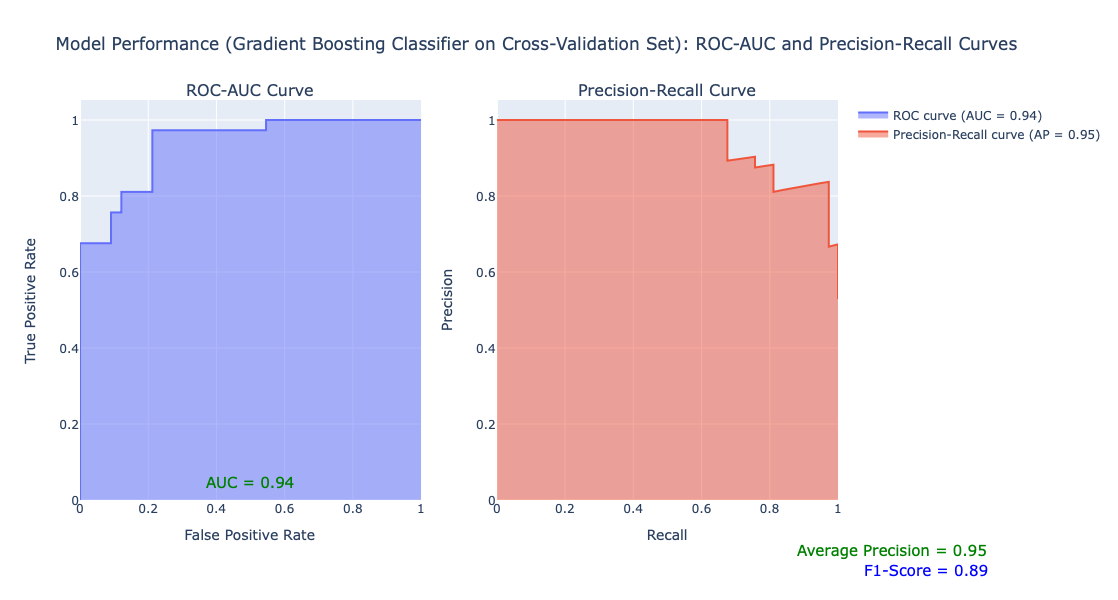

In [58]:
# Calculate metrics for ROC-AUC Curve
fpr, tpr, _ = roc_curve(y_cv, y_scores_gb_cv)
roc_auc_val = auc(fpr, tpr)

# Calculate metrics for Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_cv, y_scores_gb_cv)
pr_auc = average_precision_score(y_cv, y_scores_gb_cv)
f1 = f1_score(y_cv, y_pred_final_gb_cv)

# Create subplots
fig = make_subplots(
    rows=1, cols=2, subplot_titles=("ROC-AUC Curve", "Precision-Recall Curve")
)

# Add ROC-AUC Curve to the subplot
fig.add_trace(
    go.Scatter(
        x=fpr,
        y=tpr,
        mode="lines",
        name=f"ROC curve (AUC = {roc_auc_val:.2f})",
        fill="tozeroy",
    ),
    row=1,
    col=1,
)
fig.add_annotation(
    x=0.5,
    y=0.05,
    xref="paper",
    yref="paper",
    text=f"AUC = {roc_auc_val:.2f}",
    showarrow=False,
    font=dict(size=15, color="green"),
    row=1,
    col=1,
)

# Add Precision-Recall Curve to the subplot
fig.add_trace(
    go.Scatter(
        x=recall,
        y=precision,
        mode="lines",
        name=f"Precision-Recall curve (AP = {pr_auc:.2f})",
        fill="tozeroy",
    ),
    row=1,
    col=2,
)
fig.add_annotation(
    x=1.2,
    y=-0.15,
    xref="paper",
    yref="paper",
    text=f"Average Precision = {pr_auc:.2f}",
    showarrow=False,
    font=dict(size=15, color="green"),
)
fig.add_annotation(
    x=1.2,
    y=-0.20,
    xref="paper",
    yref="paper",
    text=f"F1-Score = {f1:.2f}",
    showarrow=False,
    font=dict(size=15, color="blue"),
)

# Update layout
fig.update_layout(
    title_text="Model Performance (Gradient Boosting Classifier on Cross-Validation Set): ROC-AUC and Precision-Recall Curves",
    width=1200,
    height=600,
)
fig.update_xaxes(title_text="False Positive Rate", row=1, col=1)
fig.update_yaxes(title_text="True Positive Rate", row=1, col=1)
fig.update_xaxes(title_text="Recall", row=1, col=2)
fig.update_yaxes(title_text="Precision", row=1, col=2)
fig.update_layout(
    margin=dict(b=100)
)  # Adjust the bottom margin to avoid cutting off annotations

# Save plot
#fig.write_image("./charts/Ensemble_Models/Model Performance (Gradient Boosting Classifier on Cross-Validation Set): ROC-AUC and Precision-Recall Curves.png") #png format
#fig.write_image("./charts/Ensemble_Models/Model Performance (Gradient Boosting Classifier on Cross-Validation Set): ROC-AUC and Precision-Recall Curves.svg") #svg format

# Display the plots side-by-side
fig.show()

##### Testing Set

In [59]:
with mlflow.start_run() as run:

    # Initializing the Gradient Boosting classifier with default parameters
    gb_model = GradientBoostingClassifier()

    # Training the model on the training dataset
    gb_model.fit(X_train, y_train)

    # Predicting the output on the test dataset
    y_pred_final_gb = gb_model.predict(X_test)
    # Get probability scores for AUC calculation
    y_scores_gb = gb_model.predict_proba(X_test)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred_final_gb)
    cm = confusion_matrix(y_test, y_pred_final_gb)
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    sensitivity = TP / (TP + FN)  # Recall
    specificity = TN / (TN + FP)
    # False Positive Rate (FPR)
    FPR = FP / (FP + TN)

    precision = precision_score(y_test, y_pred_final_gb)
    f1 = f1_score(y_test, y_pred_final_gb)
    roc_auc = roc_auc_score(y_test, y_scores_gb)  # Use probability scores for AUC

    # Update ensemble_df DataFrame with new metrics
    ensemble_df = ensemble_df._append(
        {
            "Ensemble Model": "Gradient Boosting Classifier",
            "Accuracy": accuracy,
            "Sensitivity": sensitivity,
            "Specificity": specificity,
            "False Positive Rate": FPR,
            "AUC Score": roc_auc,
            "F1-Score": f1,
            "Precision": precision,
        },
        ignore_index=True,
    )

    # Evaluate the model on the test set
    print("Gradient Boosting Classifier: ")
    print(classification_report(y_test, y_pred_final_gb))
    print("Confusion Matrix: ")
    print(cm)

    # Log the model parameters and metrics to MLflow
    mlflow.sklearn.log_model(gb_model, "Gradient Boosting Classifier")
    print("Run ID: {}".format(run.info.run_id))

    mlflow.log_params(gb_model.get_params())
    mlflow.log_metrics(
        {
            "Accuracy": accuracy,
            "Sensitivity": sensitivity,
            "Specificity": specificity,
            "False Positive Rate": FPR,
            "AUC Score": roc_auc,
            "F1-Score": f1,
            "Precision": precision
        }
    )

    # Save the model to MLflow
    #shutil.rmtree("Gradient Boosting Classifier", ignore_errors=True)
    #mlflow.sklearn.save_model(gb_model, "Gradient Boosting Classifier")

    signature = infer_signature(X_cv, y_pred_final_gb)

    # Log the sklearn model and register as version 1
    mlflow.sklearn.log_model(
        sk_model=gb_model,
        artifact_path="sklearn-model",
        signature=signature,
        registered_model_name="sk-learn-gbm-clf-model",
    )

Gradient Boosting Classifier: 
              precision    recall  f1-score   support

           0       0.89      0.69      0.77        35
           1       0.74      0.91      0.82        35

    accuracy                           0.80        70
   macro avg       0.82      0.80      0.80        70
weighted avg       0.82      0.80      0.80        70

Confusion Matrix: 
[[24 11]
 [ 3 32]]
Run ID: a0f2919518334aa887fc73db51fcec6e


Registered model 'sk-learn-gbm-clf-model' already exists. Creating a new version of this model...
2024/04/13 12:36:20 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-gbm-clf-model, version 2
Created version '2' of model 'sk-learn-gbm-clf-model'.


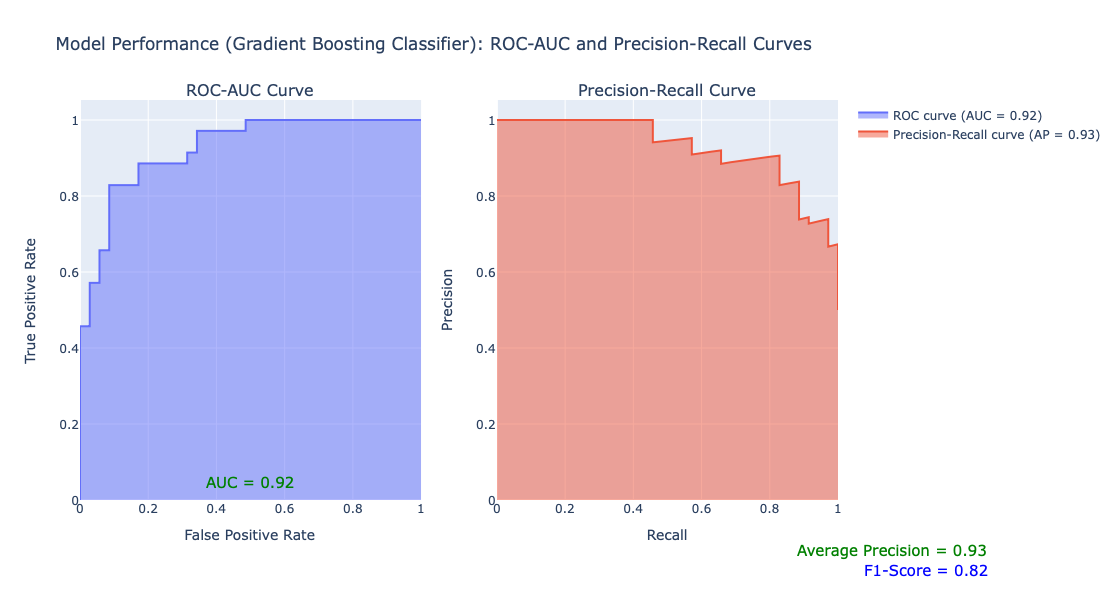

In [60]:
# Calculate metrics for ROC-AUC Curve
fpr, tpr, _ = roc_curve(y_test, y_scores_gb)
roc_auc_val = auc(fpr, tpr)

# Calculate metrics for Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_scores_gb)
pr_auc = average_precision_score(y_test, y_scores_gb)
f1 = f1_score(y_test, y_pred_final_gb)

# Create subplots
fig = make_subplots(
    rows=1, cols=2, subplot_titles=("ROC-AUC Curve", "Precision-Recall Curve")
)

# Add ROC-AUC Curve to the subplot
fig.add_trace(
    go.Scatter(
        x=fpr,
        y=tpr,
        mode="lines",
        name=f"ROC curve (AUC = {roc_auc_val:.2f})",
        fill="tozeroy",
    ),
    row=1,
    col=1,
)
fig.add_annotation(
    x=0.5,
    y=0.05,
    xref="paper",
    yref="paper",
    text=f"AUC = {roc_auc_val:.2f}",
    showarrow=False,
    font=dict(size=15, color="green"),
    row=1,
    col=1,
)

# Add Precision-Recall Curve to the subplot
fig.add_trace(
    go.Scatter(
        x=recall,
        y=precision,
        mode="lines",
        name=f"Precision-Recall curve (AP = {pr_auc:.2f})",
        fill="tozeroy",
    ),
    row=1,
    col=2,
)
fig.add_annotation(
    x=1.2,
    y=-0.15,
    xref="paper",
    yref="paper",
    text=f"Average Precision = {pr_auc:.2f}",
    showarrow=False,
    font=dict(size=15, color="green"),
)
fig.add_annotation(
    x=1.2,
    y=-0.20,
    xref="paper",
    yref="paper",
    text=f"F1-Score = {f1:.2f}",
    showarrow=False,
    font=dict(size=15, color="blue"),
)

# Update layout
fig.update_layout(
    title_text="Model Performance (Gradient Boosting Classifier): ROC-AUC and Precision-Recall Curves",
    width=1200,
    height=600,
)
fig.update_xaxes(title_text="False Positive Rate", row=1, col=1)
fig.update_yaxes(title_text="True Positive Rate", row=1, col=1)
fig.update_xaxes(title_text="Recall", row=1, col=2)
fig.update_yaxes(title_text="Precision", row=1, col=2)
fig.update_layout(
    margin=dict(b=100)
)  # Adjust the bottom margin to avoid cutting off annotations

# Save plot
#fig.write_image("./charts/Ensemble_Models/Model Performance (Gradient Boosting Classifier): ROC-AUC and Precision-Recall Curves.png") #png format
#fig.write_image("./charts/Ensemble_Models/Model Performance (Gradient Boosting Classifier): ROC-AUC and Precision-Recall Curves.svg") #svg format

# Display the plots side-by-side
fig.show()

#### XGBoost Classifier

##### Cross-Validation Set

In [61]:
with mlflow.start_run() as run:

    # Initializing the XGBoost classifier with default parameters
    xgb_model_cv = XGBClassifier(use_label_encoder=False, eval_metric="logloss")

    # Training the model on the train dataset
    xgb_model_cv.fit(X_train, y_train)

    # Predicting the output on the test dataset
    y_pred_final_xgb_cv = xgb_model_cv.predict(X_cv)
    # Get probability scores for AUC calculation
    y_scores_xgb_cv = xgb_model_cv.predict_proba(X_cv)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_cv, y_pred_final_xgb_cv)
    cm = confusion_matrix(y_cv, y_pred_final_xgb_cv)
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    sensitivity = TP / (TP + FN)  # Recall
    specificity = TN / (TN + FP)
    # False Positive Rate (FPR)
    FPR = FP / (FP + TN)

    precision = precision_score(y_cv, y_pred_final_xgb_cv)
    f1 = f1_score(y_cv, y_pred_final_xgb_cv)
    roc_auc = roc_auc_score(y_cv, y_scores_xgb_cv)  # Use probability scores for AUC

    # Update ensemble_df DataFrame
    ensemble_df = ensemble_df._append(
        {
            "Ensemble Model": "XGBoost Classifier CV",
            "Accuracy": accuracy,
            "Sensitivity": sensitivity,
            "Specificity": specificity,
            "False Positive Rate": FPR,
            "AUC Score": roc_auc,
            "F1-Score": f1,
            "Precision": precision,
        },
        ignore_index=True,
    )

    # Evaluate the model on the validation set
    print("XGBoost Classifier CV: ")
    print(classification_report(y_cv, y_pred_final_xgb_cv))
    print("Confusion Matrix: ")
    print(cm)

    # Log the model parameters and metrics to MLflow
    mlflow.sklearn.log_model(xgb_model_cv, "XGBoost Classifier CV")
    print("Run ID: {}".format(run.info.run_id))

    mlflow.log_params(xgb_model_cv.get_params())
    mlflow.log_metrics(
        {
            "Accuracy": accuracy,
            "Sensitivity": sensitivity,
            "Specificity": specificity,
            "False Positive Rate": FPR,
            "AUC Score": roc_auc,
            "F1-Score": f1,
            "Precision": precision
        }
    )

    # Save the model to MLflow
    #shutil.rmtree("XGBoost Classifier CV", ignore_errors=True)
    #mlflow.xgboost.save_model(xgb_model_cv, "XGBoost Classifier CV")

    signature = infer_signature(X_cv, y_pred_final_xgb_cv)

    # Log the sklearn model and register as version 1
    mlflow.xgboost.log_model(
        xgb_model=xgb_model_cv,
        artifact_path="xgboost-model",
        signature=signature,
        registered_model_name="xgboost-clf-cv-model",
    )

XGBoost Classifier CV: 
              precision    recall  f1-score   support

           0       0.93      0.79      0.85        33
           1       0.83      0.95      0.89        37

    accuracy                           0.87        70
   macro avg       0.88      0.87      0.87        70
weighted avg       0.88      0.87      0.87        70

Confusion Matrix: 
[[26  7]
 [ 2 35]]
Run ID: 45f138d0c675454da4117a1da2cb597c


Registered model 'xgboost-clf-cv-model' already exists. Creating a new version of this model...
2024/04/13 12:36:29 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: xgboost-clf-cv-model, version 2
Created version '2' of model 'xgboost-clf-cv-model'.


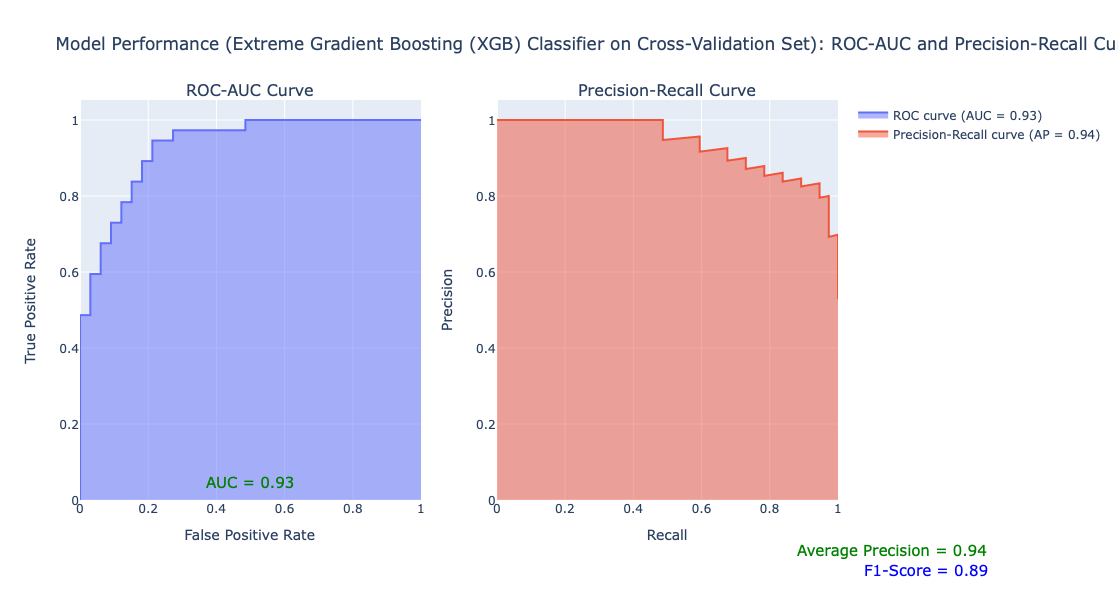

In [62]:
# Calculate metrics for ROC-AUC Curve
fpr, tpr, _ = roc_curve(y_cv, y_scores_xgb_cv)
roc_auc_val = auc(fpr, tpr)

# Calculate metrics for Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_cv, y_scores_xgb_cv)
pr_auc = average_precision_score(y_cv, y_scores_xgb_cv)
f1 = f1_score(y_cv, y_pred_final_xgb_cv)

# Create subplots
fig = make_subplots(
    rows=1, cols=2, subplot_titles=("ROC-AUC Curve", "Precision-Recall Curve")
)

# Add ROC-AUC Curve to the subplot
fig.add_trace(
    go.Scatter(
        x=fpr,
        y=tpr,
        mode="lines",
        name=f"ROC curve (AUC = {roc_auc_val:.2f})",
        fill="tozeroy",
    ),
    row=1,
    col=1,
)
fig.add_annotation(
    x=0.5,
    y=0.05,
    xref="paper",
    yref="paper",
    text=f"AUC = {roc_auc_val:.2f}",
    showarrow=False,
    font=dict(size=15, color="green"),
    row=1,
    col=1,
)

# Add Precision-Recall Curve to the subplot
fig.add_trace(
    go.Scatter(
        x=recall,
        y=precision,
        mode="lines",
        name=f"Precision-Recall curve (AP = {pr_auc:.2f})",
        fill="tozeroy",
    ),
    row=1,
    col=2,
)
fig.add_annotation(
    x=1.2,
    y=-0.15,
    xref="paper",
    yref="paper",
    text=f"Average Precision = {pr_auc:.2f}",
    showarrow=False,
    font=dict(size=15, color="green"),
)
fig.add_annotation(
    x=1.2,
    y=-0.20,
    xref="paper",
    yref="paper",
    text=f"F1-Score = {f1:.2f}",
    showarrow=False,
    font=dict(size=15, color="blue"),
)

# Update layout
fig.update_layout(
    title_text="Model Performance (Extreme Gradient Boosting (XGB) Classifier on Cross-Validation Set): ROC-AUC and Precision-Recall Curves",
    width=1200,
    height=600,
)
fig.update_xaxes(title_text="False Positive Rate", row=1, col=1)
fig.update_yaxes(title_text="True Positive Rate", row=1, col=1)
fig.update_xaxes(title_text="Recall", row=1, col=2)
fig.update_yaxes(title_text="Precision", row=1, col=2)
fig.update_layout(
    margin=dict(b=100)
)  # Adjust the bottom margin to avoid cutting off annotations

# Save plot
#fig.write_image("./charts/Ensemble_Models/Model Performance (Extreme Gradient Boosting (XGB) Classifier on Cross-Validation Set): ROC-AUC and Precision-Recall Curves.png") #png format
#fig.write_image("./charts/Ensemble_Models/Model Performance (Extreme Gradient Boosting (XGB) Classifier on Cross-Validation Set): ROC-AUC and Precision-Recall Curves.svg") #svg format

# Display the plots side-by-side
fig.show()

##### Testing Set

In [63]:
with mlflow.start_run() as run:

    # Initializing the XGBoost classifier with default parameters
    xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

    # Training the model on the train dataset
    xgb_model.fit(X_train, y_train)

    # Predicting the output on the test dataset
    y_pred_final_xgb = xgb_model.predict(X_test)
    # Get probability scores for AUC calculation
    y_scores_xgb = xgb_model.predict_proba(X_test)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred_final_xgb)
    cm = confusion_matrix(y_test, y_pred_final_xgb)
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    sensitivity = TP / (TP + FN)  # Recall
    specificity = TN / (TN + FP)
    # False Positive Rate (FPR)
    FPR = FP / (FP + TN)

    precision = precision_score(y_test, y_pred_final_xgb)
    f1 = f1_score(y_test, y_pred_final_xgb)
    roc_auc = roc_auc_score(y_test, y_scores_xgb)  # Use probability scores for AUC

    # Update ensemble_df DataFrame
    ensemble_df = ensemble_df._append(
        {
            "Ensemble Model": "XGBoost Classifier",
            "Accuracy": accuracy,
            "Sensitivity": sensitivity,
            "Specificity": specificity,
            "False Positive Rate": FPR,
            "AUC Score": roc_auc,
            "F1-Score": f1,
            "Precision": precision,
        },
        ignore_index=True,
    )

    # Evaluate the model on the test set
    print("XGBoost Classifier: ")
    print(classification_report(y_test, y_pred_final_xgb))
    print("Confusion Matrix: ")
    print(cm)

    # Log the model parameters and metrics to MLflow
    mlflow.sklearn.log_model(xgb_model, "XGBoost Classifier")
    print("Run ID: {}".format(run.info.run_id))

    mlflow.log_params(xgb_model.get_params())
    mlflow.log_metrics(
        {
            "Accuracy": accuracy,
            "Sensitivity": sensitivity,
            "Specificity": specificity,
            "False Positive Rate": FPR,
            "AUC Score": roc_auc,
            "F1-Score": f1,
            "Precision": precision
        }
    )
    # Save the model to MLflow
    #shutil.rmtree("XGBoost Classifier", ignore_errors=True)
    #mlflow.xgboost.save_model(xgb_model, "XGBoost Classifier")

    signature = infer_signature(X_cv, y_pred_final_xgb)

    # Log the sklearn model and register as version 1
    mlflow.xgboost.log_model(
        xgb_model=xgb_model,
        artifact_path="xgboost-model",
        signature=signature,
        registered_model_name="xgboost-clf-model",
    )

XGBoost Classifier: 
              precision    recall  f1-score   support

           0       0.87      0.77      0.82        35
           1       0.79      0.89      0.84        35

    accuracy                           0.83        70
   macro avg       0.83      0.83      0.83        70
weighted avg       0.83      0.83      0.83        70

Confusion Matrix: 
[[27  8]
 [ 4 31]]
Run ID: d271db51158147cc889cf67814091bfc


Registered model 'xgboost-clf-model' already exists. Creating a new version of this model...
2024/04/13 12:36:38 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: xgboost-clf-model, version 2
Created version '2' of model 'xgboost-clf-model'.


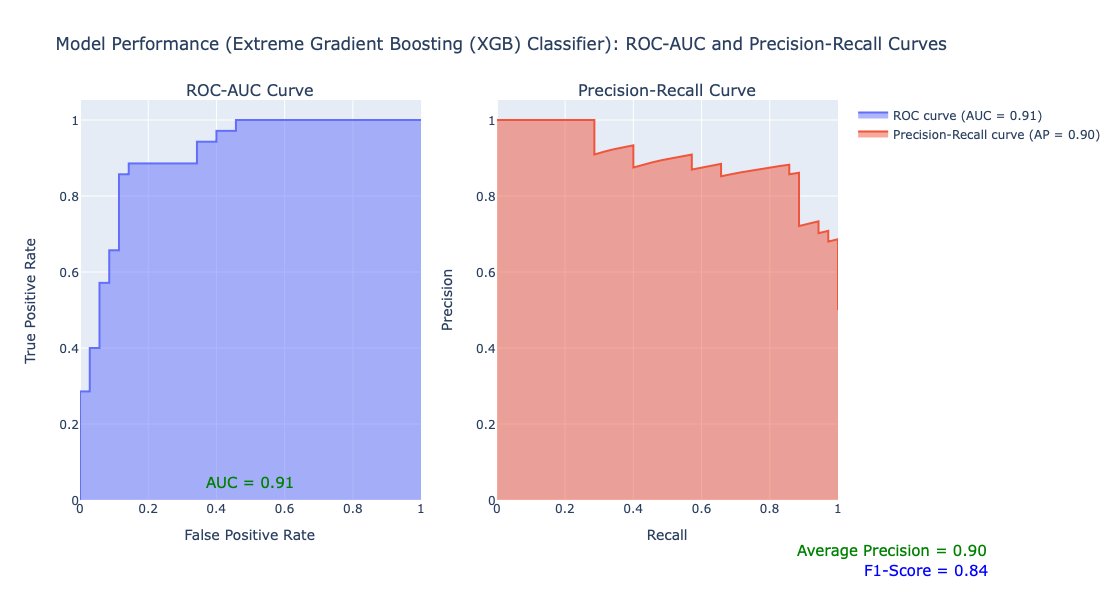

In [64]:
# Calculate metrics for ROC-AUC Curve
fpr, tpr, _ = roc_curve(y_test, y_scores_xgb)
roc_auc_val = auc(fpr, tpr)

# Calculate metrics for Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_scores_xgb)
pr_auc = average_precision_score(y_test, y_scores_xgb)
f1 = f1_score(y_test, y_pred_final_xgb)

# Create subplots
fig = make_subplots(
    rows=1, cols=2, subplot_titles=("ROC-AUC Curve", "Precision-Recall Curve")
)

# Add ROC-AUC Curve to the subplot
fig.add_trace(
    go.Scatter(
        x=fpr,
        y=tpr,
        mode="lines",
        name=f"ROC curve (AUC = {roc_auc_val:.2f})",
        fill="tozeroy",
    ),
    row=1,
    col=1,
)
fig.add_annotation(
    x=0.5,
    y=0.05,
    xref="paper",
    yref="paper",
    text=f"AUC = {roc_auc_val:.2f}",
    showarrow=False,
    font=dict(size=15, color="green"),
    row=1,
    col=1,
)

# Add Precision-Recall Curve to the subplot
fig.add_trace(
    go.Scatter(
        x=recall,
        y=precision,
        mode="lines",
        name=f"Precision-Recall curve (AP = {pr_auc:.2f})",
        fill="tozeroy",
    ),
    row=1,
    col=2,
)
fig.add_annotation(
    x=1.2,
    y=-0.15,
    xref="paper",
    yref="paper",
    text=f"Average Precision = {pr_auc:.2f}",
    showarrow=False,
    font=dict(size=15, color="green"),
)
fig.add_annotation(
    x=1.2,
    y=-0.20,
    xref="paper",
    yref="paper",
    text=f"F1-Score = {f1:.2f}",
    showarrow=False,
    font=dict(size=15, color="blue"),
)

# Update layout
fig.update_layout(
    title_text="Model Performance (Extreme Gradient Boosting (XGB) Classifier): ROC-AUC and Precision-Recall Curves",
    width=1200,
    height=600,
)
fig.update_xaxes(title_text="False Positive Rate", row=1, col=1)
fig.update_yaxes(title_text="True Positive Rate", row=1, col=1)
fig.update_xaxes(title_text="Recall", row=1, col=2)
fig.update_yaxes(title_text="Precision", row=1, col=2)
fig.update_layout(
    margin=dict(b=100)
)  # Adjust the bottom margin to avoid cutting off annotations

# Save plot
#fig.write_image("./charts/Ensemble_Models/Model Performance (Extreme Gradient Boosting (XGB) Classifier): ROC-AUC and Precision-Recall Curves.png") #png format
#fig.write_image("./charts/Ensemble_Models/Model Performance (Extreme Gradient Boosting (XGB) Classifier): ROC-AUC and Precision-Recall Curves.svg") #svg format

# Display the plots side-by-side
fig.show()

#### Stacking Classifier (using Baseline Models)

##### Cross-Validation Set

In [65]:
with mlflow.start_run() as run:

    # Define baseline learners
    base_learners = [
        ("lr_clf_cv", lr_clf_cv),
        (
            "svm_model_cv",
            svm_model_cv,
        ),  # Ensure svm_model is trained with probability=True for AUC scoring
        ("knn_model_cv", knn_model_cv),
        ("dt_clf_cv", dt_clf_cv),
    ]

    # Initialize the Stacking Classifier with the base learners and a final estimator
    final_estimator = DecisionTreeClassifier(random_state=42)
    stack_baseline_models_cv = StackingClassifier(
        estimators=base_learners, final_estimator=final_estimator, cv=5
    )

    # Fit the stack model
    stack_baseline_models_cv.fit(X_train, y_train)

    # Predict on the test set
    y_pred_final_am_cv = stack_baseline_models_cv.predict(X_cv)
    y_scores_am_cv = stack_baseline_models_cv.predict_proba(X_cv)[
        :, 1
    ]  # Get probabilities for AUC scoring

    # Calculate metrics
    accuracy = accuracy_score(y_cv, y_pred_final_am_cv)
    cm = confusion_matrix(y_cv, y_pred_final_am_cv)
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    sensitivity = TP / (TP + FN)  # Recall
    specificity = TN / (TN + FP)
    # False Positive Rate (FPR)
    FPR = FP / (FP + TN)

    roc_score = roc_auc_score(y_cv, y_scores_am_cv)
    fpr, tpr, _ = roc_curve(y_cv, y_scores_am_cv)
    roc_auc = auc(fpr, tpr)
    precision = precision_score(y_cv, y_pred_final_am_cv)  # Corrected to use predictions
    f1 = f1_score(y_cv, y_pred_final_am_cv)

    # Update DataFrame or similar storage
    ensemble_df = ensemble_df._append(
        {
            "Ensemble Model": "Stacking Baseline Models CV",
            "Accuracy": accuracy,
            "Sensitivity": sensitivity,
            "Specificity": specificity,
            "False Positive Rate": FPR,
            "AUC Score": roc_score,
            "F1-Score": f1,
            "Precision": precision,
        },
        ignore_index=True,
    )

    # Evaluate the model on the validation set
    print("Stacking Baseline Models CV: ")
    print(classification_report(y_cv, y_pred_final_am_cv))
    print("")
    print("Confusion Matrix: ")
    print(cm)

    # Log the model parameters and metrics to MLflow
    mlflow.sklearn.log_model(stack_baseline_models_cv, "Stacking Baseline Models CV")
    print("Run ID: {}".format(run.info.run_id))

    mlflow.log_params(stack_baseline_models_cv.get_params())
    mlflow.log_metrics(
        {
            "Accuracy": accuracy,
            "Sensitivity": sensitivity,
            "Specificity": specificity,
            "False Positive Rate": FPR,
            "AUC Score": roc_auc,
            "F1-Score": f1,
            "Precision": precision
        }
    )

    # Save the model to MLflow
    #shutil.rmtree("Stacking Baseline Models CV", ignore_errors=True)
    #mlflow.sklearn.save_model(stack_baseline_models_cv, "Stacking Baseline Models CV")

    signature = infer_signature(X_cv, y_pred_final_am_cv)

    # Log the sklearn model and register as version 1
    mlflow.sklearn.log_model(
        sk_model=stack_baseline_models_cv,
        artifact_path="sklearn-model",
        signature=signature,
        registered_model_name="sk-learn-stack-baseline-cv-model",
    )

Stacking Baseline Models CV: 
              precision    recall  f1-score   support

           0       0.68      0.70      0.69        33
           1       0.72      0.70      0.71        37

    accuracy                           0.70        70
   macro avg       0.70      0.70      0.70        70
weighted avg       0.70      0.70      0.70        70


Confusion Matrix: 
[[23 10]
 [11 26]]
Run ID: 524556222e6e43fba9f0856aa0e5a46d


Successfully registered model 'sk-learn-stack-baseline-cv-model'.
2024/04/13 12:37:16 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-stack-baseline-cv-model, version 1
Created version '1' of model 'sk-learn-stack-baseline-cv-model'.


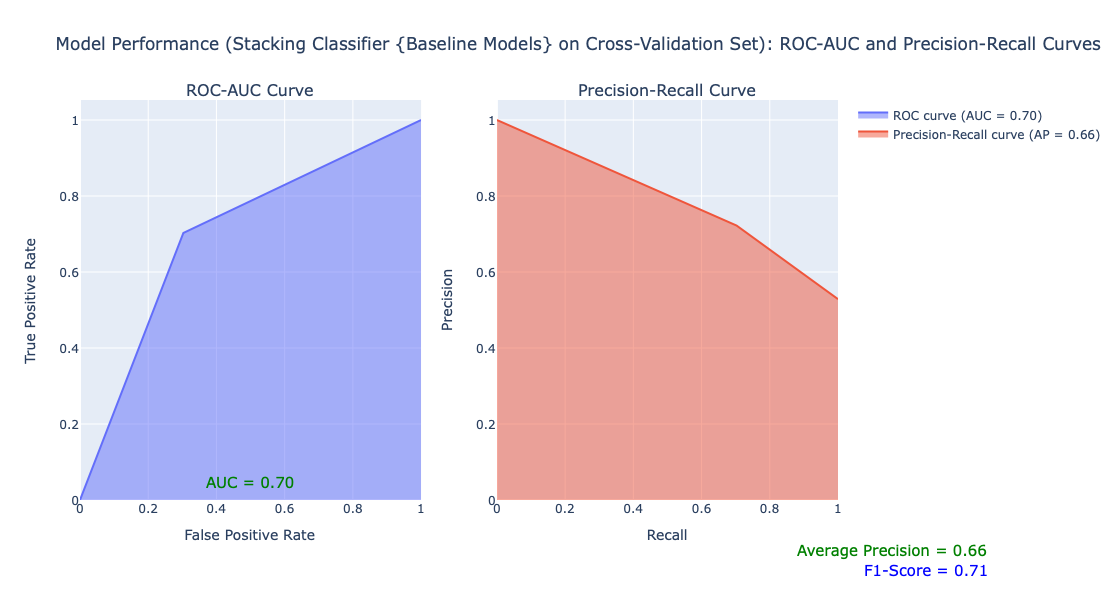

In [66]:
# Calculate metrics for ROC-AUC Curve
fpr, tpr, _ = roc_curve(y_cv, y_scores_am_cv)
roc_auc_val = auc(fpr, tpr)

# Calculate metrics for Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_cv, y_scores_am_cv)
pr_auc = average_precision_score(y_cv, y_scores_am_cv)
f1 = f1_score(y_cv, y_pred_final_am_cv)

# Create subplots
fig = make_subplots(
    rows=1, cols=2, subplot_titles=("ROC-AUC Curve", "Precision-Recall Curve")
)

# Add ROC-AUC Curve to the subplot
fig.add_trace(
    go.Scatter(
        x=fpr,
        y=tpr,
        mode="lines",
        name=f"ROC curve (AUC = {roc_auc_val:.2f})",
        fill="tozeroy",
    ),
    row=1,
    col=1,
)
fig.add_annotation(
    x=0.5,
    y=0.05,
    xref="paper",
    yref="paper",
    text=f"AUC = {roc_auc_val:.2f}",
    showarrow=False,
    font=dict(size=15, color="green"),
    row=1,
    col=1,
)

# Add Precision-Recall Curve to the subplot
fig.add_trace(
    go.Scatter(
        x=recall,
        y=precision,
        mode="lines",
        name=f"Precision-Recall curve (AP = {pr_auc:.2f})",
        fill="tozeroy",
    ),
    row=1,
    col=2,
)
fig.add_annotation(
    x=1.2,
    y=-0.15,
    xref="paper",
    yref="paper",
    text=f"Average Precision = {pr_auc:.2f}",
    showarrow=False,
    font=dict(size=15, color="green"),
)
fig.add_annotation(
    x=1.2,
    y=-0.20,
    xref="paper",
    yref="paper",
    text=f"F1-Score = {f1:.2f}",
    showarrow=False,
    font=dict(size=15, color="blue"),
)

# Update layout
fig.update_layout(
    title_text="Model Performance (Stacking Classifier {Baseline Models} on Cross-Validation Set): ROC-AUC and Precision-Recall Curves",
    width=1200,
    height=600,
)
fig.update_xaxes(title_text="False Positive Rate", row=1, col=1)
fig.update_yaxes(title_text="True Positive Rate", row=1, col=1)
fig.update_xaxes(title_text="Recall", row=1, col=2)
fig.update_yaxes(title_text="Precision", row=1, col=2)
fig.update_layout(
    margin=dict(b=100)
)  # Adjust the bottom margin to avoid cutting off annotations

# Save plot
#fig.write_image("./charts/Ensemble_Models/Model Performance (Stacking Classifier {Baseline Models} on Cross-Validation Set): ROC-AUC and Precision-Recall Curves.png") #png format
#fig.write_image("./charts/Ensemble_Models/Model Performance (Stacking Classifier {Baseline Models} on Cross-Validation Set): ROC-AUC and Precision-Recall Curves.svg") #svg format

# Display the plots side-by-side
fig.show()

##### Testing Set

In [67]:
with mlflow.start_run() as run:

    # Define base learners
    baseline_learners = [
        ("lr_clf", lr_clf),
        ("svm_model", svm_model),  # Ensure svm_model is trained with probability=True for AUC scoring
        ("knn_model", knn_model),
        ("dt_clf", dt_clf),
    ]

    # Initialize the Stacking Classifier with the base learners and a final estimator
    final_estimator = DecisionTreeClassifier(random_state=42)
    stack_baseline_models = StackingClassifier(
        estimators=baseline_learners, final_estimator=final_estimator, cv=5
    )

    # Fit the stack model
    stack_baseline_models.fit(X_train, y_train)

    # Predict on the test set
    y_pred_final_am = stack_baseline_models.predict(X_test)
    y_scores_am = stack_baseline_models.predict_proba(X_test)[
        :, 1
    ]  # Get probabilities for AUC scoring

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred_final_am)
    cm = confusion_matrix(y_test, y_pred_final_am)
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    sensitivity = TP / (TP + FN)  # Recall
    specificity = TN / (TN + FP)
    # False Positive Rate (FPR)
    FPR = FP / (FP + TN)

    roc_score = roc_auc_score(y_test, y_scores_am)
    fpr, tpr, _ = roc_curve(y_test, y_scores_am)
    roc_auc = auc(fpr, tpr)
    precision = precision_score(y_test, y_pred_final_am)  # Corrected to use predictions
    f1 = f1_score(y_test, y_pred_final_am)

    # Update DataFrame or similar storage
    ensemble_df = ensemble_df._append(
        {
            "Ensemble Model": "Stacking Base Models",
            "Accuracy": accuracy,
            "Sensitivity": sensitivity,
            "Specificity": specificity,
            "False Positive Rate": FPR,
            "AUC Score": roc_score,
            "F1-Score": f1,
            "Precision": precision,
        },
        ignore_index=True,
    )

    # Evaluate the model on the test set
    print("Stacking Baseline Models: ")
    print(classification_report(y_test, y_pred_final_am))
    print("")
    print("Confusion Matrix: ")
    print(cm)

    # Log the model parameters and metrics to MLflow
    mlflow.sklearn.log_model(stack_baseline_models, "Stacking Baseline Models")
    print("Run ID: {}".format(run.info.run_id))

    mlflow.log_params(stack_baseline_models.get_params())
    mlflow.log_metrics(
        {
            "Accuracy": accuracy,
            "Sensitivity": sensitivity,
            "Specificity": specificity,
            "False Positive Rate": FPR,
            "AUC Score": roc_auc,
            "F1-Score": f1,
            "Precision": precision
        }
    )

    # Save the model to MLflow
    #shutil.rmtree("Stacking Baseline Models",  ignore_errors=True)
    #mlflow.sklearn.save_model(stack_baseline_models, "Stacking Baseline Models")

    signature = infer_signature(X_cv, y_pred_final_am)

    # Log the sklearn model and register as version 1
    mlflow.sklearn.log_model(
        sk_model=stack_baseline_models,
        artifact_path="sklearn-model",
        signature=signature,
        registered_model_name="sk-learn-stack-baseline-model",
    )

Stacking Baseline Models: 
              precision    recall  f1-score   support

           0       0.75      0.60      0.67        35
           1       0.67      0.80      0.73        35

    accuracy                           0.70        70
   macro avg       0.71      0.70      0.70        70
weighted avg       0.71      0.70      0.70        70


Confusion Matrix: 
[[21 14]
 [ 7 28]]
Run ID: cf5d6830b1aa4fbaba36693bb1c5f66b


Successfully registered model 'sk-learn-stack-baseline-model'.
2024/04/13 12:37:46 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-stack-baseline-model, version 1
Created version '1' of model 'sk-learn-stack-baseline-model'.


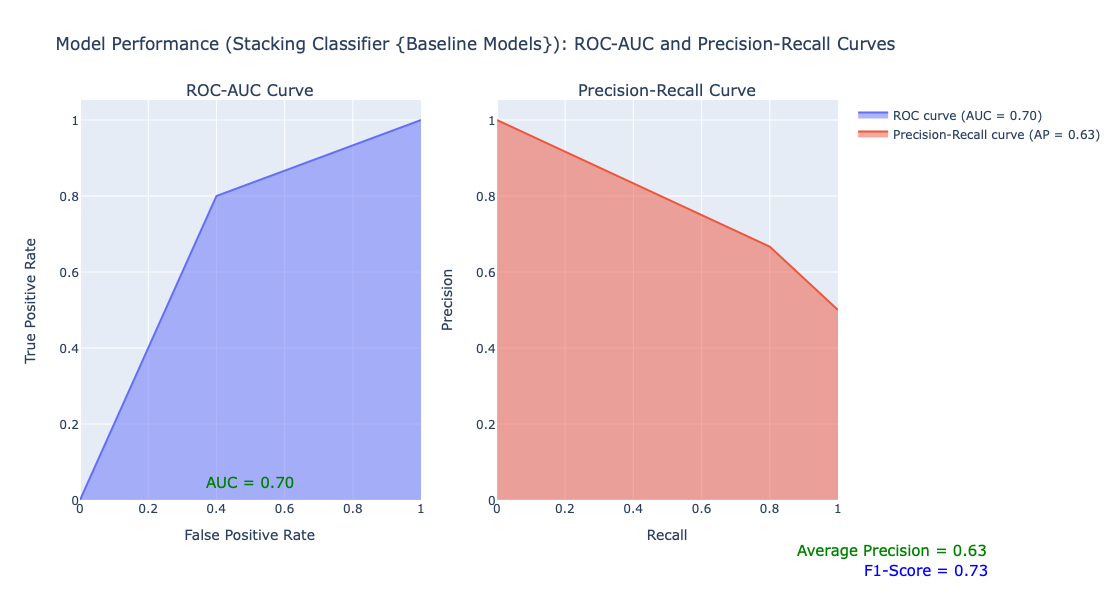

In [68]:
# Calculate metrics for ROC-AUC Curve
fpr, tpr, _ = roc_curve(y_test, y_scores_am)
roc_auc_val = auc(fpr, tpr)

# Calculate metrics for Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_scores_am)
pr_auc = average_precision_score(y_test, y_scores_am)
f1 = f1_score(y_test, y_pred_final_am)

# Create subplots
fig = make_subplots(
    rows=1, cols=2, subplot_titles=("ROC-AUC Curve", "Precision-Recall Curve")
)

# Add ROC-AUC Curve to the subplot
fig.add_trace(
    go.Scatter(
        x=fpr,
        y=tpr,
        mode="lines",
        name=f"ROC curve (AUC = {roc_auc_val:.2f})",
        fill="tozeroy",
    ),
    row=1,
    col=1,
)
fig.add_annotation(
    x=0.5,
    y=0.05,
    xref="paper",
    yref="paper",
    text=f"AUC = {roc_auc_val:.2f}",
    showarrow=False,
    font=dict(size=15, color="green"),
    row=1,
    col=1,
)

# Add Precision-Recall Curve to the subplot
fig.add_trace(
    go.Scatter(
        x=recall,
        y=precision,
        mode="lines",
        name=f"Precision-Recall curve (AP = {pr_auc:.2f})",
        fill="tozeroy",
    ),
    row=1,
    col=2,
)
fig.add_annotation(
    x=1.2,
    y=-0.15,
    xref="paper",
    yref="paper",
    text=f"Average Precision = {pr_auc:.2f}",
    showarrow=False,
    font=dict(size=15, color="green"),
)
fig.add_annotation(
    x=1.2,
    y=-0.20,
    xref="paper",
    yref="paper",
    text=f"F1-Score = {f1:.2f}",
    showarrow=False,
    font=dict(size=15, color="blue"),
)

# Update layout
fig.update_layout(
    title_text="Model Performance (Stacking Classifier {Baseline Models}): ROC-AUC and Precision-Recall Curves",
    width=1200,
    height=600,
)
fig.update_xaxes(title_text="False Positive Rate", row=1, col=1)
fig.update_yaxes(title_text="True Positive Rate", row=1, col=1)
fig.update_xaxes(title_text="Recall", row=1, col=2)
fig.update_yaxes(title_text="Precision", row=1, col=2)
fig.update_layout(
    margin=dict(b=100)
)  # Adjust the bottom margin to avoid cutting off annotations

# Save plot
#fig.write_image("./charts/Ensemble_Models/Model Performance (Stacking Classifier {Baseline Models}): ROC-AUC and Precision-Recall Curves.png") #png format
#fig.write_image("./charts/Ensemble_Models/Model Performance (Stacking Classifier {Baseline Models}): ROC-AUC and Precision-Recall Curves.svg") #svg format

# Display the plots side-by-side
fig.show()

#### Stacking Classifier (using ensemble models)

##### Cross-Validation Set

In [69]:
with mlflow.start_run() as run:

    # Define the stacking ensemble model
    stack_ensemble_models_cv = StackingClassifier(
        estimators=[
            ("xgb_model_cv", xgb_model_cv),
            ("gbm_model_cv", gb_model_cv),
            ("vote_model_cv", vote_model_soft_cv),
            ("bag_model_cv", bag_model_cv),
        ],
        final_estimator=XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
        cv=5,
    )

    # Fit the stacking model
    stack_ensemble_models_cv.fit(X_train, y_train)

    # Predicting the final output using stacking
    y_pred_final_ams_cv = stack_ensemble_models_cv.predict(X_cv)

    # Get probability scores for AUC calculation
    y_scores_ams_cv = stack_ensemble_models_cv.predict_proba(X_cv)[:, 1]

    # Calculate accuracy score
    accuracy = accuracy_score(y_cv, y_pred_final_ams_cv)

    # Confusion Matrix
    cm = confusion_matrix(y_cv, y_pred_final_ams_cv)

    # Calculate specificity and other metrics
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    sensitivity = TP / (TP + FN)  # Recall
    specificity = TN / (TN + FP)
    # False Positive Rate (FPR)
    FPR = FP / (FP + TN)

    precision = precision_score(y_cv, y_pred_final_ams_cv)
    f1 = f1_score(y_cv, y_pred_final_ams_cv)  # Calculate F1-Score
    roc_auc = roc_auc_score(y_cv, y_scores_ams_cv)  # AUC score

    # Update ensemble_df DataFrame with new metrics
    ensemble_df = ensemble_df._append(
        {
            "Ensemble Model": "Stacking Ensemble Models CV",
            "Accuracy": accuracy,
            "Sensitivity": sensitivity,
            "Specificity": specificity,
            "False Positive Rate": FPR,
            "AUC Score": roc_auc,
            "F1-Score": f1,
            "Precision": precision,
        },
        ignore_index=True,
    )

    # Evaluate the model on the validation set
    print("Stacking Ensemble Models CV: ")
    print(classification_report(y_cv, y_pred_final_ams_cv))
    print("Confusion Matrix: ")
    print(cm)

    # Log the model parameters and metrics to MLflow
    mlflow.sklearn.log_model(stack_ensemble_models_cv, "Stacking Ensemble Models CV")
    print("Run ID: {}".format(run.info.run_id))

    mlflow.log_params(stack_ensemble_models_cv.get_params())
    mlflow.log_metrics(
        {
            "Accuracy": accuracy,
            "Sensitivity": sensitivity,
            "Specificity": specificity,
            "False Positive Rate": FPR,
            "AUC Score": roc_auc,
            "F1-Score": f1,
            "Precision": precision
        }
    )

    # Save the model to MLflow
    #shutil.rmtree("Stacking Ensemble Models CV", ignore_errors=True)
    #mlflow.sklearn.save_model(stack_ensemble_models_cv, "Stacking Ensemble Models CV")

    signature = infer_signature(X_cv, y_pred_final_ams_cv)

    # Log the sklearn model and register as version 1
    mlflow.sklearn.log_model(
        sk_model=stack_ensemble_models_cv,
        artifact_path="sklearn-model",
        signature=signature,
        registered_model_name="sk-learn-stack-ensemble-model-cv",
    )

Stacking Ensemble Models CV: 
              precision    recall  f1-score   support

           0       0.76      0.76      0.76        33
           1       0.78      0.78      0.78        37

    accuracy                           0.77        70
   macro avg       0.77      0.77      0.77        70
weighted avg       0.77      0.77      0.77        70

Confusion Matrix: 
[[25  8]
 [ 8 29]]
Run ID: a155dacd77f44a99a315abcea12daeaf


Successfully registered model 'sk-learn-stack-ensemble-model-cv'.
2024/04/13 12:40:27 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-stack-ensemble-model-cv, version 1
Created version '1' of model 'sk-learn-stack-ensemble-model-cv'.


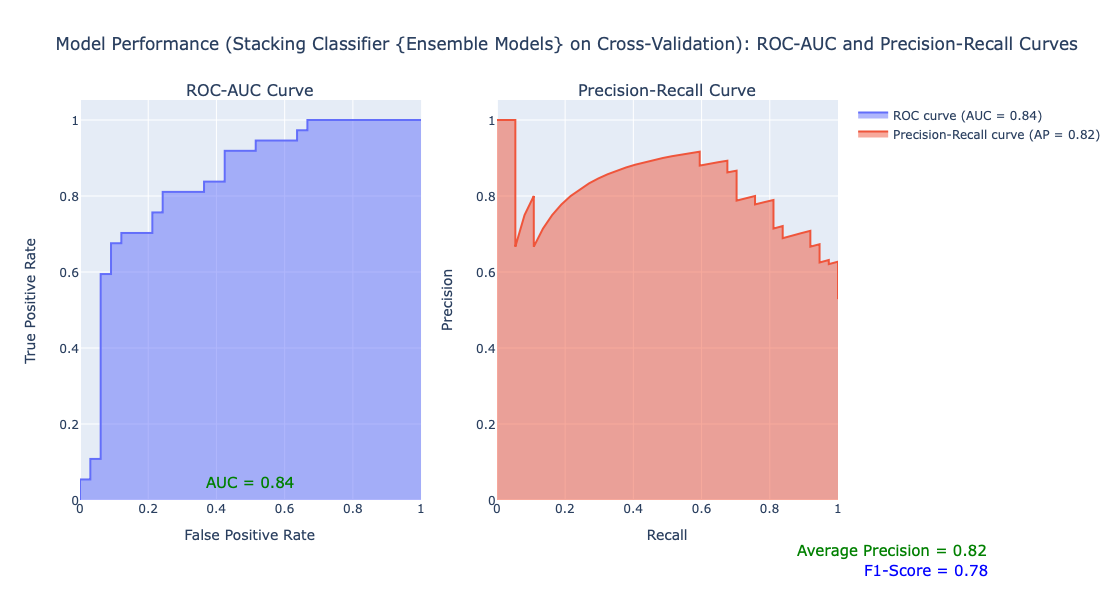

In [70]:
# Calculate metrics for ROC-AUC Curve
fpr, tpr, _ = roc_curve(y_cv, y_scores_ams_cv)
roc_auc_val = auc(fpr, tpr)

# Calculate metrics for Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_cv, y_scores_ams_cv)
pr_auc = average_precision_score(y_cv, y_scores_ams_cv)
f1 = f1_score(y_cv, y_pred_final_ams_cv)

# Create subplots
fig = make_subplots(
    rows=1, cols=2, subplot_titles=("ROC-AUC Curve", "Precision-Recall Curve")
)

# Add ROC-AUC Curve to the subplot
fig.add_trace(
    go.Scatter(
        x=fpr,
        y=tpr,
        mode="lines",
        name=f"ROC curve (AUC = {roc_auc_val:.2f})",
        fill="tozeroy",
    ),
    row=1,
    col=1,
)
fig.add_annotation(
    x=0.5,
    y=0.05,
    xref="paper",
    yref="paper",
    text=f"AUC = {roc_auc_val:.2f}",
    showarrow=False,
    font=dict(size=15, color="green"),
    row=1,
    col=1,
)

# Add Precision-Recall Curve to the subplot
fig.add_trace(
    go.Scatter(
        x=recall,
        y=precision,
        mode="lines",
        name=f"Precision-Recall curve (AP = {pr_auc:.2f})",
        fill="tozeroy",
    ),
    row=1,
    col=2,
)
fig.add_annotation(
    x=1.2,
    y=-0.15,
    xref="paper",
    yref="paper",
    text=f"Average Precision = {pr_auc:.2f}",
    showarrow=False,
    font=dict(size=15, color="green"),
)
fig.add_annotation(
    x=1.2,
    y=-0.20,
    xref="paper",
    yref="paper",
    text=f"F1-Score = {f1:.2f}",
    showarrow=False,
    font=dict(size=15, color="blue"),
)

# Update layout
fig.update_layout(
    title_text="Model Performance (Stacking Classifier {Ensemble Models} on Cross-Validation): ROC-AUC and Precision-Recall Curves",
    width=1200,
    height=600,
)
fig.update_xaxes(title_text="False Positive Rate", row=1, col=1)
fig.update_yaxes(title_text="True Positive Rate", row=1, col=1)
fig.update_xaxes(title_text="Recall", row=1, col=2)
fig.update_yaxes(title_text="Precision", row=1, col=2)
fig.update_layout(
    margin=dict(b=100)
)  # Adjust the bottom margin to avoid cutting off annotations

# Save plot
#fig.write_image("./charts/Ensemble_Models/Model Performance (Stacking Classifier {Ensemble Models} on Cross-Validation): ROC-AUC and Precision-Recall Curves.png") #png format
#fig.write_image("./charts/Ensemble_Models/Model Performance (Stacking Classifier {Ensemble Models} on Cross-Validation): ROC-AUC and Precision-Recall Curves.svg") #svg format

# Display the plots side-by-side
fig.show()

##### Testing Set

In [71]:
with mlflow.start_run() as run:

    # Define the stacking ensemble model
    stack_ensemble_models = StackingClassifier(
        estimators=[
            ("xgb_model", xgb_model),
            ("gbm_model", gb_model),
            ("vote_model", vote_model_soft),
            ("bag_model", bag_model),
        ],
        final_estimator=XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
        cv=5,
    )

    # Fit the stacking model
    stack_ensemble_models.fit(X_train, y_train)

    # Predicting the final output using stacking
    y_pred_final_ams = stack_ensemble_models.predict(X_test)

    # Get probability scores for AUC calculation
    y_scores_ams = stack_ensemble_models.predict_proba(X_test)[:, 1]

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred_final_ams)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred_final_ams)

    # Calculate specificity and other metrics
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    sensitivity = TP / (TP + FN)  # Recall
    specificity = TN / (TN + FP)
    # False Positive Rate (FPR)
    FPR = FP / (FP + TN)

    precision = precision_score(y_test, y_pred_final_ams)
    f1 = f1_score(y_test, y_pred_final_ams)  # Calculate F1-Score
    roc_auc = roc_auc_score(y_test, y_scores_ams)  # AUC score

    # Update ensemble_df DataFrame with new metrics
    ensemble_df = ensemble_df._append(
        {
            "Ensemble Model": "Stacking Ensemble Models",
            "Accuracy": accuracy,
            "Sensitivity": sensitivity,
            "Specificity": specificity,
            "False Positive Rate": FPR,
            "AUC Score": roc_auc,
            "F1-Score": f1,
            "Precision": precision,
        }, ignore_index=True
    )

    # Evaluate the model on the test set
    print("Stacking Ensemble Models: ")
    print(classification_report(y_test, y_pred_final_ams))
    print("Confusion Matrix: ")
    print(cm)

    # Log the model parameters and metrics to MLflow
    mlflow.sklearn.log_model(stack_ensemble_models, "Stacking Ensemble Models")
    print("Run ID: {}".format(run.info.run_id))

    mlflow.log_params(stack_ensemble_models.get_params())
    mlflow.log_metrics(
        {
            "Accuracy": accuracy,
            "Sensitivity": sensitivity,
            "Specificity": specificity,
            "False Positive Rate": FPR,
            "AUC Score": roc_auc,
            "F1-Score": f1,
            "Precision": precision
        }
    )

    # Save the model to MLflow
    #shutil.rmtree("Stacking Ensemble Models", ignore_errors=True)
    #mlflow.sklearn.save_model(stack_ensemble_models, "Stacking Ensemble Models")

    signature = infer_signature(X_cv, y_pred_final_ams)

    # Log the sklearn model and register as version 1
    mlflow.sklearn.log_model(
        sk_model=stack_ensemble_models,
        artifact_path="sklearn-model",
        signature=signature,
        registered_model_name="sk-learn-stack-ensemble-model",
    )

Stacking Ensemble Models: 
              precision    recall  f1-score   support

           0       0.92      0.66      0.77        35
           1       0.73      0.94      0.82        35

    accuracy                           0.80        70
   macro avg       0.83      0.80      0.80        70
weighted avg       0.83      0.80      0.80        70

Confusion Matrix: 
[[23 12]
 [ 2 33]]
Run ID: ab25bb425f8a4c158df03512f93be078


Successfully registered model 'sk-learn-stack-ensemble-model'.
2024/04/13 12:43:33 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: sk-learn-stack-ensemble-model, version 1
Created version '1' of model 'sk-learn-stack-ensemble-model'.


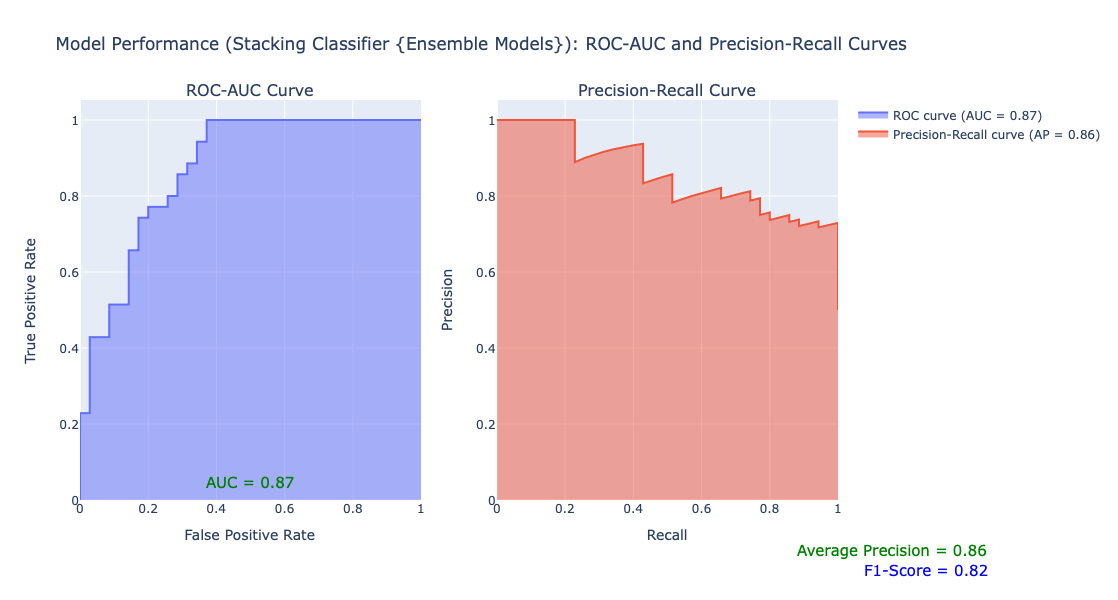

In [72]:
# Calculate metrics for ROC-AUC Curve
fpr, tpr, _ = roc_curve(y_test, y_scores_ams)
roc_auc_val = auc(fpr, tpr)

# Calculate metrics for Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_scores_ams)
pr_auc = average_precision_score(y_test, y_scores_ams)
f1 = f1_score(y_test, y_pred_final_ams)

# Create subplots
fig = make_subplots(
    rows=1, cols=2, subplot_titles=("ROC-AUC Curve", "Precision-Recall Curve")
)

# Add ROC-AUC Curve to the subplot
fig.add_trace(
    go.Scatter(
        x=fpr,
        y=tpr,
        mode="lines",
        name=f"ROC curve (AUC = {roc_auc_val:.2f})",
        fill="tozeroy",
    ),
    row=1,
    col=1,
)
fig.add_annotation(
    x=0.5,
    y=0.05,
    xref="paper",
    yref="paper",
    text=f"AUC = {roc_auc_val:.2f}",
    showarrow=False,
    font=dict(size=15, color="green"),
    row=1,
    col=1,
)

# Add Precision-Recall Curve to the subplot
fig.add_trace(
    go.Scatter(
        x=recall,
        y=precision,
        mode="lines",
        name=f"Precision-Recall curve (AP = {pr_auc:.2f})",
        fill="tozeroy",
    ),
    row=1,
    col=2,
)
fig.add_annotation(
    x=1.2,
    y=-0.15,
    xref="paper",
    yref="paper",
    text=f"Average Precision = {pr_auc:.2f}",
    showarrow=False,
    font=dict(size=15, color="green"),
)
fig.add_annotation(
    x=1.2,
    y=-0.20,
    xref="paper",
    yref="paper",
    text=f"F1-Score = {f1:.2f}",
    showarrow=False,
    font=dict(size=15, color="blue"),
)

# Update layout
fig.update_layout(
    title_text="Model Performance (Stacking Classifier {Ensemble Models}): ROC-AUC and Precision-Recall Curves",
    width=1200,
    height=600,
)
fig.update_xaxes(title_text="False Positive Rate", row=1, col=1)
fig.update_yaxes(title_text="True Positive Rate", row=1, col=1)
fig.update_xaxes(title_text="Recall", row=1, col=2)
fig.update_yaxes(title_text="Precision", row=1, col=2)
fig.update_layout(
    margin=dict(b=100)
)  # Adjust the bottom margin to avoid cutting off annotations

# Save plot
#fig.write_image("./charts/Ensemble_Models/Model Performance (Stacking Classifier {Ensemble Models}): ROC-AUC and Precision-Recall Curves.png") #png format
#fig.write_image("./charts/Ensemble_Models/Model Performance (Stacking Classifier {Ensemble Models}): ROC-AUC and Precision-Recall Curves.svg") #svg format

# Display the plots side-by-side
fig.show()

In [73]:
ensemble_df.sort_values("Specificity", ascending=False)

,Ensemble Model,Accuracy,Sensitivity,Specificity,False Positive Rate,Precision,AUC Score,F1-Score
0,Voting Classifier (Soft) CV,0.885714,0.945946,0.818182,0.181818,0.853659,0.929566,0.897436
4,Gradient Boosting Classifier CV,0.871429,0.945946,0.787879,0.212121,0.833333,0.936937,0.886076
6,XGBoost Classifier CV,0.871429,0.945946,0.787879,0.212121,0.833333,0.930385,0.886076
7,XGBoost Classifier,0.828571,0.885714,0.771429,0.228571,0.794872,0.908571,0.837838
10,Stacking Ensemble Models CV,0.771429,0.783784,0.757576,0.242424,0.783784,0.840295,0.783784
8,Stacking Baseline Models CV,0.700000,0.702703,0.696970,0.303030,0.722222,0.699836,0.712329
2,Bagging Classifier with SVM CV,0.828571,0.945946,0.696970,0.303030,0.777778,0.929566,0.853659
5,Gradient Boosting Classifier,0.800000,0.914286,0.685714,0.314286,0.744186,0.924898,0.820513
11,Stacking Ensemble Models,0.800000,0.942857,0.657143,0.342857,0.733333,0.872653,0.825000
1,Voting Classifier (Soft),0.771429,0.942857,0.600000,0.400000,0.702128,0.844082,0.804878


#### Performance Metrics of Ensemble Models

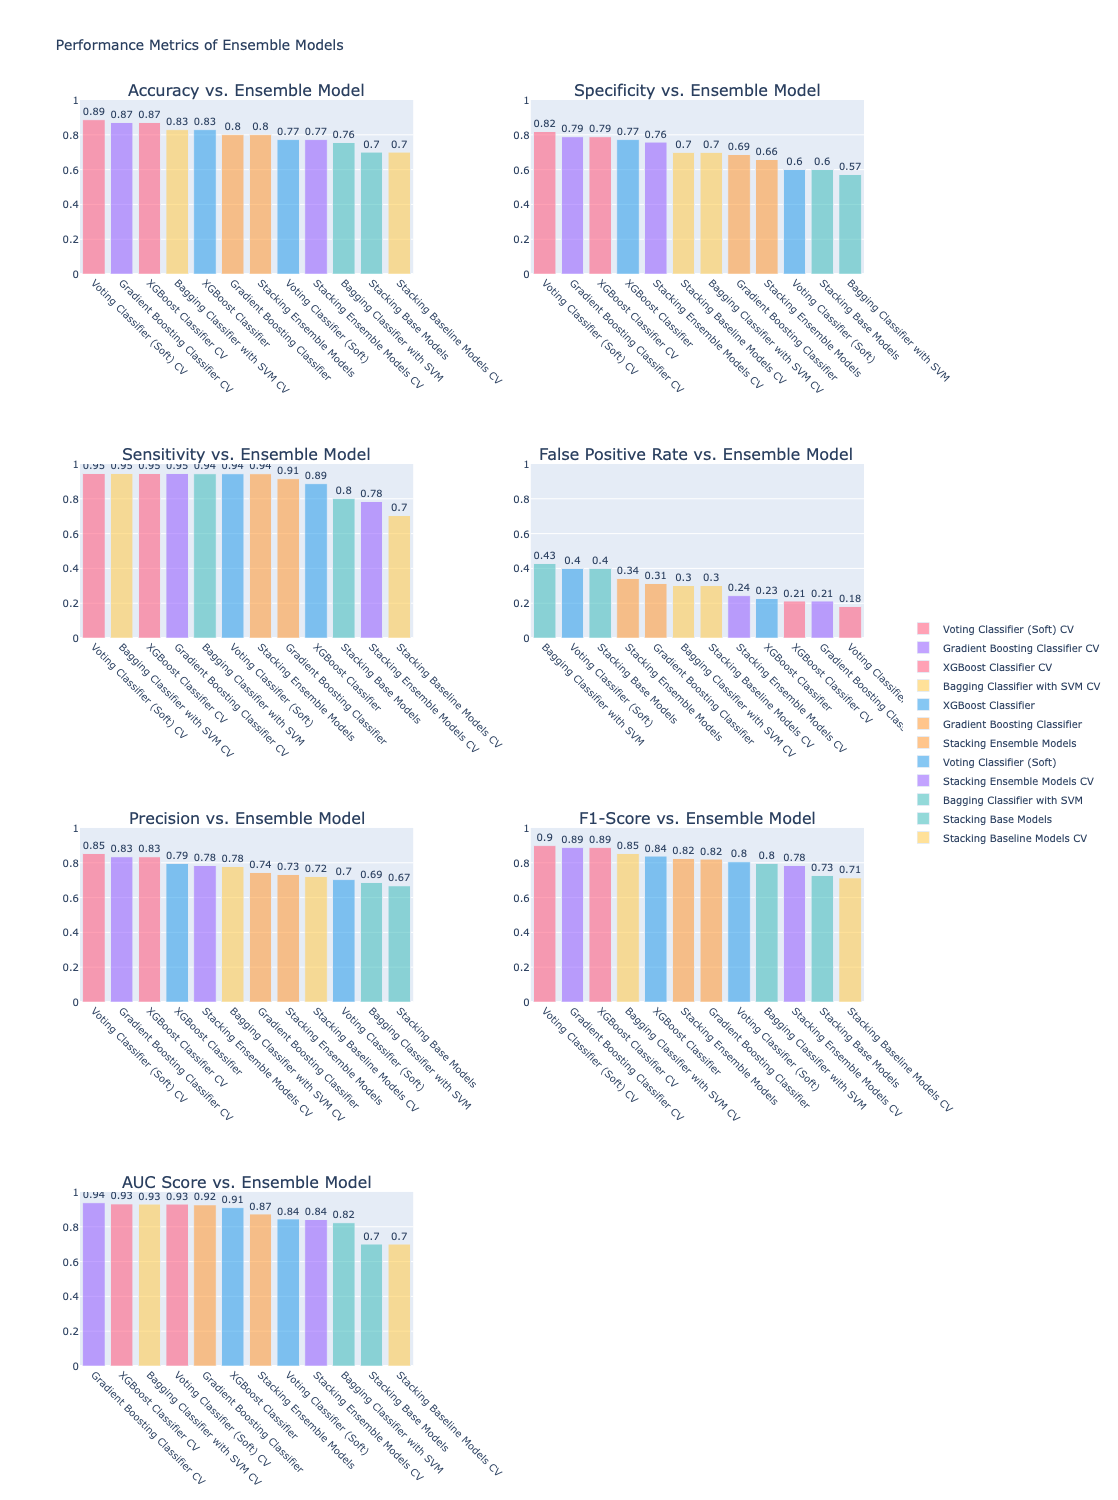

In [74]:
# Define a list of colors for the ensemble models
colors = [
    "rgba(255, 99, 132, 0.6)",
    "rgba(54, 162, 235, 0.6)",
    "rgba(255, 206, 86, 0.6)",
    "rgba(75, 192, 192, 0.6)",
    "rgba(153, 102, 255, 0.6)",
    "rgba(255, 159, 64, 0.6)",
]

# Map each ensemble model to a specific color
unique_models = ensemble_df["Ensemble Model"].unique()
color_map = {model: colors[i % len(colors)] for i, model in enumerate(unique_models)}

# Create Subplots for the model performance using the 6 evaluation metrics
fig = make_subplots(
    rows=4,
    cols=2,
    subplot_titles=(
        "Accuracy vs. Ensemble Model",
        "Specificity vs. Ensemble Model",
        "Sensitivity vs. Ensemble Model",
        "False Positive Rate vs. Ensemble Model",
        "Precision vs. Ensemble Model",
        "F1-Score vs. Ensemble Model",
        "AUC Score vs. Ensemble Model",
    ),
    horizontal_spacing=0.15,
    vertical_spacing=0.15,
)

metrics = [
    "Accuracy",
    "Specificity",
    "Sensitivity",
    "False Positive Rate",
    "Precision",
    "F1-Score",
    "AUC Score",
]
plot_positions = [(1, 1), (1, 2), (2, 1), (2, 2), (3, 1), (3, 2), (4, 1)]

for metric, pos in zip(metrics, plot_positions):
    # Sort the DataFrame based on the current metric in descending order
    df_sorted = ensemble_df.sort_values(by=metric, ascending=False)

    # Extracting the sorted model names for consistent color mapping
    sorted_models = df_sorted["Ensemble Model"].unique()

    # Generate one bar for each model, now in sorted order
    for model in sorted_models:
        df_filtered = df_sorted[df_sorted["Ensemble Model"] == model]
        show_legend = (
            metric == "Accuracy"
        )  # Show legend only in the first subplot for clarity
        fig.add_trace(
            go.Bar(
                x=[model],
                y=df_filtered[metric],
                name=model,
                marker_color=color_map[model],
                text=df_filtered[metric].round(2),
                textposition="outside",
                showlegend=show_legend,
            ),
            row=pos[0],
            col=pos[1],
        )

# Update layout
fig.update_layout(
    height=1500,
    width=1100,
    title_text="Performance Metrics of Ensemble Models",
    showlegend=True,
    legend=dict(orientation="v", x=1.05, y=0.5),
    font=dict(size=10),
)
fig.update_xaxes(tickangle=45)
fig.update_yaxes(range=[0, 1])

# Save plot
#fig.write_image("./charts/Ensemble_Models/Performance Metrics of Ensemble Models.png") #png format
#fig.write_image("./charts/Ensemble_Models/Performance Metrics of Ensemble Models.svg") #svg format

# Display the plot
fig.show()

The ***Extreme Gradient Boosting algorithm*** provided the best performance among the six ensemble models in terms of 5 (out of 6) evaluation metrics used.

Conclusively, it was found that the ensemble models outperformed the baseline models; while **Logistic Regression** being a base model had the highest Specificity score (0.85), the **Extreme Gradient Boosting algorithm (XGB)** being an ensemble model had the highest overall Specificity score of 0.89.